## Introduction

The significant progress in both AI and genomics mutually supports the rapid advancements in the medical field. In this study, we will employ various machine learning and AI methods on gene expression data obtained from cancer cells. We aim to comprehend how these cells behave in specific environmental conditions, specifically focusing on predicting oxygen levels: hypoxia (low) and normoxia (normal). To achieve this, we will construct a model using single-cell RNA sequencing data.

## Materials and Methods

#### Materials

The data that we analayzed was obtained from 4 experiments where two different cancer cell lines, MCF7 and HCC1806, were studied. Each was sequenced by two different RNA sequencing technologies: SMARTSeq and DropSeq.

We aim to comprehend how cells behave in specific environmental conditions, specifically focusing on predicting oxygen levels:  hypoxia (low) and normoxia (normal). To achieve this, we will employ various machine learning techniques on our data.

#### Methods

- Exploratory Data Analysis:
First, we started to understand the data in depth and prepare it to be put in different algorithms. The study of the data was done by list of methods(visualizing,studying the sparsity) and proceeded with cleaning(filtering missing variables,outliers, and irregularities) when we felt it was appropriate.
- Unsupervised Learning: 
Next, we proceeded with trying to find any hidden patterns or intrinsic structures in our data. We tried two or three dimensionality reduction methods(PCA, IsoMap and T-SNE) and K-Means clustering method.
- Supervised Learning:
At last, we built classifiers that apply different algorithms(Random Forest, Logistic Regression, Perceptron).

## Python libraries

In [1]:
import sys
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #visualisation
import seaborn as sns   #visualisation
%matplotlib inline     
sns.set(color_codes=True)


from random import randint
from scipy.stats import kurtosis, skew
import random

random.seed(111)
np.random.seed(111)

########## Unsupervised learning libraries ########## 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE 
from sklearn.manifold import Isomap
from sklearn.cluster import KMeans
############################################################


########## Supervised learning libraries ########## 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
############################################################

## Exploratory data analysis 

### EAD1: MCF7 Cell line 

#### MCF7 -- Meta Data

In [2]:
mcf7_smarts_metadata = pd.read_csv("SmartSeq/MCF7_SmartS_MetaData.tsv",delimiter="\t",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(mcf7_smarts_metadata))
print("First column: ", mcf7_smarts_metadata.iloc[ : , 0])

Dataframe dimensions: (383, 8)
First column:  Filename
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam      MCF7
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam      MCF7
                                                            ... 
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam    MCF7
Name: Cell Line, Length: 383, dtype: object


In [3]:
mcf7_smarts_metadata

Cell Line           Lane  \
Filename                                                                      
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...      MCF7  output.STAR.1   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...      MCF7  output.STAR.1   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...      MCF7  output.STAR.1   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....      MCF7  output.STAR.1   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....      MCF7  output.STAR.1   
...                                                      ...            ...   
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoor...      MCF7  output.STAR.4   
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoor...      MCF7  output.STAR.4   
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoor...      MCF7  output.STAR.4   
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoor...      MCF7  output.STAR.4   
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoor...      MCF7  output.STAR.4   

                                                    Pos Condition  Hours  \
Filename                                                                   
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  A10      Hypo     72   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...  A11      Hypo     72   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  A12      Hypo     72   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....   A1      Norm     72   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....   A2      Norm     72   
...                                                 ...       ...    ...   
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoor...   H5      Norm     72   
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoor...   H6      Norm     72   
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoor...   H7      Hypo     72   
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoor...   H8      Hypo     72   
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoor...   H9      Hypo     72   

                                                   Cell name  \
Filename                                                       
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...       S28   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...       S29   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...       S30   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....        S1   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....        S2   
...                                                      ...   
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoor...      S359   
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoor...      S360   
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoor...      S379   
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoor...      S380   
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoor...      S381   

                                                                 PreprocessingTag  \
Filename                                                                            
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....  Aligned.sortedByCoord.out.bam   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  Aligned.sortedByCoord.out.bam   
...                                                                           ...   
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   

                                                    ProcessingComments  
Filename              

In [4]:
mcf7_smarts_metadata.shape

(383, 8)

In [5]:
mcf7_smarts_metadata['Cell name'].nunique()

383

The indices of the data frame mcf7_smarts_metadata denote the filenames that represent polyeptid chains defining each cell studied. 
The same dataframe contains 8 columns:
- Cell line: The cell line, that is MCF7 in this study.
- Lane: It is the PCR plate of the analysis.
- Pos: The position of the cell in the cell line.
- Condition: This is the target variale that we want to predict. It assumes two values: hypo and norm. Hypo denotes the condition Hypoxia which means that the cells responds to low oxygen conditions. It is important to predict which cells could be of type Hypoxia because it is an indicator of cancer cells with aggressive phenotype. 
- Hours: ?
- Cell name: It is the unique name that identified the cell
- PreprocessingTag: The tag related to preprocessing executed
- ProcessingComments: The comments about preprocessing executed

We can see that each filename is created by combining the information contained in some of the columns. For example, the fist row has the filename output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam which stands for the analysis of the cell S28 in the position A10 that is preprocessed by alining and storing by the coordinates and the oxygen level of the cell Hypoxia.

#### MCF7 -- Unfiltered Data

In [6]:
mcf7_smarts_unfiltered = pd.read_csv("SmartSeq/MCF7_SmartS_Unfiltered_Data.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(mcf7_smarts_unfiltered))
print("First column: ", mcf7_smarts_unfiltered.iloc[ : , 0])

Dataframe dimensions: (22934, 383)
First column:  "WASH7P"         0
"MIR6859-1"      0
"WASH9P"         1
"OR4F29"         0
"MTND1P23"       0
              ... 
"MT-TE"          4
"MT-CYB"       270
"MT-TT"          0
"MT-TP"          5
"MAFIP"          8
Name: "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam", Length: 22934, dtype: int64


In [7]:
mcf7_smarts_unfiltered

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0            
"MIR6859-1"                                                  0            
"WASH9P"                                                     1            
"OR4F29"                                                     0            
"MTND1P23"                                                   0            
...                                                        ...            
"MT-TE"                                                      4            
"MT-CYB"                                                   270            
"MT-TT"                                                      0            
"MT-TP"                                                      5            
"MAFIP"                                                      8            

             "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0            
"MIR6859-1"                                                  0            
"WASH9P"                                                     0            
"OR4F29"                                                     0            
"MTND1P23"                                                   0            
...                                                        ...            
"MT-TE"                                                      0            
"MT-CYB"                                                     1            
"MT-TT"                                                      0            
"MT-TP"                                                      0            
"MAFIP"                                                      0            

             "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0            
"MIR6859-1"                                                  0            
"WASH9P"                                                     0            
"OR4F29"                                                     0            
"MTND1P23"                                                   0            
...                                                        ...            
"MT-TE"                                                      0            
"MT-CYB"                                                    76            
"MT-TT"                                                      0            
"MT-TP"                                                      0            
"MAFIP"                                                      0            

             "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0          
"MIR6859-1"                                                  0          
"WASH9P"                                                     0          
"OR4F29"                                                     0          
"MTND1P23"                                                   0          
...                                                        ...          
"MT-TE"                                                      0          
"MT-CYB"                                                    66          
"MT-TT"                                                      0          
"MT-TP"                                                      1          
"MAFIP"                                                      0          

             "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0          
"MIR6859-1"                                                  0          
"WASH9P"                                                     0          
"OR4F29"                                                     0          
"MTND1P23"                                                   0      

Each column of the dataframe mcf7_smarts_unfiltered (383 columns) corresponds to the row of the dataframe mcf7_smarts_meta (383 rows). Thus, in our dataset we know the quantity of the expressed genes in each file (i.e. the aligned polyeptid sequences).

The indices of this unfiltered dataframe represent a gene name (WASH7P, MT-TT, etc.) that is a special ID known as gene symbols. These gene symbols are only acroynms, that might not be unique. Later on we will analyze the correlation between the rows (gene expressions) to understand if we have duplicated gene expressions under different acroynms. 


The unfiltered dataframe contains only numeric information: 

In [8]:
set(list(mcf7_smarts_unfiltered.dtypes))

{dtype('int64')}

Do we have any missing data? We can look at the null values row by row, but since we have 383 rows, we look at the total sum of the missing values in each row: 

In [9]:
mcf7_smarts_unfiltered.isnull().sum().sum()


0

There are no missing values in our dataframe, therefore there is no need for imputation.

We can look at the descriptive statistics of our dataframe. We analyze the distributions of single cells as in the example report:

In [10]:
mcf7_smarts_unfiltered.describe(percentiles=[.05, .25, .5, .75, .95])

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000            
mean                                           40.817651            
std                                           465.709940            
min                                             0.000000            
5%                                              0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                            17.000000            
95%                                           149.000000            
max                                         46744.000000            

       "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000            
mean                                            0.012253            
std                                             0.207726            
min                                             0.000000            
5%                                              0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                             0.000000            
95%                                             0.000000            
max                                            14.000000            

       "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000            
mean                                           86.442400            
std                                          1036.572689            
min                                             0.000000            
5%                                              0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                             5.000000            
95%                                           305.350000            
max                                         82047.000000            

       "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000          
mean                                            1.024636          
std                                             6.097362          
min                                             0.000000          
5%                                              0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             0.000000          
95%                                             5.000000          
max                                           289.000000          

       "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000          
mean                                           14.531351          
std                                           123.800530          
min                                             0.000000          
5%                                              0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             7.000000          
95%                                            63.000000          
max                                         10582.000000          

       "output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000          
mean                                           56.213613          
std                                           503.

Just by giving a quick look at the distributions of single cells, we see that many of them are highly rigt skewed as they are filled with 0 values. They are not normalized, they do not have unit variance and 0 mean, their std deviation is higly large compared to the mean. 

Let's choose 10 random variables, to visualize their not-normal distributions:

[108, 161, 252, 99, 203, 213, 315, 86, 322, 99]


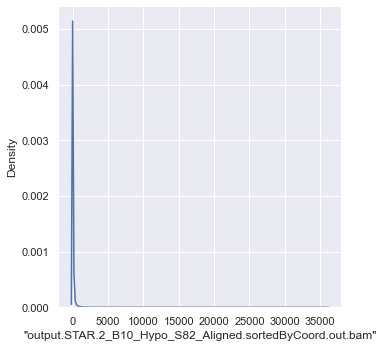

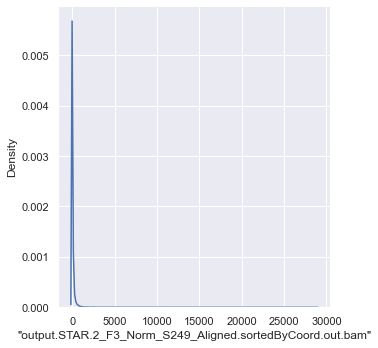

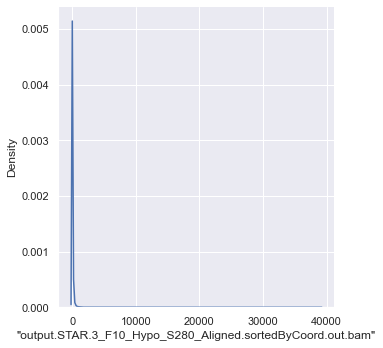

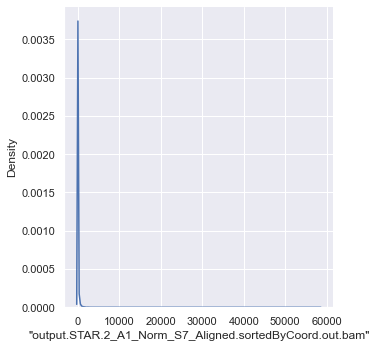

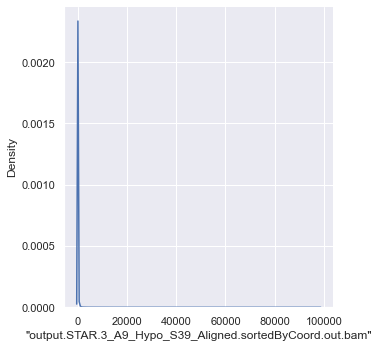

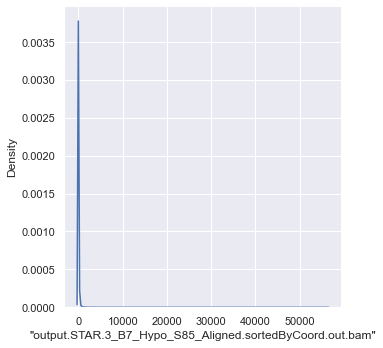

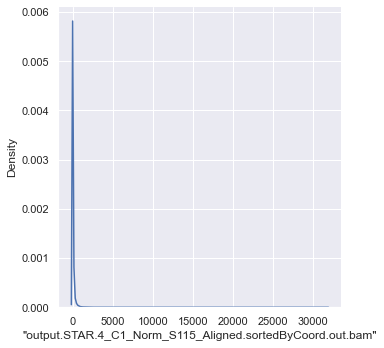

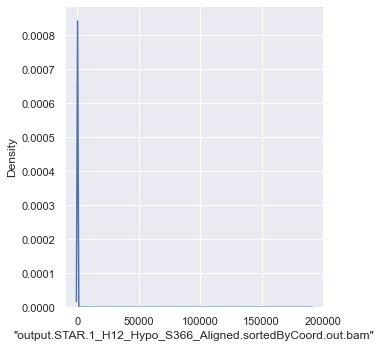

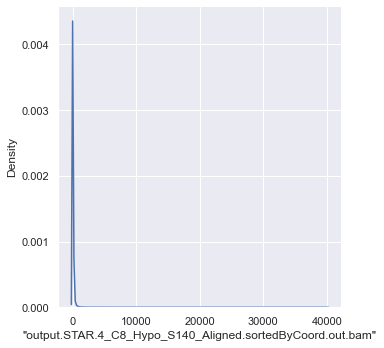

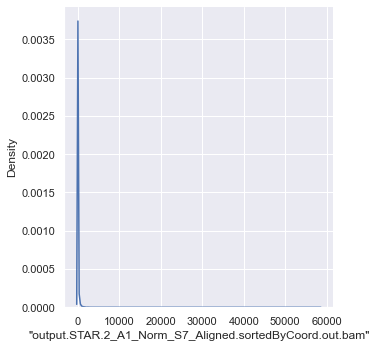

In [11]:
random_variable_indices = [randint(0,383) for i in range(0,10)]
print(random_variable_indices)

for i in random_variable_indices:
    sns.displot(
        mcf7_smarts_unfiltered,
        x= mcf7_smarts_unfiltered.columns.tolist()[i], 
        kind="kde"
    )


The plots confirm what we wrote about the distribution characterstic: we observe an elongated right tail. 

We continue exploratory data analysis with investigating outleirs. We choose to use IQR formula to detect the outliers. Anything outside this range, will be dropped:

In [12]:
Q1 = mcf7_smarts_unfiltered.quantile(0.25)
Q3 = mcf7_smarts_unfiltered.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"    17.0
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"     0.0
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"     5.0
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"       0.0
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"       7.0
                                                              ... 
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"     9.0
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"    27.0
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"    30.0
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"    38.0
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"    33.0
Length: 383, dtype: float64


In [13]:
mcf7_smarts_unfiltered_noOut = mcf7_smarts_unfiltered[~((mcf7_smarts_unfiltered < (Q1 - 1.5 * IQR)) |(mcf7_smarts_unfiltered > (Q3 + 1.5 * IQR))).any(axis=1)]
print(mcf7_smarts_unfiltered_noOut.shape)

(6435, 383)


In [14]:
mcf7_smarts_unfiltered.shape

(22934, 383)

In [15]:
100*(22934-6435)/22934

71.94122263887678

Using interquartile range method to remove the outliers results in taking away 72% of our dataset which is not a desired outcome. As we observed above, many observations are filled with 0s. 

We can quantify sparisty this way: if X% (where X>threshold) of the gene expressions of an observation is 0, then we consider that observation to be highly selective of some specific gene expressions and hence sparse. 

If an entire dataset has mostly sparse observation then we can say it is a sparse structure. 

In [16]:
def variable_sparsity(variable_series, threshold):
    if len(variable_series[variable_series == 0])/len(variable_series)>=threshold:
        return 1 # it is sparse
    else: 
        return 0 # it is not sparse

In [17]:
df_info_sparsity_th95 = (
    pd.DataFrame(mcf7_smarts_unfiltered.apply(lambda x: variable_sparsity(x, 0.95), axis=0))
    .reset_index()
    .rename(columns={'index':'cell', 0:'flag_sparsity'})
)

df_info_sparsity_th50 = (
    pd.DataFrame(mcf7_smarts_unfiltered.apply(lambda x: variable_sparsity(x, 0.50), axis=0))
    .reset_index()
    .rename(columns={'index':'cell', 0:'flag_sparsity'})
)

In [18]:
df_info_sparsity_th95

cell  flag_sparsity
0    "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCo...              0
1    "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCo...              1
2    "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCo...              0
3    "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoor...              0
4    "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoor...              0
..                                                 ...            ...
378  "output.STAR.4_H5_Norm_S359_Aligned.sortedByCo...              0
379  "output.STAR.4_H6_Norm_S360_Aligned.sortedByCo...              0
380  "output.STAR.4_H7_Hypo_S379_Aligned.sortedByCo...              0
381  "output.STAR.4_H8_Hypo_S380_Aligned.sortedByCo...              0
382  "output.STAR.4_H9_Hypo_S381_Aligned.sortedByCo...              0

[383 rows x 2 columns]

In [19]:
print(len(df_info_sparsity_th95[df_info_sparsity_th95.flag_sparsity ==1]))
print(len(df_info_sparsity_th50[df_info_sparsity_th50.flag_sparsity ==1]))

16
348


In [20]:
100*(348/383)

90.86161879895562

We defined two thresolds for sparsity: 95% and 50%. 

We see that 91% of the single cells have more than half of the gene expressions as 0, which means we do not have densely expressive cells. 

We can do the same analysis for the sparsity of the features themselves:

In [21]:
df_info_sparsity_th95_feature = (
    pd.DataFrame(mcf7_smarts_unfiltered.T.apply(lambda x: variable_sparsity(x, 0.95), axis=0))
    .reset_index()
    .rename(columns={'index':'variable', 0:'flag_sparsity'})
)

df_info_sparsity_th50_feature = (
    pd.DataFrame(mcf7_smarts_unfiltered.T.apply(lambda x: variable_sparsity(x, 0.50), axis=0))
    .reset_index()
    .rename(columns={'index':'variable', 0:'flag_sparsity'})
)

In [22]:
print(len(df_info_sparsity_th95_feature[df_info_sparsity_th95_feature.flag_sparsity ==1])/len(mcf7_smarts_unfiltered.T))
print(len(df_info_sparsity_th50_feature[df_info_sparsity_th50_feature.flag_sparsity ==1])/len(mcf7_smarts_unfiltered.T))

17.963446475195823
35.01827676240209


We see that almost 30% of cells are not expressed in at least half of the single cells, 18% percent of them are expressed in only 5% of the single cells. 

As we noted earlier, looking at the descriptive statistics and some density plots, the variables are highly centered around zero. 
Let's quantify the skewness and kurtosis: 

Text(0.5, 0, 'Skewness of single cells expression profiles - original df')

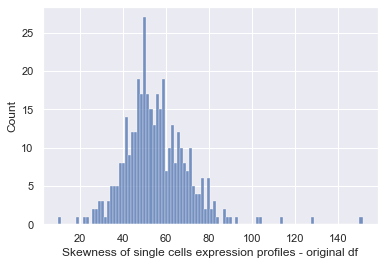

In [23]:
colN = mcf7_smarts_unfiltered.shape[1]
colN
list_skew_cells = []
for i in range(colN) :     
     v_df = mcf7_smarts_unfiltered[mcf7_smarts_unfiltered.columns.tolist()[i]]
     list_skew_cells += [skew(v_df)]   
  #  df_skew_cells += [df[cnames[i]].skew()]
list_skew_cells
sns.histplot(list_skew_cells,bins=100)
plt.xlabel('Skewness of single cells expression profiles - original df')

In [24]:
list_skew_cells

[65.37006963464164,
 38.757057757830026,
 48.17071111386066,
 25.526517911830066,
 61.845102435720776,
 67.08249677429846,
 36.612008466309156,
 71.07021870973485,
 46.99681344066586,
 50.732659085234005,
 62.05606742798137,
 48.506412433375324,
 43.980148001172424,
 44.8691309157291,
 45.240902627133956,
 78.66242273596696,
 59.01380313665439,
 21.928874819985605,
 73.8210177139657,
 59.04932828249711,
 66.22275900553667,
 58.96593667640693,
 44.96986532634896,
 103.86731864915672,
 57.89553479345821,
 52.64980700309224,
 80.00807665860066,
 29.81450276935768,
 75.88569276983516,
 62.77073674327232,
 58.967314127982874,
 56.35768787121093,
 57.05824203467975,
 57.40692781832745,
 35.865560499764676,
 69.70304704232541,
 51.54771295843748,
 50.4302831519899,
 38.05623231866659,
 63.84215005551229,
 55.871098661374255,
 50.13985775387157,
 65.50723403031346,
 35.10247604200467,
 39.35587400774901,
 57.63201263907013,
 82.75324463209218,
 61.22967602896186,
 52.80763510345485,
 68.072178

Text(0.5, 0, 'Kurtosis of single cells expression profiles - original df')

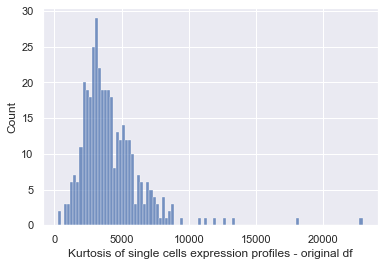

In [25]:
list_kurt_cells = []
for i in range(colN) :     
     v_df_kurt = mcf7_smarts_unfiltered[mcf7_smarts_unfiltered.columns.tolist()[i]]
     list_kurt_cells += [kurtosis(v_df_kurt)]   
 #   df_kurt_cells += [df[mcf7_smarts_unfiltered.columns.tolist()[i]].kurt()]
list_kurt_cells
sns.histplot(list_kurt_cells,bins=100)
plt.xlabel('Kurtosis of single cells expression profiles - original df')

As suggested by the histograms, the data is far from normal distribution with many samples having high skewness and kurtosis values. 

This is not good because when the data is not following a normal distribution, it might violate some assumptions of a machine learning model. Or it might just make it hard for the algorithm to detect the differences among non 0 values. 

One way to make the distribution less skewed is to apply a log transformation:

<AxesSubplot:xlabel='"output.STAR.1_B6_Norm_S54_Aligned.sortedByCoord.out.bam"'>

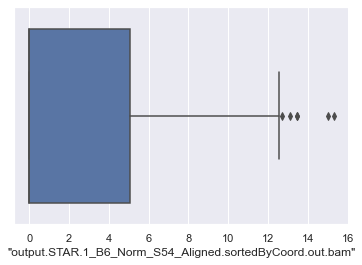

In [26]:
var21_log2 = np.log2(mcf7_smarts_unfiltered[mcf7_smarts_unfiltered.columns.tolist()[20]]+1)
sns.boxplot(x=var21_log2)

The same sample before log transformation is heavily centered around 0:

<AxesSubplot:xlabel='"output.STAR.1_B6_Norm_S54_Aligned.sortedByCoord.out.bam"'>

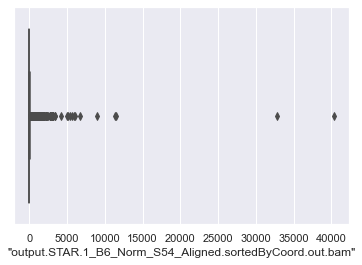

In [27]:
sns.boxplot(x=mcf7_smarts_unfiltered[mcf7_smarts_unfiltered.columns.tolist()[20]]+1)

In [28]:
var21_log2.describe().round(2)

count    22934.00
mean         2.49
std          2.98
min          0.00
25%          0.00
50%          0.00
75%          5.04
max         15.30
Name: "output.STAR.1_B6_Norm_S54_Aligned.sortedByCoord.out.bam", dtype: float64

Now lets take only the first 50 columns/cells (for speed), and calculate skewness and kurtosis after applying log transformation to them:

In [29]:
df_mcf7_50vars_log2 = (mcf7_smarts_unfiltered.iloc[:,:50]+1).apply(np.log2)
print(df_mcf7_50vars_log2.shape)

(22934, 50)


In [30]:
df_mcf7_50vars_log2

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                              0.000000            
"MIR6859-1"                                           0.000000            
"WASH9P"                                              1.000000            
"OR4F29"                                              0.000000            
"MTND1P23"                                            0.000000            
...                                                        ...            
"MT-TE"                                               2.321928            
"MT-CYB"                                              8.082149            
"MT-TT"                                               0.000000            
"MT-TP"                                               2.584963            
"MAFIP"                                               3.169925            

             "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                   0.0            
"MIR6859-1"                                                0.0            
"WASH9P"                                                   0.0            
"OR4F29"                                                   0.0            
"MTND1P23"                                                 0.0            
...                                                        ...            
"MT-TE"                                                    0.0            
"MT-CYB"                                                   1.0            
"MT-TT"                                                    0.0            
"MT-TP"                                                    0.0            
"MAFIP"                                                    0.0            

             "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                              0.000000            
"MIR6859-1"                                           0.000000            
"WASH9P"                                              0.000000            
"OR4F29"                                              0.000000            
"MTND1P23"                                            0.000000            
...                                                        ...            
"MT-TE"                                               0.000000            
"MT-CYB"                                              6.266787            
"MT-TT"                                               0.000000            
"MT-TP"                                               0.000000            
"MAFIP"                                               0.000000            

             "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                              0.000000          
"MIR6859-1"                                           0.000000          
"WASH9P"                                              0.000000          
"OR4F29"                                              0.000000          
"MTND1P23"                                            0.000000          
...                                                        ...          
"MT-TE"                                               0.000000          
"MT-CYB"                                              6.066089          
"MT-TT"                                               0.000000          
"MT-TP"                                               1.000000          
"MAFIP"                                               0.000000          

             "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                              0.000000          
"MIR6859-1"                                           0.000000          
"WASH9P"                                              0.000000          
"OR4F29"                                              0.000000          
"MTND1P23"                                            0.000000      

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

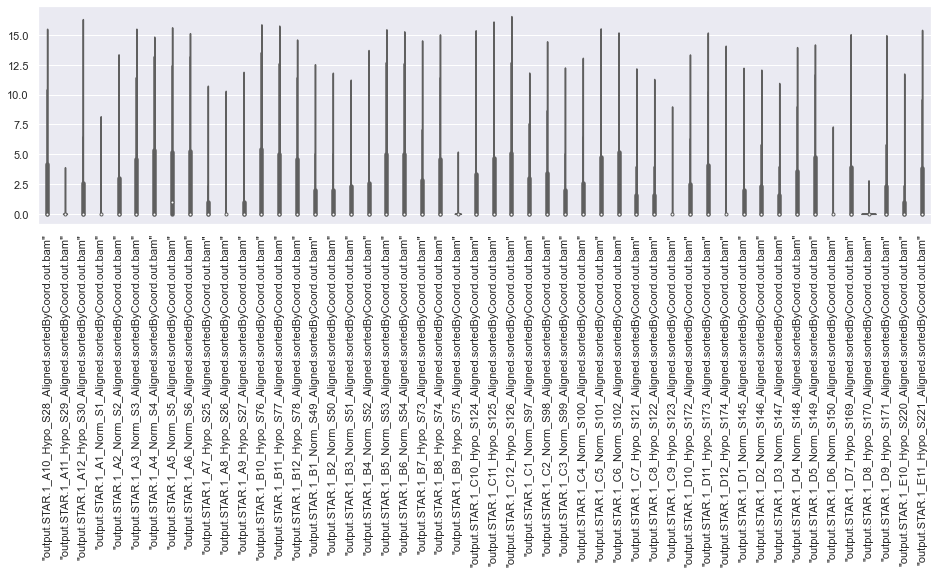

In [31]:
np.shape(df_mcf7_50vars_log2)
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df_mcf7_50vars_log2,palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)

Text(0.5, 0, 'Skewness of single cells expression profiles - log2 df')

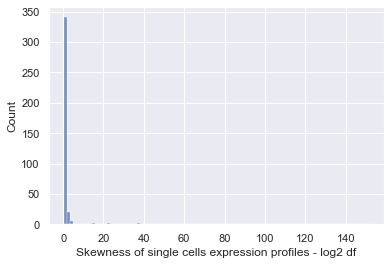

In [32]:
df_mcf7_allVars_log2 = (mcf7_smarts_unfiltered.iloc[:,:]+1).apply(np.log2) # log transformation of all variables

df1_log2_skew_cells = []
for i in range(df_mcf7_allVars_log2.shape[1]):
    v_df = df_mcf7_allVars_log2[df_mcf7_allVars_log2.columns.tolist()[i]]
    df1_log2_skew_cells += [skew(v_df)]   
df1_log2_skew_cells
sns.histplot(df1_log2_skew_cells,bins=100)
plt.xlabel('Skewness of single cells expression profiles - log2 df')

Now most of the variables have skewness score around 0 as we expected after applying the log transformation

Text(0.5, 0, 'Kurtosis of single cells expression profiles - log2 df')

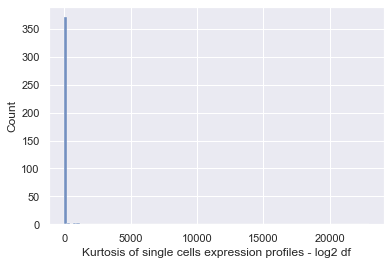

In [33]:
df1_log2_kurt_cells = []
for i in range(df_mcf7_allVars_log2.shape[1]) :     
     v_df = df_mcf7_allVars_log2[df_mcf7_allVars_log2.columns.tolist()[i]]
     df1_log2_kurt_cells += [kurtosis(v_df)] 
df1_log2_kurt_cells
sns.histplot(df1_log2_kurt_cells,bins=100)
plt.xlabel('Kurtosis of single cells expression profiles - log2 df')

In [34]:
len(df1_log2_kurt_cells)

383

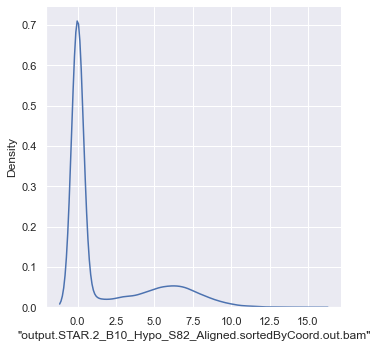

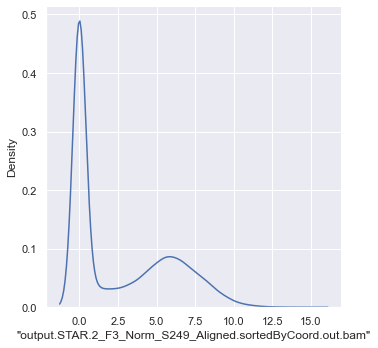

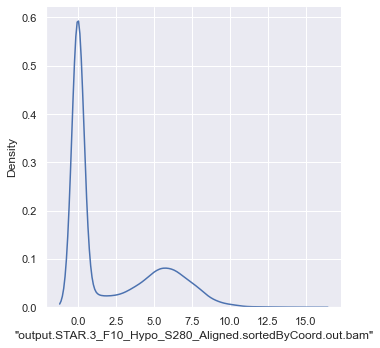

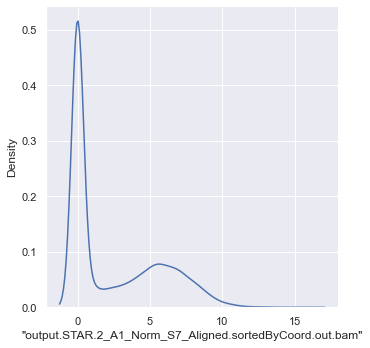

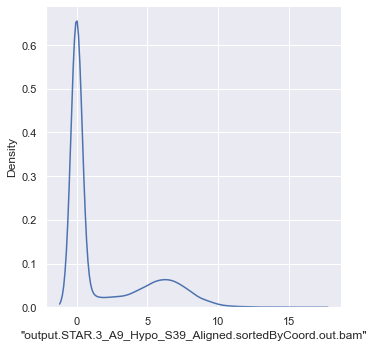

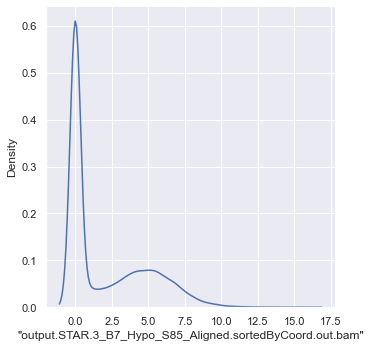

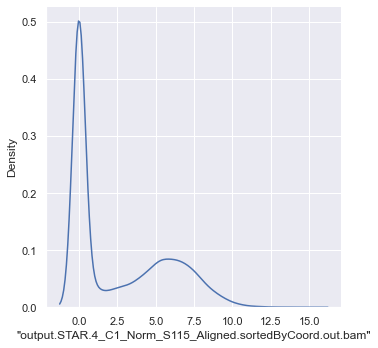

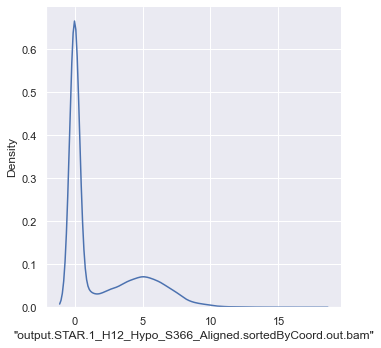

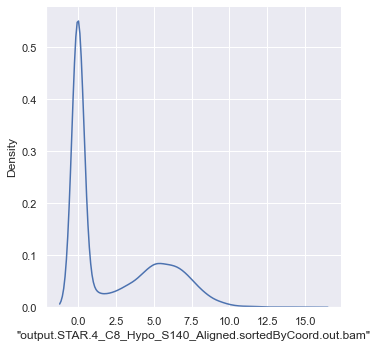

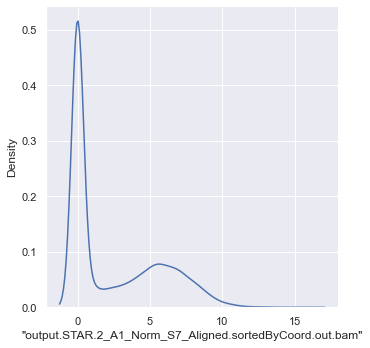

In [35]:
for i in random_variable_indices:
    sns.displot(
        df_mcf7_allVars_log2,
        x= df_mcf7_allVars_log2.columns.tolist()[i], 
        kind="kde"
    )

If we compare the density plots with the ones above before the transformation, we see them changed, the distributions become more bimodal. 

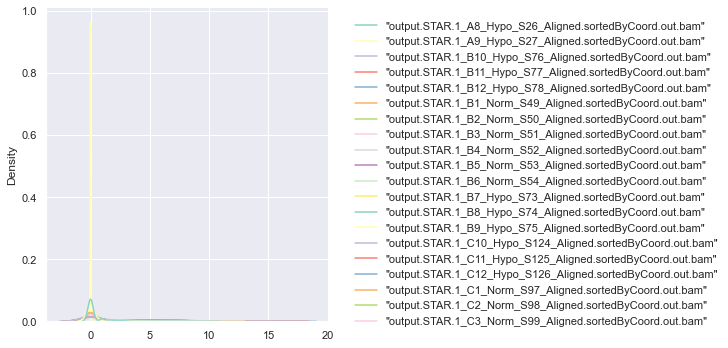

In [36]:
df_mcf7_allVars_log2_small = df_mcf7_allVars_log2.iloc[:, 10:30]  #just selecting part of the samples so run time not too long
sns.displot(data=df_mcf7_allVars_log2_small,palette="Set3",kind="kde", bw_adjust=2)

In [37]:
df_mcf7_allVars_log2_small.describe()

"output.STAR.1_A8_Hypo_S26_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000           
mean                                            0.353154           
std                                             0.832173           
min                                             0.000000           
25%                                             0.000000           
50%                                             0.000000           
75%                                             0.000000           
max                                            10.308339           

       "output.STAR.1_A9_Hypo_S27_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000           
mean                                            0.657661           
std                                             1.329864           
min                                             0.000000           
25%                                             0.000000           
50%                                             0.000000           
75%                                             1.000000           
max                                            11.898223           

       "output.STAR.1_B10_Hypo_S76_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000            
mean                                            2.409594            
std                                             3.288693            
min                                             0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                             5.459432            
max                                            15.884075            

       "output.STAR.1_B11_Hypo_S77_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000            
mean                                            2.272319            
std                                             3.029951            
min                                             0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                             5.044394            
max                                            15.774916            

       "output.STAR.1_B12_Hypo_S78_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000            
mean                                            2.190513            
std                                             2.752105            
min                                             0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                             4.584963            
max                                            14.609352            

       "output.STAR.1_B1_Norm_S49_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000           
mean                                            1.084944           
std                                             1.669870           
min                                             0.000000           
25%                                             0.000000           
50%                                             0.000000           
75%                                             2.000000           
max                                            12.541339           

       "output.STAR.1_B2_Norm_S50_Aligned.sortedByCoord.out.bam"  \
count                                       22934.000000           
mean                                            1.055311           
std                                             1.661270           
min                           

Let's normalize the data between cells with Normalizer transformer of sklearn:

In [38]:
from sklearn.preprocessing import Normalizer 
transformer = Normalizer().fit(df_mcf7_allVars_log2)
df_mcf7_allVars_log2_norm = pd.DataFrame(
    transformer.transform(df_mcf7_allVars_log2), 
    columns=df_mcf7_allVars_log2.columns
)

In [39]:
df_mcf7_allVars_log2_norm.describe().round(2)

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
count                                           22934.00            
mean                                                0.02            
std                                                 0.04            
min                                                 0.00            
25%                                                 0.00            
50%                                                 0.00            
75%                                                 0.05            
max                                                 0.71            

       "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"  \
count                                           22934.00            
mean                                                0.00            
std                                                 0.01            
min                                                 0.00            
25%                                                 0.00            
50%                                                 0.00            
75%                                                 0.00            
max                                                 0.71            

       "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"  \
count                                           22934.00            
mean                                                0.02            
std                                                 0.05            
min                                                 0.00            
25%                                                 0.00            
50%                                                 0.00            
75%                                                 0.05            
max                                                 0.93            

       "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"  \
count                                           22934.00          
mean                                                0.00          
std                                                 0.01          
min                                                 0.00          
25%                                                 0.00          
50%                                                 0.00          
75%                                                 0.00          
max                                                 0.47          

       "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"  \
count                                           22934.00          
mean                                                0.02          
std                                                 0.03          
min                                                 0.00          
25%                                                 0.00          
50%                                                 0.00          
75%                                                 0.04          
max                                                 0.58          

       "output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"  \
count                                           22934.00          
mean                                                0.03          
std                                                 0.04          
min                                                 0.00          
25%                                                 0.00          
50%                                                 0.00          
75%                                                 0.06          
max                                                 0.85          

       "output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam"  \
count                                           22934.00          
mean                                                0.04          
std                                                 0.05          
min                                                 0.00     

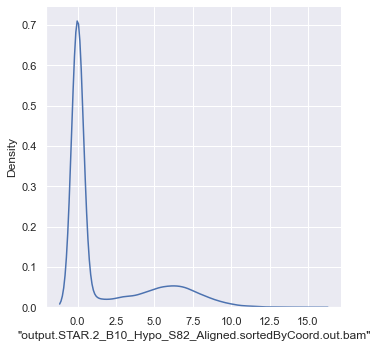

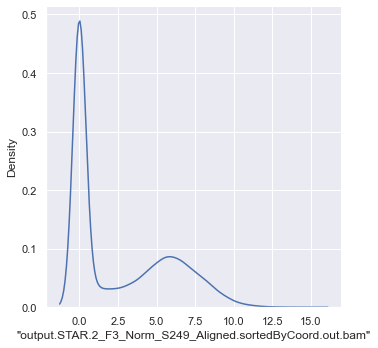

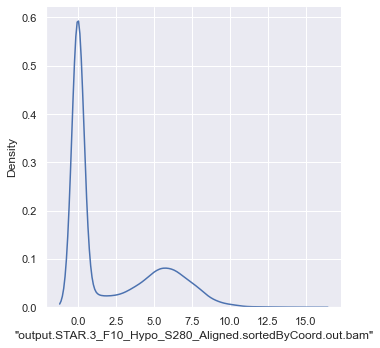

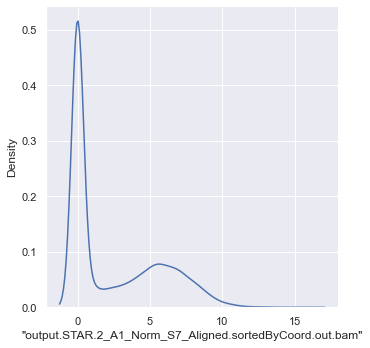

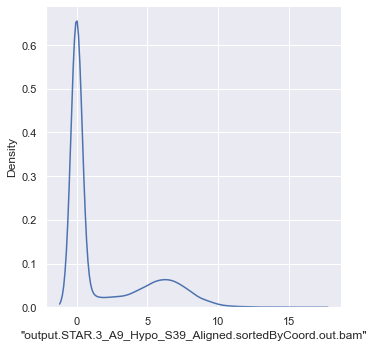

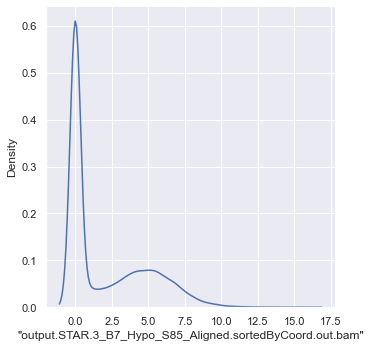

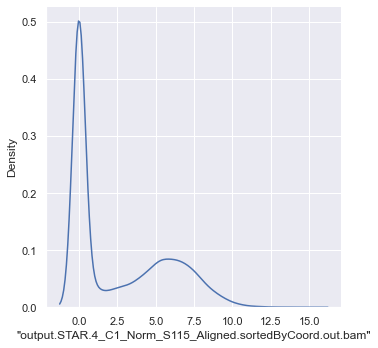

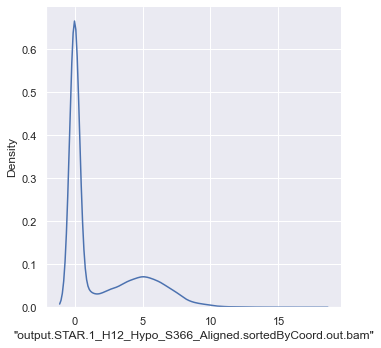

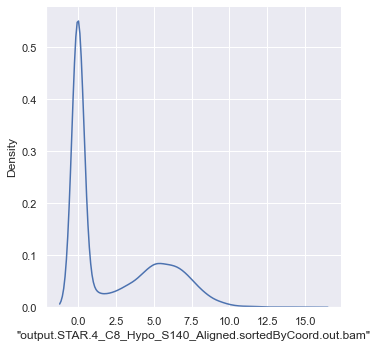

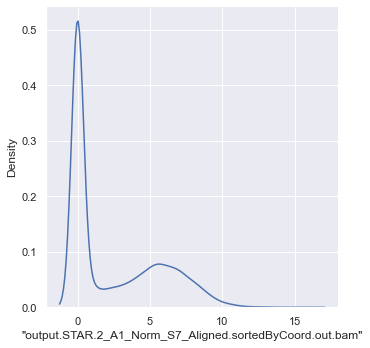

In [40]:
for i in random_variable_indices:
    sns.displot(
        df_mcf7_allVars_log2,
        x= df_mcf7_allVars_log2_norm.columns.tolist()[i], 
        kind="kde"
    )

I am loading the filtered and filtered+normalized datasets to make a comparison as requested:

In [41]:
mcf7_smarts_filtered = pd.read_csv("SmartSeq/MCF7_SmartS_Filtered_Data.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(mcf7_smarts_filtered))
print("First column: ", mcf7_smarts_filtered.iloc[ : , 0])

mcf7_smarts_filtered_normalized = pd.read_csv("SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(mcf7_smarts_filtered_normalized))
print("First column: ", mcf7_smarts_filtered_normalized.iloc[ : , 0])

Dataframe dimensions: (18945, 313)
First column:  "WASH7P"         0
"MIR6859-1"      0
"WASH9P"         1
"OR4F29"         0
"MTND1P23"       0
              ... 
"MT-TE"          4
"MT-CYB"       270
"MT-TT"          0
"MT-TP"          5
"MAFIP"          8
Name: "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam", Length: 18945, dtype: int64
Dataframe dimensions: (3000, 250)
First column:  "CYP1B1"        343
"CYP1B1-AS1"    140
"CYP1A1"          0
"NDRG1"           0
"DDIT4"         386
               ... 
"GRIK5"           0
"SLC25A27"        0
"DENND5A"        51
"CDK5R1"          0
"FAM13A-AS1"      0
Name: "output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam", Length: 3000, dtype: int64


108
161
252
99
203
213
315
86
322
99


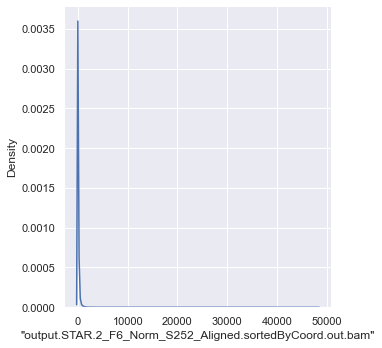

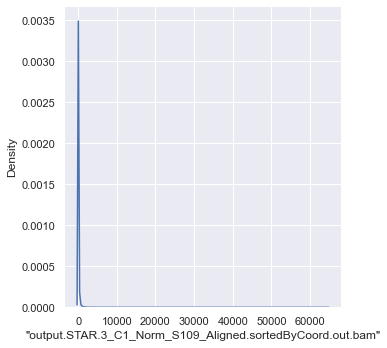

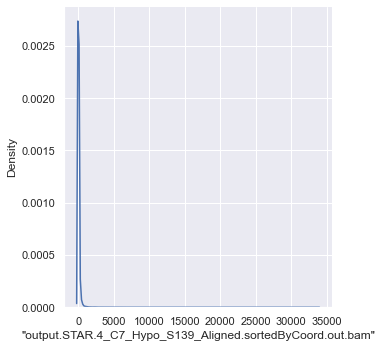

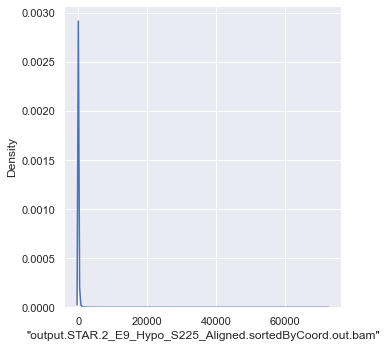

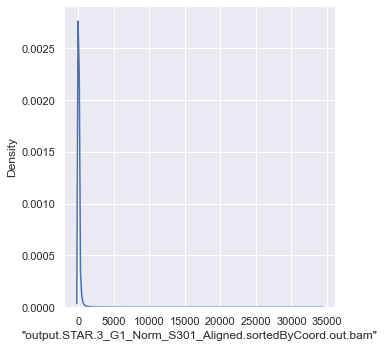

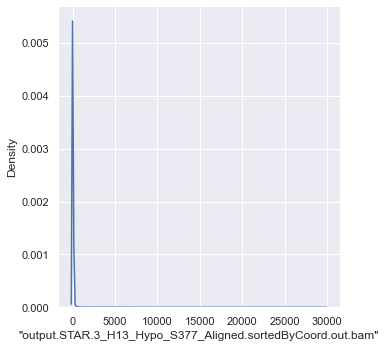

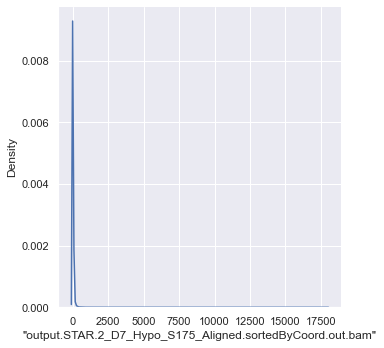

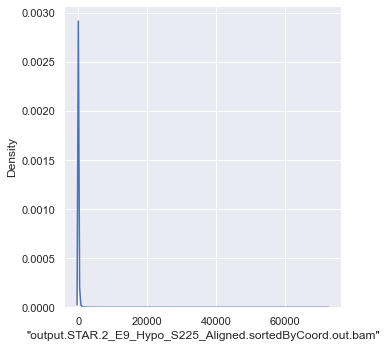

In [42]:
for i in random_variable_indices:
    print(i)
    if i<mcf7_smarts_filtered.shape[1]:
        sns.displot(
            mcf7_smarts_filtered ,
            x= mcf7_smarts_filtered.columns.tolist()[i], 
            kind="kde"
        )

The samples in the filtered dataset has the same shape of the distribution:

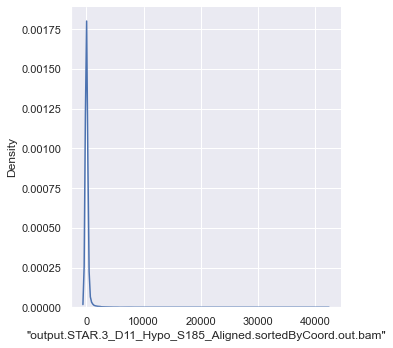

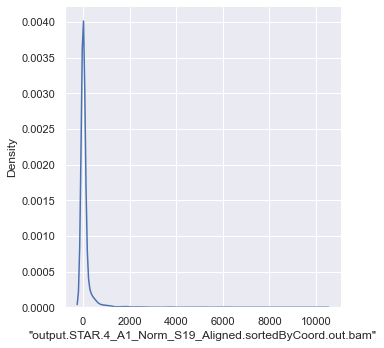

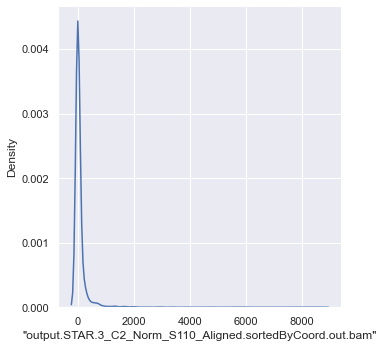

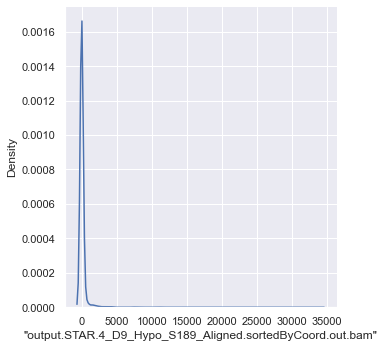

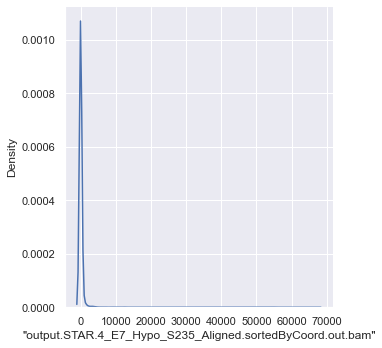

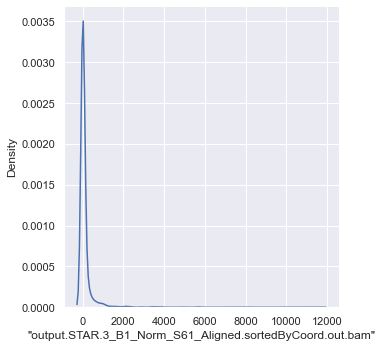

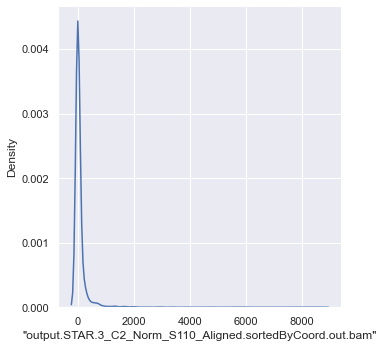

In [43]:
for i in random_variable_indices:
    if i<mcf7_smarts_filtered_normalized.shape[1]:
        sns.displot(
            mcf7_smarts_filtered_normalized,
            x= mcf7_smarts_filtered_normalized.columns.tolist()[i], 
            kind="kde"
        )

Text(0.5, 0, 'Skewness of single cells expression profiles - filtered & normalized df')

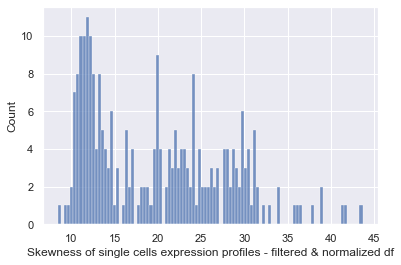

In [44]:
colN_filtered_normalized = mcf7_smarts_filtered_normalized.shape[1]
colN_filtered_normalized
list_skew_cells_filtered_normalized = []
for i in range(colN_filtered_normalized) :     
     v_df = mcf7_smarts_filtered_normalized[mcf7_smarts_filtered_normalized.columns.tolist()[i]]
     list_skew_cells_filtered_normalized += [skew(v_df)]   
  #  df_skew_cells += [df[cnames[i]].skew()]
list_skew_cells_filtered_normalized
sns.histplot(list_skew_cells_filtered_normalized,bins=100)
plt.xlabel('Skewness of single cells expression profiles - filtered & normalized df')

Text(0.5, 0, 'Skewness of single cells expression profiles - filtered  df')

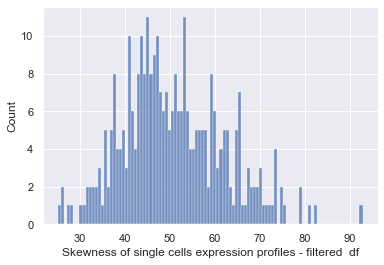

In [45]:
colN_filtered = mcf7_smarts_filtered.shape[1]
colN_filtered
list_skew_cells_filtered = []
for i in range(colN_filtered) :     
     v_df = mcf7_smarts_filtered[mcf7_smarts_filtered.columns.tolist()[i]]
     list_skew_cells_filtered += [skew(v_df)]   
  #  df_skew_cells += [df[cnames[i]].skew()]
list_skew_cells_filtered
sns.histplot(list_skew_cells_filtered,bins=100)
plt.xlabel('Skewness of single cells expression profiles - filtered  df')

In [46]:
mcf7_smarts_filtered[['"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam"']].describe().round(2)

"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam"
count                                           18945.00        
mean                                               84.70        
std                                               730.31        
min                                                 0.00        
25%                                                 0.00        
50%                                                 2.00        
75%                                                51.00        
max                                             64491.00

In [47]:
mcf7_smarts_filtered_normalized[['"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam"']].describe().round(2)

"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam"
count                                            3000.00        
mean                                               74.14        
std                                               345.01        
min                                                 0.00        
25%                                                 0.00        
50%                                                 0.00        
75%                                                24.00        
max                                              8222.00

Normalized that dataset has has smaller std, the range of values it accepts is shorter. 

In [48]:
duplicate_rows_df_mcf7_allVars_log2 = df_mcf7_allVars_log2[df_mcf7_allVars_log2.duplicated(keep=False)]
print("number of duplicate rows: ", duplicate_rows_df_mcf7_allVars_log2.shape)
print("number of duplicate rows: ", duplicate_rows_df_mcf7_allVars_log2)

number of duplicate rows:  (56, 383)
number of duplicate rows:                     "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
"SHISAL2A"                                                       0.0            
"IL12RB2"                                                        0.0            
"S1PR1"                                                          0.0            
"CD84"                                                           0.0            
"GNLY"                                                           0.0            
"FAR2P3"                                                         0.0            
"KLF2P3"                                                         0.0            
"PABPC1P2"                                                       0.0            
"UGT1A8"                                                         0.0            
"UGT1A9"                                                         0.0            
"SLC22A14"                                   

To understand which genes convey the same information, we can check their correlations. 

In [49]:
#print("names of duplicate rows: ",duplicate_rows_df.index)
duplicate_rows_df_mcf7_allVars_log2_t = duplicate_rows_df_mcf7_allVars_log2.T
duplicate_rows_df_mcf7_allVars_log2_t
c_dupl = duplicate_rows_df_mcf7_allVars_log2_t.corr()
c_dupl

"SHISAL2A"  "IL12RB2"   "S1PR1"    "CD84"    "GNLY"  \
"SHISAL2A"           1.000000   0.595969  0.600789  0.374125  0.497375   
"IL12RB2"            0.595969   1.000000  0.719609  0.902085  0.595969   
"S1PR1"              0.600789   0.719609  1.000000  0.452186  0.600789   
"CD84"               0.374125   0.902085  0.452186  1.000000  0.374125   
"GNLY"               0.497375   0.595969  0.600789  0.374125  1.000000   
"FAR2P3"            -0.008333  -0.008126 -0.008102 -0.008126 -0.008333   
"KLF2P3"            -0.008333  -0.008126 -0.008102 -0.008126 -0.008333   
"PABPC1P2"           0.497375   0.975214  0.600789  0.975214  0.497375   
"UGT1A8"            -0.013522  -0.013187 -0.013148 -0.013187 -0.013522   
"UGT1A9"            -0.013522  -0.013187 -0.013148 -0.013187 -0.013522   
"SLC22A14"           0.497375   0.975214  0.600789  0.975214  0.497375   
"COQ10BP2"           1.000000   0.595969  0.600789  0.374125  0.497375   
"PANDAR"            -0.020348  -0.019843 -0.019784 -0.019843 -0.020348   
"LAP3P2"            -0.020348  -0.019843 -0.019784 -0.019843 -0.020348   
"RPL22P16"          -0.005249  -0.005119 -0.005104 -0.005119 -0.005249   
"GALNT17"            0.595969   1.000000  0.719609  0.902085  0.595969   
"PON1"               0.595969   1.000000  0.719609  0.902085  0.595969   
"HTR5A"             -0.005249  -0.005119 -0.005104 -0.005119 -0.005249   
"SNORA36A"          -0.005593  -0.005455 -0.005438 -0.005455 -0.005593   
"MIR664B"           -0.005593  -0.005455 -0.005438 -0.005455 -0.005593   
"CSMD1"              0.233664   0.785477  0.282777  0.975655  0.233664   
"KCNS2"              0.497375   0.595969  0.600789  0.374125  1.000000   
"MIR548AA1"         -0.005119  -0.004992 -0.004977 -0.004992 -0.005119   
"MIR548D1"          -0.005119  -0.004992 -0.004977 -0.004992 -0.005119   
"MTCO2P11"          -0.005249  -0.005119 -0.005104 -0.005119 -0.005249   
"CLCN3P1"            0.251552   0.801883  0.304354  0.981215  0.251552   
"SUGT1P4-STRA6LP"    0.037564  -0.030417 -0.030325 -0.030417 -0.031190   
"STRA6LP"            0.037564  -0.030417 -0.030325 -0.030417 -0.031190   
"MUC6"               0.600789   0.719609  1.000000  0.452186  0.600789   
"VSTM4"              0.497375   0.595969  0.600789  0.374125  0.497375   
"LINC00856"         -0.008950  -0.008728  0.091960 -0.008728 -0.008950   
"LINC00595"         -0.008950  -0.008728  0.091960 -0.008728 -0.008950   
"CACYBPP1"          -0.005249  -0.005119 -0.005104 -0.005119 -0.005249   
"LINC00477"         -0.007266  -0.007086 -0.007065 -0.007086 -0.007266   
"KNOP1P1"           -0.007266  -0.007086 -0.007065 -0.007086 -0.007266   
"WDR95P"             0.374125   0.902085  0.452186  1.000000  0.374125   
"MIR20A"            -0.005119  -0.004992 -0.004977 -0.004992 -0.005119   
"MIR19B1"           -0.005119  -0.004992 -0.004977 -0.004992 -0.005119   
"RPL21P5"            0.497375   0.595969  0.600789  0.374125  0.497375   
"RNU6-539P"         -0.005249  -0.005119 -0.005104 -0.005119 -0.005249   
"SNRPN"             -0.005249  -0.005119 -0.005104 -0.005119 -0.005249   
"SNURF"             -0.005249  -0.005119 -0.005104 -0.005119 -0.005249   
"RBFOX1"             0.497375   0.595969  0.600789  0.374125  0.497375   
"LINC02183"          0.595969   0.713849  0.719609  0.448546  0.975214   
"MT1M"               0.595969   0.713849  0.719609  0.448546  0.595969   
"ASPA"               0.595969   0.713849  0.719609  0.448546  0.595969   
"BCL6B"              0.497375   0.595969  0.600789  0.374125  1.000000   
"CCL3L3"            -0.011697  -0.011407 -0.011372 -0.011407  0.113449   
"CCL3L1"            -0.011697  -0.011407 -0.011372 -0.011407  0.113449   
"OTOP3"              0.251552   0.801883  0.304354  0.981215  0.251552   
"RNA5SP450"         -0.005249  -0.005119 -0.005104 -0.005119 -0.005249   
"PSG1"               0.497375   0.595969  0.600789  0.374125  0.497375   
"MIR3190"           -0.005249  -0.005119 -0.005104 -0.005119 -0.005249   
"MIR3191"           -0.

We create the dataset without duplicates

In [50]:
df_mcf7_allVars_log2_noDup = df_mcf7_allVars_log2.drop_duplicates()
#df_noDup

In [51]:
100*(len(df_mcf7_allVars_log2)- len(df_mcf7_allVars_log2_noDup))/len(df_mcf7_allVars_log2)

0.12644981250545043

We removed less than 1% of the dataset

## Data structure after EDA

We are investigating the correlations between the samples (i.e. the correlation between gene expression profiles of different cells): 

Number of cells included:  (383, 383)
Average correlation of expression profiles between cells:  0.49700027101345085
Min. correlation of expression profiles between cells:  -0.005999457973098348


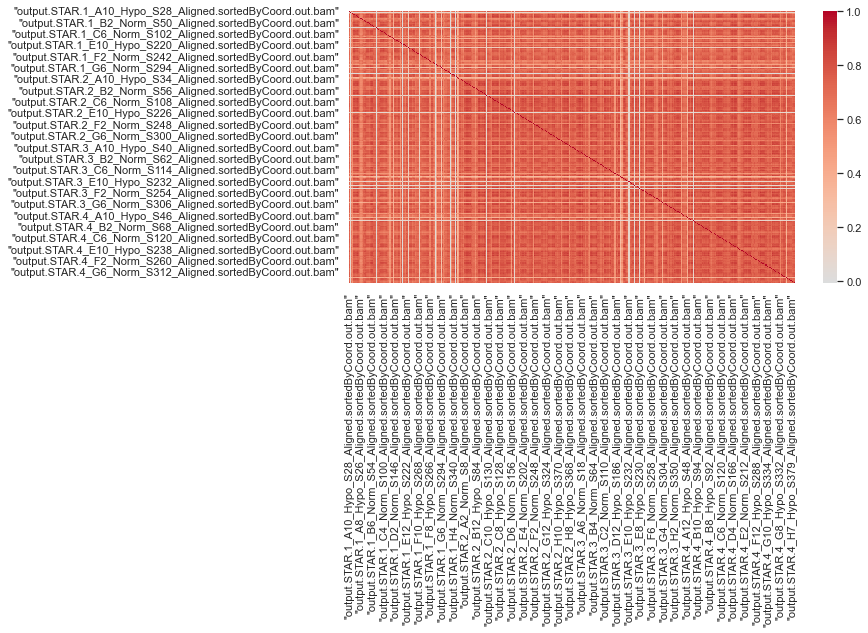

In [52]:
plt.figure(figsize=(10,5))
#df_small = df.iloc[:, :50]
#c= df_small.corr()
c= df_mcf7_allVars_log2_noDup.corr()
midpoint = (c.values.max() - c.values.min()) /2 + c.values.min()
#sns.heatmap(c,cmap='coolwarm',annot=True, center=midpoint )
sns.heatmap(c,cmap='coolwarm', center=0 )
print("Number of cells included: ", np.shape(c))
print("Average correlation of expression profiles between cells: ", midpoint)
print("Min. correlation of expression profiles between cells: ", c.values.min())

We see that the correlation matrix of cells contains high values and therefore is mostly red. There are some white striped that indicate the presence of cells that are not correlated with other cells. 

For each cell we calculate how many low correlated cells there are. For low correlation we defined the correlation threshold as a range between +/- 0.2:

In [53]:
df_lowCorr_info = c[(c < 0.2) & (c>-0.2)].count().reset_index().rename(columns={'index':'cell', 0:'n_lowCorr_cells'})
df_lowCorr_info

cell  n_lowCorr_cells
0    "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCo...               14
1    "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCo...              382
2    "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCo...               14
3    "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoor...               13
4    "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoor...               13
..                                                 ...              ...
378  "output.STAR.4_H5_Norm_S359_Aligned.sortedByCo...               14
379  "output.STAR.4_H6_Norm_S360_Aligned.sortedByCo...               14
380  "output.STAR.4_H7_Hypo_S379_Aligned.sortedByCo...               14
381  "output.STAR.4_H8_Hypo_S380_Aligned.sortedByCo...               14
382  "output.STAR.4_H9_Hypo_S381_Aligned.sortedByCo...               14

[383 rows x 2 columns]

Let's define the 'uncorrelated cell group' as the group of cells that have low correlation with at least half of the other cells:

In [54]:
df_lowCorr_info[df_lowCorr_info['n_lowCorr_cells']> 383/2]

cell  n_lowCorr_cells
1    "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCo...              382
23   "output.STAR.1_B9_Hypo_S75_Aligned.sortedByCoo...              379
46   "output.STAR.1_D8_Hypo_S170_Aligned.sortedByCo...              378
51   "output.STAR.1_E1_Norm_S193_Aligned.sortedByCo...              340
60   "output.STAR.1_F10_Hypo_S268_Aligned.sortedByC...              364
74   "output.STAR.1_G12_Hypo_S318_Aligned.sortedByC...              382
87   "output.STAR.1_H1_Norm_S337_Aligned.sortedByCo...              382
91   "output.STAR.1_H5_Norm_S341_Aligned.sortedByCo...              382
118  "output.STAR.2_B8_Hypo_S80_Aligned.sortedByCoo...              378
142  "output.STAR.2_D8_Hypo_S176_Aligned.sortedByCo...              382
240  "output.STAR.3_E10_Hypo_S232_Aligned.sortedByC...              375
245  "output.STAR.3_E3_Norm_S207_Aligned.sortedByCo...              381
249  "output.STAR.3_E7_Hypo_S229_Aligned.sortedByCo...              380
295  "output.STAR.4_A5_Norm_S23_Aligned.sortedByCoo...              382

In [55]:
print(len(df_lowCorr_info[df_lowCorr_info['n_lowCorr_cells']> 383/2]))

14


14 cells are expressing very different gene profiles (i.e. their correlations with almost all of the cells is between -0.2 and 0.2)


In [56]:
uncorrelated_cells = df_lowCorr_info.cell.tolist()

In [57]:
df_mcf7_allVars_log2_noDup[uncorrelated_cells].describe(percentiles=[0.05,0.25,0.5,0.75,0.95]).round(2)

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
count                                           22905.00            
mean                                                1.89            
std                                                 2.74            
min                                                 0.00            
5%                                                  0.00            
25%                                                 0.00            
50%                                                 0.00            
75%                                                 4.17            
95%                                                 7.24            
max                                                15.51            

       "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"  \
count                                           22905.00            
mean                                                0.01            
std                                                 0.12            
min                                                 0.00            
5%                                                  0.00            
25%                                                 0.00            
50%                                                 0.00            
75%                                                 0.00            
95%                                                 0.00            
max                                                 3.91            

       "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"  \
count                                           22905.00            
mean                                                1.73            
std                                                 3.06            
min                                                 0.00            
5%                                                  0.00            
25%                                                 0.00            
50%                                                 0.00            
75%                                                 2.58            
95%                                                 8.26            
max                                                16.32            

       "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"  \
count                                           22905.00          
mean                                                0.41          
std                                                 0.93          
min                                                 0.00          
5%                                                  0.00          
25%                                                 0.00          
50%                                                 0.00          
75%                                                 0.00          
95%                                                 2.58          
max                                                 8.18          

       "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"  \
count                                           22905.00          
mean                                                1.57          
std                                                 2.16          
min                                                 0.00          
5%                                                  0.00          
25%                                                 0.00          
50%                                                 0.00          
75%                                                 3.00          
95%                                                 6.00          
max                                                13.37          

       "output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"  \
count                                           22905.00          
mean                                                2.18          
std                                               

Low correlated group of cells are having 0 in at least half of their data points, some have even 3/4 of their distribution as 0. 

We can also look at the cells that are highly correlated with other cells in the same way. We define the high correlation threshold as values greater than 0.75 and less than -0.75:

In [58]:
df_highCorr_info = c[(c < -0.75) | (c> 0.75)].count().reset_index().rename(columns={'index':'cell', 0:'n_highCorr_cells'})
print(len(df_highCorr_info[df_highCorr_info['n_highCorr_cells']> 383/2]))

151


Half of the cells are highly correlated with at least half of the other cells

In [59]:
df_highCorr_info.sort_values(by='n_highCorr_cells', ascending=False).head(5)

cell  n_highCorr_cells
373  "output.STAR.4_H14_Hypo_S383_Aligned.sortedByC...               288
132  "output.STAR.2_D10_Hypo_S178_Aligned.sortedByC...               284
338  "output.STAR.4_E12_Hypo_S240_Aligned.sortedByC...               282
116  "output.STAR.2_B6_Norm_S60_Aligned.sortedByCoo...               277
130  "output.STAR.2_C8_Hypo_S128_Aligned.sortedByCo...               274

These cells above are correlated with more than half of the cells. 

In [60]:
c

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoo...                                           1.000000            
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoo...                                           0.092392            
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoo...                                           0.641451            
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord...                                           0.552030            
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord...                                           0.740154            
...                                                                                               ...            
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoo...                                           0.714914            
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoo...                                           0.689291            
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoo...                                           0.735592            
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoo...                                           0.758200            
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoo...                                           0.772503            

                                                    "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"  \
"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoo...                                           0.092392            
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoo...                                           1.000000            
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoo...                                           0.077445            
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord...                                           0.093890            
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord...                                           0.086249            
...                                                                                               ...            
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoo...                                           0.089407            
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoo...                                           0.079306            
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoo...                                           0.084042            
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoo...                                           0.093441            
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoo...                                           0.095487            

                                                    "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"  \
"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoo...                                           0.641451            
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoo...                                           0.077445            
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoo...                                           1.000000            
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord...                                           0.491788            
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord...                                           0.591907            
...                                                                                               ...            
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoo...                                           0.618269            
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoo...                                           0.604898            
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoo...                                           0.673522            
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoo...                                           0.643244            
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoo...          

Let's look at the correlation between Hypoxia cells: 

In [61]:
hypo_cells = [elem for elem in df_mcf7_allVars_log2_noDup.columns.tolist() if 'Hypo' in elem ]
df_corr_hypo_cells = c[c.index.isin(hypo_cells)]
df_corr_hypo_cells = df_corr_hypo_cells[hypo_cells]
midpoint_hypo = (df_corr_hypo_cells.values.max() - df_corr_hypo_cells.values.min()) /2 + df_corr_hypo_cells.values.min()
print("Number of cells included: ", np.shape(df_corr_hypo_cells))
print("Average correlation of expression profiles between hypoxia cells: ", midpoint_hypo)

#df_mcf7_allVars_log2_noDup.corr()

Number of cells included:  (191, 191)
Average correlation of expression profiles between hypoxia cells:  0.49759528961067007


Let's look at the correlation between Normal cells: 

In [62]:
no_hypo_cells = [elem for elem in df_mcf7_allVars_log2_noDup.columns.tolist() if 'Hypo' not in elem ]
df_corr_nohypo_cells = c[c.index.isin(no_hypo_cells)]
df_corr_nohypo_cells = df_corr_nohypo_cells[no_hypo_cells]
midpoint_nohypo = (df_corr_nohypo_cells.values.max() - df_corr_nohypo_cells.values.min()) /2 + df_corr_nohypo_cells.values.min()
print("Number of cells included: ", np.shape(df_corr_nohypo_cells))
print("Average correlation of expression profiles between hypoxia cells: ", midpoint_nohypo)

#df_mcf7_allVars_log2_noDup.corr()

Number of cells included:  (192, 192)
Average correlation of expression profiles between hypoxia cells:  0.49869550906941246


The average correlation within the two cell groups (low oxygen condition cells and high oxygen condition) is similar. 
That means high oxygen cells are not more similar to each other than how much similar low oxygen cells to each other. 

We choose 5 random cells from high oxygen condition and then 5 random cells from low oxygen condition and look at their distributions:

Text(0.5, 0, 'Correlation between cells expression profiles')

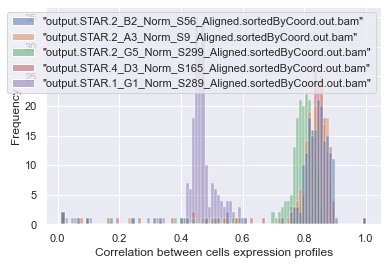

In [63]:
random.seed(1111)
random_vars = [randint(0,191) for i in range(0,5)]
sns.histplot(df_corr_nohypo_cells.iloc[:,random_vars],bins=100)
plt.ylabel('Frequency')
plt.xlabel('Correlation between cells expression profiles')


In no hypoxia condition, we chose 4 random cells that have high correlations with other cells, and one cell (in purple) that has lower correlation with other no hypoxia cells 

Text(0.5, 0, 'Correlation between cells expression profiles')

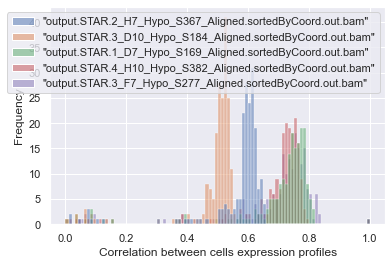

In [64]:
random_vars = [randint(0,191) for i in range(0,5)]
sns.histplot(df_corr_hypo_cells.iloc[:,random_vars],bins=100)
plt.ylabel('Frequency')
plt.xlabel('Correlation between cells expression profiles')

In hypoxia condition, we chose 4 random cells that have high correlations with other cells, and one cell (in orange) that has lower correlation with other hypoxia cells 

In [65]:
df_mcf7_allVars_log2.T.shape

(383, 22934)

We also check the correlations between the features (i.e. the expressions of different genes) as requested. 

It take too long to check all the features, therefore we use only 5% of the features for this exercise:

In [66]:
df_mcf7_allVars_log2_noDup.iloc[:,0:20].T

"WASH7P"  "MIR6859-1"  \
"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoo...       0.0          0.0   
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoo...       0.0          0.0   
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoo...       0.0          0.0   
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord...       0.0          0.0   
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord...       0.0          0.0   
"output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord...       0.0          0.0   
"output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord...       0.0          0.0   
"output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord...       0.0          0.0   
"output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord...       0.0          0.0   
"output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoor...       0.0          0.0   
"output.STAR.1_A8_Hypo_S26_Aligned.sortedByCoor...       0.0          0.0   
"output.STAR.1_A9_Hypo_S27_Aligned.sortedByCoor...       0.0          0.0   
"output.STAR.1_B10_Hypo_S76_Aligned.sortedByCoo...       0.0          0.0   
"output.STAR.1_B11_Hypo_S77_Aligned.sortedByCoo...       0.0          0.0   
"output.STAR.1_B12_Hypo_S78_Aligned.sortedByCoo...       0.0          0.0   
"output.STAR.1_B1_Norm_S49_Aligned.sortedByCoor...       0.0          0.0   
"output.STAR.1_B2_Norm_S50_Aligned.sortedByCoor...       0.0          0.0   
"output.STAR.1_B3_Norm_S51_Aligned.sortedByCoor...       0.0          0.0   
"output.STAR.1_B4_Norm_S52_Aligned.sortedByCoor...       0.0          0.0   
"output.STAR.1_B5_Norm_S53_Aligned.sortedByCoor...       0.0          0.0   

                                                    "WASH9P"  "OR4F29"  \
"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoo...  1.000000       0.0   
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoo...  0.000000       0.0   
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoo...  0.000000       0.0   
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord...  0.000000       0.0   
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord...  0.000000       0.0   
"output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord...  1.000000       0.0   
"output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord...  3.459432       0.0   
"output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord...  1.000000       0.0   
"output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord...  0.000000       0.0   
"output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoor...  0.000000       0.0   
"output.STAR.1_A8_Hypo_S26_Aligned.sortedByCoor...  0.000000       0.0   
"output.STAR.1_A9_Hypo_S27_Aligned.sortedByCoor...  0.000000       0.0   
"output.STAR.1_B10_Hypo_S76_Aligned.sortedByCoo...  2.584963       0.0   
"output.STAR.1_B11_Hypo_S77_Aligned.sortedByCoo...  2.321928       0.0   
"output.STAR.1_B12_Hypo_S78_Aligned.sortedByCoo...  1.000000       0.0   
"output.STAR.1_B1_Norm_S49_Aligned.sortedByCoor...  0.000000       0.0   
"output.STAR.1_B2_Norm_S50_Aligned.sortedByCoor...  0.000000       0.0   
"output.STAR.1_B3_Norm_S51_Aligned.sortedByCoor...  0.000000       0.0   
"output.STAR.1_B4_Norm_S52_Aligned.sortedByCoor...  0.000000       0.0   
"output.STAR.1_B5_Norm_S53_Aligned.sortedByCoor...  2.807355       0.0   

                                                    "MTND1P23"  "MTND2P28"  \
"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoo...         0.0    1.584963   
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoo...         0.0    0.000000   
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoo...         0.0    1.000000   
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord...         0.0    0.000000   
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord...         0.0    0.000000   
"output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord...         0.0    1.000000   
"output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord...         0.0    2.000000   
"output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord...         0.0    2.807355   
"output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord...         0.0    4.087463   
"output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoor...         0.0    0.000000   
"output.STAR.1_A8_Hyp

<AxesSubplot:>

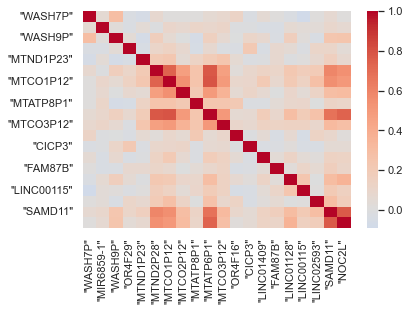

In [67]:
corr_features_mcf7 = df_mcf7_allVars_log2_noDup.iloc[0:20].T.corr()
sns.heatmap(corr_features_mcf7,cmap='coolwarm', center=0)

Just looking at the first 20 features, we notice on the correlation matrix red areas that indicate high positive correlations. We also notice some negative correlations (but not that high).

Features with high correlations can be problematic for some machine learning algorithms. This problem is known as multicollinearity. In order to solve it, among a highly correlated pair of features, one should not be used in the model. 

---------------------- Memory Cleaning Start --------------------------------

In [68]:
alldfs = [var for var in dir() if isinstance(eval(var), pd.core.frame.DataFrame)]

print(alldfs) # df1, df2

['_10', '_18', '_3', '_30', '_37', '_39', '_46', '_47', '_49', '_53', '_54', '_57', '_59', '_60', '_66', '_7', '__', 'c', 'c_dupl', 'corr_features_mcf7', 'df_corr_hypo_cells', 'df_corr_nohypo_cells', 'df_highCorr_info', 'df_info_sparsity_th50', 'df_info_sparsity_th50_feature', 'df_info_sparsity_th95', 'df_info_sparsity_th95_feature', 'df_lowCorr_info', 'df_mcf7_50vars_log2', 'df_mcf7_allVars_log2', 'df_mcf7_allVars_log2_noDup', 'df_mcf7_allVars_log2_norm', 'df_mcf7_allVars_log2_small', 'duplicate_rows_df_mcf7_allVars_log2', 'duplicate_rows_df_mcf7_allVars_log2_t', 'mcf7_smarts_filtered', 'mcf7_smarts_filtered_normalized', 'mcf7_smarts_metadata', 'mcf7_smarts_unfiltered', 'mcf7_smarts_unfiltered_noOut']


In [69]:
for elem in alldfs:
    exec('del ' + elem)

In [70]:
import gc
gc.collect()

108

In [71]:
#mcf7_smarts_unfiltered # control if deleted 

---------------------- Memory Cleaning End --------------------------------

### EAD2: HCC1806 SmartSeq experiment 

#### HCC1806 -- Meta Data

In [72]:
HCC1806_smarts_metadata = pd.read_csv("SmartSeq/HCC1806_SmartS_MetaData.tsv",delimiter="\t",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(HCC1806_smarts_metadata))
print("First column: ", HCC1806_smarts_metadata.iloc[ : , 0])

Dataframe dimensions: (243, 8)
First column:  Filename
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam    HCC1806
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam     HCC1806
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam       HCC1806
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam      HCC1806
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam        HCC1806
                                                                         ...   
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam    HCC1806
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam    HCC1806
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam      HCC1806
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam     HCC1806
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam     HCC1806
Name: Cell Line, Length: 243, dtype: object


In [73]:
HCC1806_smarts_metadata

Cell Line  PCR Plate  Pos  \
Filename                                                                       
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....   HCC1806          1  A10   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...   HCC1806          1  A12   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...   HCC1806          1   A1   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...   HCC1806          1   A2   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...   HCC1806          1   A3   
...                                                      ...        ...  ...   
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned....   HCC1806          4  H10   
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned....   HCC1806          4  H11   
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.so...   HCC1806          4   H2   
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.s...   HCC1806          4   H7   
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.s...   HCC1806          4   H9   

                                                   Condition  Hours Cell name  \
Filename                                                                        
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....     Normo     24      S123   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...     Normo     24       S26   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...      Hypo     24       S97   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...      Hypo     24      S104   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...      Hypo     24        S4   
...                                                      ...    ...       ...   
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned....     Normo     24      S210   
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned....     Normo     24      S214   
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.so...      Hypo     24      S199   
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.s...     Normo     24      S205   
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.s...     Normo     24      S236   

                                                                 PreprocessingTag  \
Filename                                                                            
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...  Aligned.sortedByCoord.out.bam   
...                                                                           ...   
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned....  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned....  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.so...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.s...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.s...  Aligned.sortedByCoord.out.bam   

                                                    ProcessingComments  
Filename                                                                
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....  STAR,FeatureCounts  
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...  STAR,FeatureCounts  
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...  STAR,FeatureCounts  
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...  STAR,FeatureCounts  
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...  STAR,FeatureCounts  
...                                                                ...  
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned....  STAR,FeatureCounts  
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned....  STAR,FeatureCounts  
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.so...  STAR,FeatureCounts  
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.s

In [74]:
HCC1806_smarts_metadata.shape

(243, 8)

In [75]:
HCC1806_smarts_metadata['Cell name'].nunique()

243

We are now proceding with the second data set. It can be seen that, the structure of the data is exactly the same. As stated for the previous mcf7_smarts_metadata, the indices of the the indices of the data frame HCC1806_smarts_metadata denote the filenames that represent polyeptid chains defining each cell studied. 
Again, like the mcf7_smarts_metadata, our present dataframe contains 8 columns:
- Cell line: The cell line, that is HCC1806 in this study.
- Lane: It is the PCR plate of the analysis.
- Pos: The position of the cell in the cell line.
- Condition: This is the target variale that we want to predict. It assumes two values: hypo and norm. Hypo denotes the condition Hypoxia which means that the cells responds to low oxygen conditions. It is important to predict which cells could be of type Hypoxia because it is an indicator of cancer cells with aggressive phenotype. 
- Hours: ?
- Cell name: It is the unique name that identified the cell
- PreprocessingTag: The tag related to preprocessing executed
- ProcessingComments: The comments about preprocessing executed

We can see that each filename is created by combining the information contained in some of the columns. For example, the fist row has the filename output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam which stands for the analysis of the cell S123 in the position A10 that is preprocessed by alining and storing by the coordinates and the oxygen level of the cell Normoxia.

#### HCC1806 -- Unfiltered Data

In [76]:
HCC1806_smarts_unfiltered = pd.read_csv("SmartSeq/HCC1806_SmartS_Unfiltered_Data.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(HCC1806_smarts_unfiltered))
print("First column: ", HCC1806_smarts_unfiltered.iloc[ : , 0])

Dataframe dimensions: (23396, 243)
First column:  "WASH7P"         0
"CICP27"         0
"DDX11L17"       0
"WASH9P"         0
"OR4F29"         2
              ... 
"MT-TE"         22
"MT-CYB"      4208
"MT-TT"         26
"MT-TP"         66
"MAFIP"          0
Name: "output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam", Length: 23396, dtype: int64


In [77]:
HCC1806_smarts_unfiltered

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                        
"CICP27"                                                    0                        
"DDX11L17"                                                  0                        
"WASH9P"                                                    0                        
"OR4F29"                                                    2                        
...                                                       ...                        
"MT-TE"                                                    22                        
"MT-CYB"                                                 4208                        
"MT-TT"                                                    26                        
"MT-TP"                                                    66                        
"MAFIP"                                                     0                        

            "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                       
"CICP27"                                                    0                       
"DDX11L17"                                                  0                       
"WASH9P"                                                    0                       
"OR4F29"                                                    0                       
...                                                       ...                       
"MT-TE"                                                    43                       
"MT-CYB"                                                 6491                       
"MT-TT"                                                    62                       
"MT-TP"                                                    71                       
"MAFIP"                                                     4                       

            "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                     
"CICP27"                                                    0                     
"DDX11L17"                                                  0                     
"WASH9P"                                                    0                     
"OR4F29"                                                    0                     
...                                                       ...                     
"MT-TE"                                                     0                     
"MT-CYB"                                                   25                     
"MT-TT"                                                     0                     
"MT-TP"                                                     1                     
"MAFIP"                                                     0                     

            "output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                      
"CICP27"                                                    0                      
"DDX11L17"                                                  0                      
"WASH9P"                                                    0                      
"OR4F29"                                                    0                      
...                                                       ...                      
"MT-TE"                                                     0                      
"MT-CYB"                                                 4819                      
"MT-TT"                                                    11                      
"MT-TP"                                                     3                      
"MAFIP"                              

Each column of the dataframe HCC1806_smarts_unfiltered (243 columns) corresponds to the row of the dataframe HCC1806_smarts_meta (243 rows). Thus, in our dataset we know the quantity of the expressed genes in each file (i.e. the aligned polyeptid sequences).

The indices of this unfiltered dataframe represent a gene name (WASH7P, MT-TT, etc.) that is a special ID known as gene symbols. These gene symbols are only acroynms, that might not be unique. Below we verify that the dataset contains only unique gene acronyms:

In [78]:
HCC1806_smarts_unfiltered.reset_index()['index'].nunique() == HCC1806_smarts_unfiltered.shape[0]

True

The unfiltered dataframe contains only numeric information: 

In [79]:
set(list(HCC1806_smarts_unfiltered.dtypes))

{dtype('int64')}

Do we have any missing data? We can look at the null values row by row, but since we have 243 rows, we look at the total sum of the missing values in each row:

In [80]:
HCC1806_smarts_unfiltered.isnull().sum().sum()

0

There are no missing values in our dataframe, therefore there is no need for imputation.

We can look at the descriptive statistics of our dataframe:

In [81]:
HCC1806_smarts_unfiltered.describe(percentiles=[.05, .25, .5, .75, .95])

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                        
mean                                           99.565695                        
std                                           529.532443                        
min                                             0.000000                        
5%                                              0.000000                        
25%                                             0.000000                        
50%                                             0.000000                        
75%                                            51.000000                        
95%                                           425.000000                        
max                                         35477.000000                        

       "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                       
mean                                          207.678278                       
std                                           981.107905                       
min                                             0.000000                       
5%                                              0.000000                       
25%                                             0.000000                       
50%                                             0.000000                       
75%                                           125.000000                       
95%                                           917.000000                       
max                                         69068.000000                       

       "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                     
mean                                            9.694734                     
std                                            65.546050                     
min                                             0.000000                     
5%                                              0.000000                     
25%                                             0.000000                     
50%                                             0.000000                     
75%                                             5.000000                     
95%                                            39.000000                     
max                                          6351.000000                     

       "output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                      
mean                                          150.689007                      
std                                           976.936548                      
min                                             0.000000                      
5%                                              0.000000                      
25%                                             0.000000                      
50%                                             0.000000                      
75%                                            40.000000                      
95%                                           700.250000                      
max                                         70206.000000                      

       "output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                    
mean                                           35.700504                    
std                                           205.885369                    
min                                             0.000000                    
5%                                              0.000000                    
25%                                        

Just by giving a quick look at the distributions of the features, we see that many variables are highly rigt skewed as they are filled with 0 values. The features are not normalized, they do not have unit variance and zero mean, std deviation is higly large compared to the mean. Their distributions have an elongated right tail. 


Let's choose 10 random variables, to visualize their not-normal distributions:

In [82]:
HCC1806_smarts_unfiltered.shape[1]

243

[47, 23, 226, 153, 86, 168, 174, 27, 112, 37]


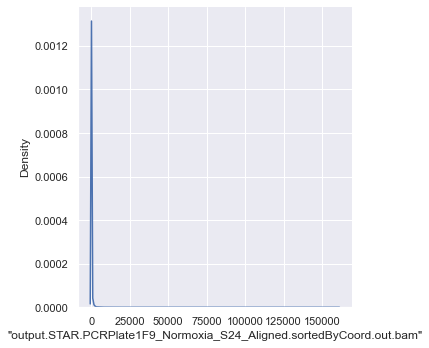

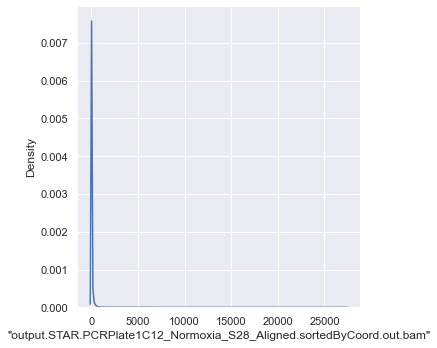

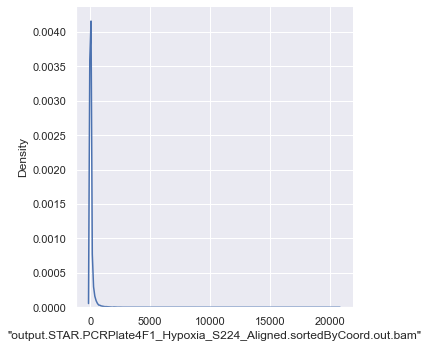

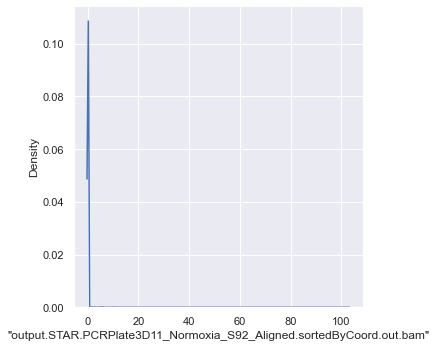

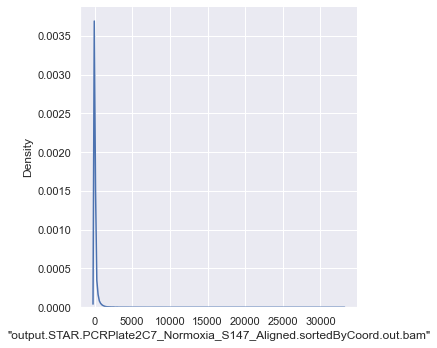

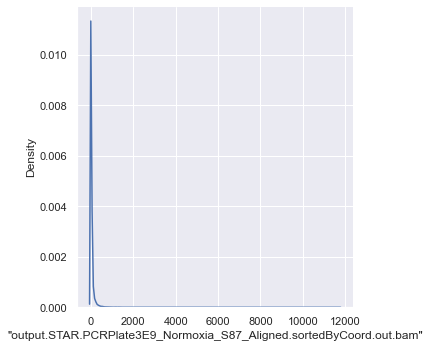

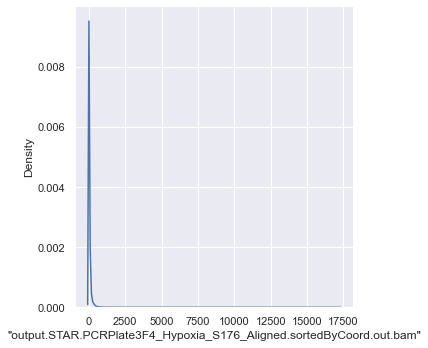

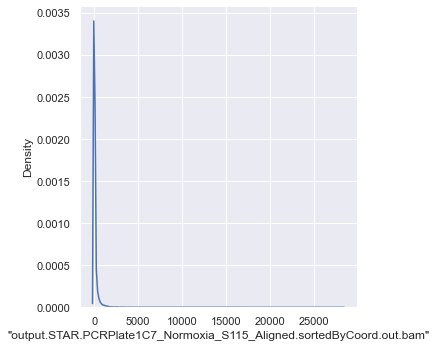

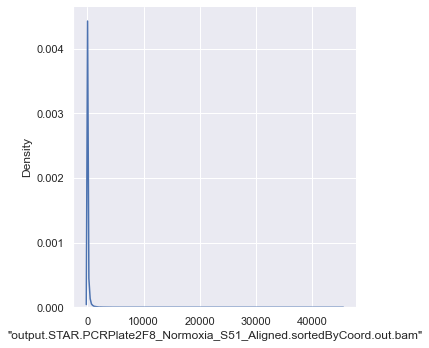

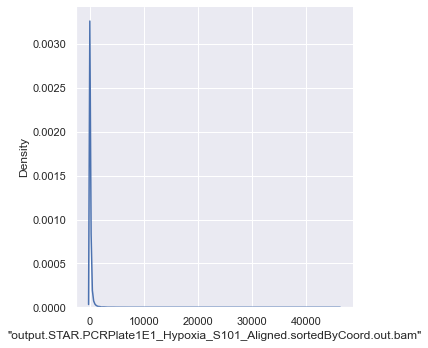

In [83]:
np.random.seed(0)
range_max = HCC1806_smarts_unfiltered.shape[1]-1
random_variable_indices = [randint(0,range_max) for i in range(0,10)]
print(random_variable_indices)

for i in random_variable_indices:
    sns.displot(
        HCC1806_smarts_unfiltered,
        x= HCC1806_smarts_unfiltered.columns.tolist()[i], 
        kind="kde"
    )

We continue exploratory data analysis with investigating outleirs. We choose to use IQR formula to detect the outliers. Anything outside this range, will be dropped:

In [84]:
Q1 = HCC1806_smarts_unfiltered.quantile(0.25)
Q3 = HCC1806_smarts_unfiltered.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"     51.0
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"     125.0
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"         5.0
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"       40.0
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"         22.0
                                                                          ...  
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam"     76.0
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam"     24.0
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam"       68.0
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam"      22.0
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"      44.0
Length: 243, dtype: float64


In [85]:
HCC1806_smarts_unfiltered_noOut = HCC1806_smarts_unfiltered[~((HCC1806_smarts_unfiltered < (Q1 - 1.5 * IQR)) |(HCC1806_smarts_unfiltered > (Q3 + 1.5 * IQR))).any(axis=1)]
print(HCC1806_smarts_unfiltered_noOut.shape)

(10815, 243)


In [86]:
HCC1806_smarts_unfiltered.shape

(23396, 243)

In [87]:
100*(23396-10815)/23396

53.774149427252524

Using interquartile range method to remove the outliers results in taking away 54% of our dataset which is not a desired outcome. As we observed above, many features are filled with 0s.

We can quantify sparisty this way: if X% of the observations of a variable is 0 then it is not a very informative feature. If a dataframe has mostly sparse features then we can say it is a sparse structure.

In [88]:
HCC1806_smarts_unfiltered_info_sparsity_th95 = (
    pd.DataFrame(HCC1806_smarts_unfiltered.apply(lambda x: variable_sparsity(x, 0.95), axis=0))
    .reset_index()
    .rename(columns={'index':'variable', 0:'flag_sparsity'})
)

In [89]:
HCC1806_smarts_unfiltered_info_sparsity_th90 = (
    pd.DataFrame(HCC1806_smarts_unfiltered.apply(lambda x: variable_sparsity(x, 0.90), axis=0))
    .reset_index()
    .rename(columns={'index':'variable', 0:'flag_sparsity'})
)

In [90]:
HCC1806_smarts_unfiltered_info_sparsity_th90

variable  flag_sparsity
0    "output.STAR.PCRPlate1A10_Normoxia_S123_Aligne...              0
1    "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned...              0
2    "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.s...              0
3    "output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned....              0
4    "output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.so...              0
..                                                 ...            ...
238  "output.STAR.PCRPlate4H10_Normoxia_S210_Aligne...              0
239  "output.STAR.PCRPlate4H11_Normoxia_S214_Aligne...              0
240  "output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned....              0
241  "output.STAR.PCRPlate4H7_Normoxia_S205_Aligned...              0
242  "output.STAR.PCRPlate4H9_Normoxia_S236_Aligned...              0

[243 rows x 2 columns]

In [91]:
len(HCC1806_smarts_unfiltered_info_sparsity_th95[HCC1806_smarts_unfiltered_info_sparsity_th95.flag_sparsity ==1])

8

In [92]:
len(HCC1806_smarts_unfiltered_info_sparsity_th90[HCC1806_smarts_unfiltered_info_sparsity_th90.flag_sparsity ==1])

9

We defined two thresolds for sparsity: 95% and 90%. Decreasing the thresold, we find more sparse features. This can be advantageous because it would help the algorithms detect easily the difference between two classes (assuming that one class has 0 values and the positive class perhaps has non-zero values).

As we noted earlier, looking at the descriptive statistics and some density plots, the variables are highly centered around zero. Let's quantify the skewness and kurtosis:

Text(0.5, 0, 'Skewness of single cells expression profiles - original df')

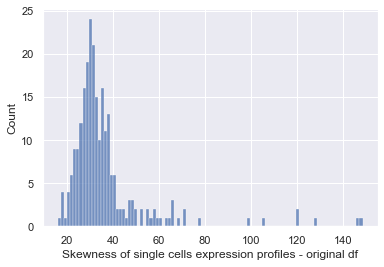

In [93]:
colN2 = HCC1806_smarts_unfiltered.shape[1]
list2_skew_cells = []
for i in range(colN2) :     
     v_df2 = HCC1806_smarts_unfiltered[HCC1806_smarts_unfiltered.columns.tolist()[i]]
     list2_skew_cells += [skew(v_df2)]   
  #  df_skew_cells += [df[cnames[i]].skew()]
list2_skew_cells
sns.histplot(list2_skew_cells,bins=100)
plt.xlabel('Skewness of single cells expression profiles - original df')

In [94]:
list2_skew_cells

[29.060170892188808,
 26.375803364082593,
 50.42219295095526,
 39.962261084335715,
 40.831761136535434,
 63.23072175896631,
 26.321572538057914,
 38.16336782098296,
 71.1522146807669,
 56.09724027024084,
 48.99814039787873,
 18.464775901153637,
 47.15195689494234,
 120.05593935544216,
 33.99427128862153,
 30.088231341030692,
 22.286514610762975,
 32.3921796727025,
 38.75514237474577,
 28.75570474961464,
 31.127814981546333,
 27.7243909375453,
 29.148368072000252,
 57.96588411901668,
 36.200031752886005,
 31.916505070774285,
 28.849458624684896,
 26.591278048758557,
 31.005757883624007,
 23.96877960582696,
 65.75883126384987,
 32.81420818258468,
 37.862153037163516,
 16.33822134075528,
 37.031403931895355,
 24.588248881976064,
 26.540459898858327,
 33.74323287097885,
 24.719083908680908,
 36.34765567523466,
 43.81950268488599,
 22.547359217928758,
 38.00948983833193,
 52.87075001506269,
 28.831690939327846,
 41.27143769895153,
 23.900651442148476,
 69.1193979984549,
 23.274249122692947,

Text(0.5, 0, 'Kurtosis of single cells expression profiles - original df')

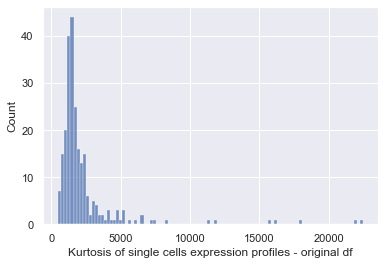

In [95]:
list2_kurt_cells = []
for i in range(colN2) :     
     v_df2 = HCC1806_smarts_unfiltered[HCC1806_smarts_unfiltered.columns.tolist()[i]]
     list2_kurt_cells += [kurtosis(v_df2)]   
 #   df_kurt_cells += [df[mcf7_smarts_unfiltered.columns.tolist()[i]].kurt()]
list2_kurt_cells
sns.histplot(list2_kurt_cells,bins=100)
plt.xlabel('Kurtosis of single cells expression profiles - original df')

As suggested by the histograms, the data is far from normal distribution with many features having high skewness and kurtosis values.

This is not good because when the data is not following a normal distribution, it might violate some assumptions of a machine learning model. Or it might just make it hard for the algorithm to detect the differences among non 0 values.

One way to make the distribution less skewed is to apply a log transformation:

<AxesSubplot:xlabel='"output.STAR.PCRPlate1B9_Normoxia_S21_Aligned.sortedByCoord.out.bam"'>

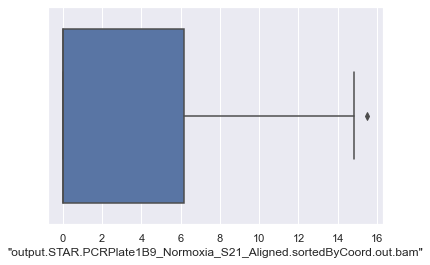

In [96]:
var21_log2_2 = np.log2(HCC1806_smarts_unfiltered[HCC1806_smarts_unfiltered.columns.tolist()[20]]+1)
sns.boxplot(x=var21_log2_2)

The same feature before log transformation is heavily centered around 0:

<AxesSubplot:xlabel='"output.STAR.PCRPlate1B9_Normoxia_S21_Aligned.sortedByCoord.out.bam"'>

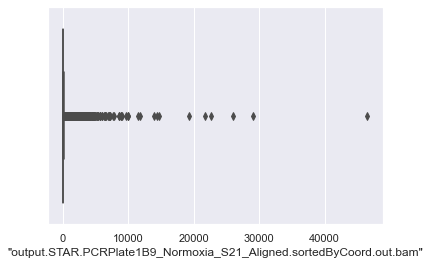

In [97]:
sns.boxplot(x=HCC1806_smarts_unfiltered[HCC1806_smarts_unfiltered.columns.tolist()[20]]+1)

In [98]:
var21_log2_2.describe().round(2)

count    23396.00
mean         2.88
std          3.51
min          0.00
25%          0.00
50%          0.00
75%          6.17
max         15.51
Name: "output.STAR.PCRPlate1B9_Normoxia_S21_Aligned.sortedByCoord.out.bam", dtype: float64

Now lets take only the first 50 columns (for speed), and calculate skewness and kurtosis after applying log transformation to them:

In [99]:
df_HCC1806_50vars_log2 = (HCC1806_smarts_unfiltered.iloc[:,:50]+1).apply(np.log2)
print(df_HCC1806_50vars_log2.shape)

(23396, 50)


In [100]:
df_HCC1806_50vars_log2

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                             0.000000                        
"CICP27"                                             0.000000                        
"DDX11L17"                                           0.000000                        
"WASH9P"                                             0.000000                        
"OR4F29"                                             1.584963                        
...                                                       ...                        
"MT-TE"                                              4.523562                        
"MT-CYB"                                            12.039262                        
"MT-TT"                                              4.754888                        
"MT-TP"                                              6.066089                        
"MAFIP"                                              0.000000                        

            "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                             0.000000                       
"CICP27"                                             0.000000                       
"DDX11L17"                                           0.000000                       
"WASH9P"                                             0.000000                       
"OR4F29"                                             0.000000                       
...                                                       ...                       
"MT-TE"                                              5.459432                       
"MT-CYB"                                            12.664447                       
"MT-TT"                                              5.977280                       
"MT-TP"                                              6.169925                       
"MAFIP"                                              2.321928                       

            "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                              0.00000                     
"CICP27"                                              0.00000                     
"DDX11L17"                                            0.00000                     
"WASH9P"                                              0.00000                     
"OR4F29"                                              0.00000                     
...                                                       ...                     
"MT-TE"                                               0.00000                     
"MT-CYB"                                              4.70044                     
"MT-TT"                                               0.00000                     
"MT-TP"                                               1.00000                     
"MAFIP"                                               0.00000                     

            "output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                             0.000000                      
"CICP27"                                             0.000000                      
"DDX11L17"                                           0.000000                      
"WASH9P"                                             0.000000                      
"OR4F29"                                             0.000000                      
...                                                       ...                      
"MT-TE"                                              0.000000                      
"MT-CYB"                                            12.234817                      
"MT-TT"                                              3.584963                      
"MT-TP"                                              2.000000                      
"MAFIP"                              

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

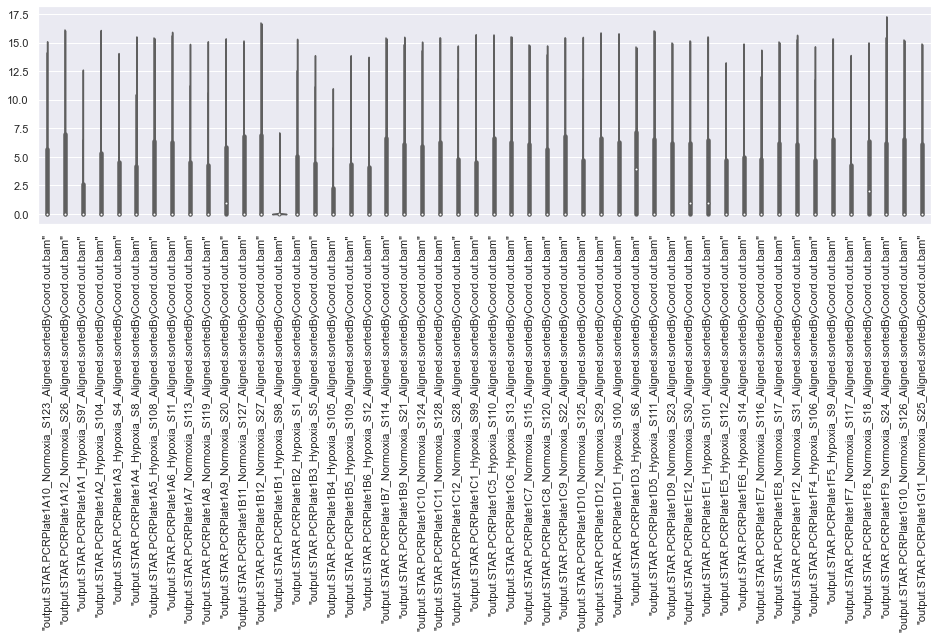

In [101]:
np.shape(df_HCC1806_50vars_log2)
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df_HCC1806_50vars_log2,palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)

Text(0.5, 0, 'Skewness of single cells expression profiles - log2 df')

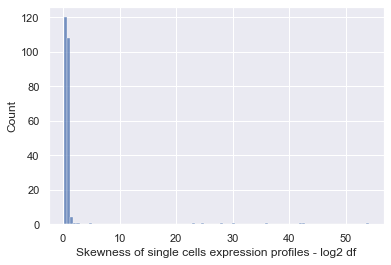

In [102]:
df_HCC1806_allVars_log2 = (HCC1806_smarts_unfiltered.iloc[:,:]+1).apply(np.log2) # log transformation of all variables

df1_log2_2_skew_cells = []
for i in range(df_HCC1806_allVars_log2.shape[1]):
    v_df = df_HCC1806_allVars_log2[df_HCC1806_allVars_log2.columns.tolist()[i]]
    df1_log2_2_skew_cells += [skew(v_df)]   
df1_log2_2_skew_cells
sns.histplot(df1_log2_2_skew_cells,bins=100)
plt.xlabel('Skewness of single cells expression profiles - log2 df')

Now most of the variables have skewness score around 0 as we expected after applying the log transformation

Text(0.5, 0, 'Kurtosis of single cells expression profiles - log2 df')

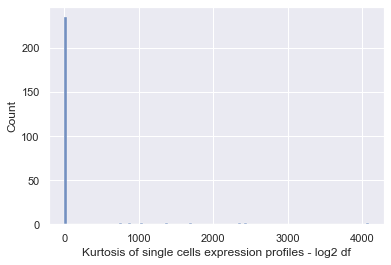

In [103]:
df1_log2_2_kurt_cells = []
for i in range(df_HCC1806_allVars_log2.shape[1]) :     
     v_df = df_HCC1806_allVars_log2[df_HCC1806_allVars_log2.columns.tolist()[i]]
     df1_log2_2_kurt_cells += [kurtosis(v_df)] 
df1_log2_2_kurt_cells
sns.histplot(df1_log2_2_kurt_cells,bins=100)
plt.xlabel('Kurtosis of single cells expression profiles - log2 df')

In [104]:
len(df1_log2_2_kurt_cells)

243

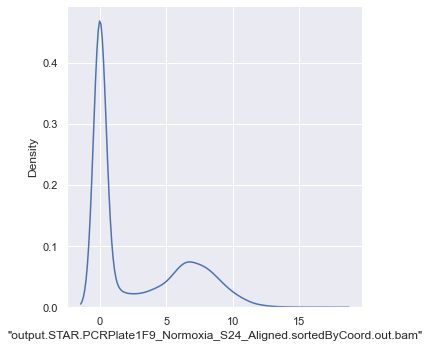

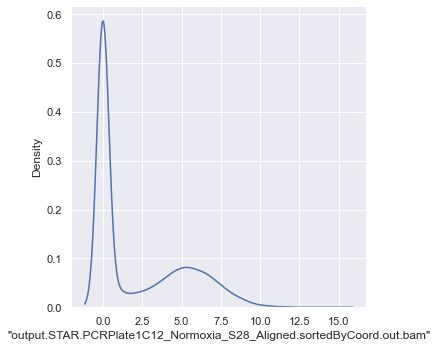

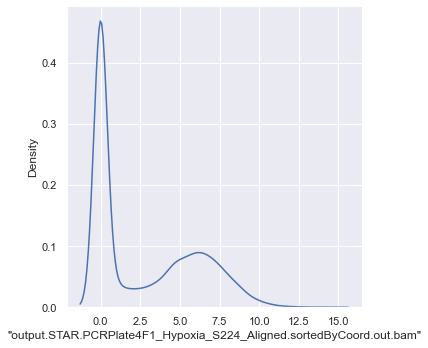

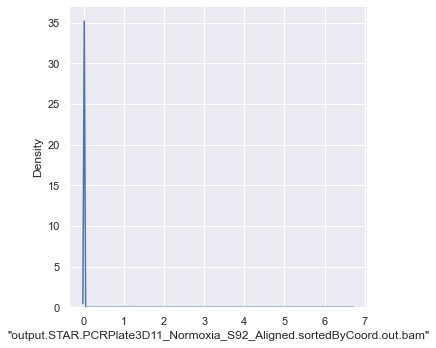

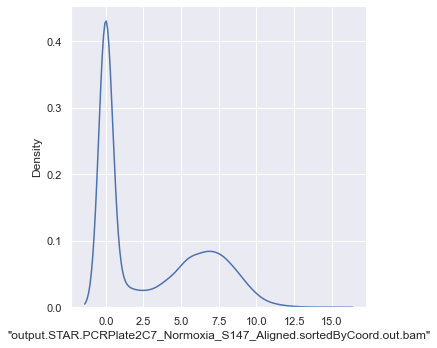

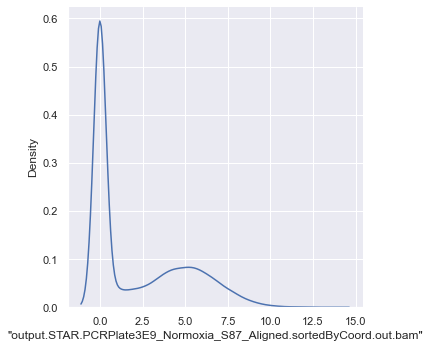

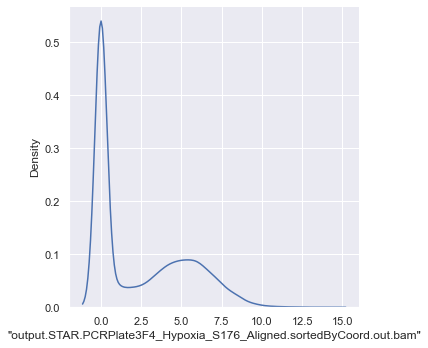

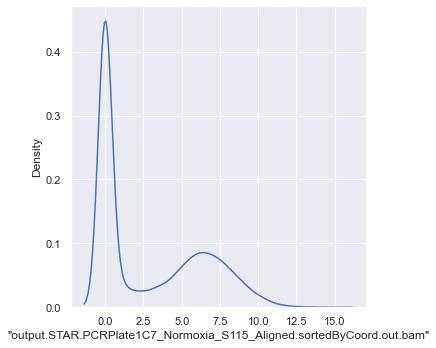

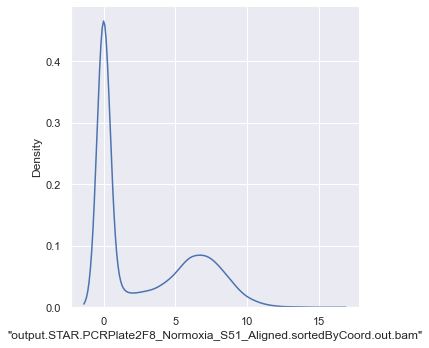

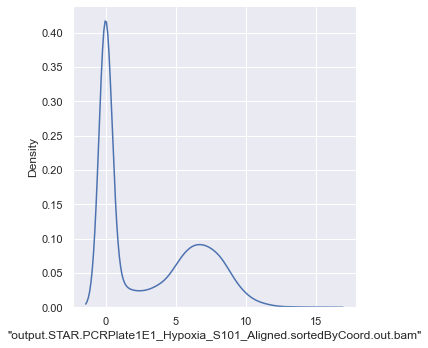

In [105]:
for i in random_variable_indices:
    sns.displot(
        df_HCC1806_allVars_log2,
        x= df_HCC1806_allVars_log2.columns.tolist()[i], 
        kind="kde"
    )

If we compare the density plots with the ones above before the transformation, we see them changed, the distributions become more bimodal.

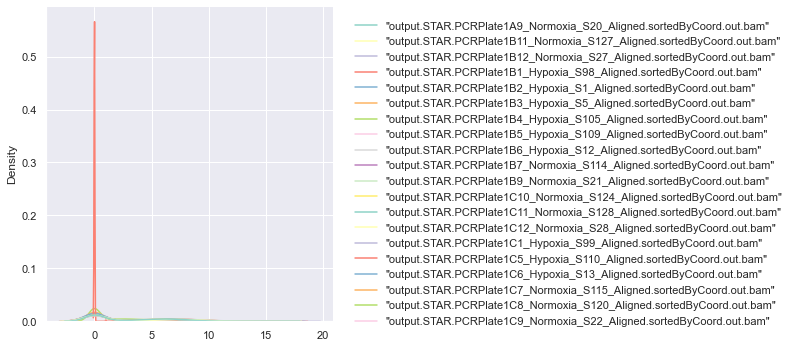

In [106]:
df_HCC1806_allVars_log2_small = df_HCC1806_allVars_log2.iloc[:, 10:30]  #just selecting part of the samples so run time not too long
sns.displot(data=df_HCC1806_allVars_log2_small,palette="Set3",kind="kde", bw_adjust=2)

In [107]:
df_HCC1806_allVars_log2_small.describe()

"output.STAR.PCRPlate1A9_Normoxia_S20_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                      
mean                                            2.843058                      
std                                             3.254221                      
min                                             0.000000                      
25%                                             0.000000                      
50%                                             1.000000                      
75%                                             5.857981                      
max                                            15.368745                      

       "output.STAR.PCRPlate1B11_Normoxia_S127_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                        
mean                                            3.048954                        
std                                             3.758881                        
min                                             0.000000                        
25%                                             0.000000                        
50%                                             0.000000                        
75%                                             6.794416                        
max                                            15.108851                        

       "output.STAR.PCRPlate1B12_Normoxia_S27_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                       
mean                                            3.252325                       
std                                             3.831877                       
min                                             0.000000                       
25%                                             0.000000                       
50%                                             0.000000                       
75%                                             6.918863                       
max                                            16.678545                       

       "output.STAR.PCRPlate1B1_Hypoxia_S98_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                     
mean                                            0.007102                     
std                                             0.124829                     
min                                             0.000000                     
25%                                             0.000000                     
50%                                             0.000000                     
75%                                             0.000000                     
max                                             7.139551                     

       "output.STAR.PCRPlate1B2_Hypoxia_S1_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                    
mean                                            2.159249                    
std                                             3.295504                    
min                                             0.000000                    
25%                                             0.000000                    
50%                                             0.000000                    
75%                                             5.044394                    
max                                            15.326991                    

       "output.STAR.PCRPlate1B3_Hypoxia_S5_Aligned.sortedByCoord.out.bam"  \
count                                       23396.000000                    
mean                                            1.943660                    
std                                             2.852602                    
min                                             0.000000                    
25%                                             0.000000      

In [108]:
from sklearn.preprocessing import Normalizer 
transformer = Normalizer().fit(df_HCC1806_allVars_log2)
df_HCC1806_allVars_log2_norm = pd.DataFrame(
    transformer.transform(df_HCC1806_allVars_log2), 
    columns=df_HCC1806_allVars_log2.columns
)

In [109]:
df_HCC1806_allVars_log2_norm.describe().round(2)

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
count                                           23396.00                        
mean                                                0.04                        
std                                                 0.05                        
min                                                 0.00                        
25%                                                 0.00                        
50%                                                 0.00                        
75%                                                 0.07                        
max                                                 0.93                        

       "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"  \
count                                           23396.00                       
mean                                                0.05                       
std                                                 0.06                       
min                                                 0.00                       
25%                                                 0.00                       
50%                                                 0.00                       
75%                                                 0.08                       
max                                                 0.93                       

       "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"  \
count                                           23396.00                     
mean                                                0.02                     
std                                                 0.03                     
min                                                 0.00                     
25%                                                 0.00                     
50%                                                 0.00                     
75%                                                 0.03                     
max                                                 0.71                     

       "output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"  \
count                                           23396.00                      
mean                                                0.03                      
std                                                 0.06                      
min                                                 0.00                      
25%                                                 0.00                      
50%                                                 0.00                      
75%                                                 0.07                      
max                                                 0.96                      

       "output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"  \
count                                           23396.00                    
mean                                                0.03                    
std                                                 0.04                    
min                                                 0.00                    
25%                                                 0.00                    
50%                                                 0.00                    
75%                                                 0.06                    
max                                                 0.98                    

       "output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam"  \
count                                           23396.00                    
mean                                                0.03                    
std                                                 0.05                    
min                                                 0.00                    
25%                                                 0.00      

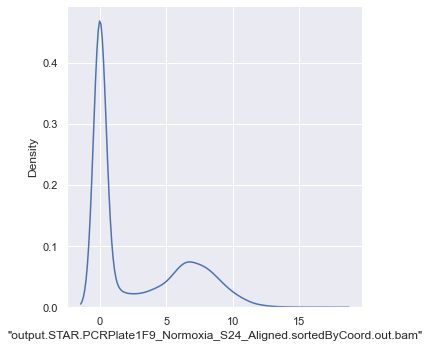

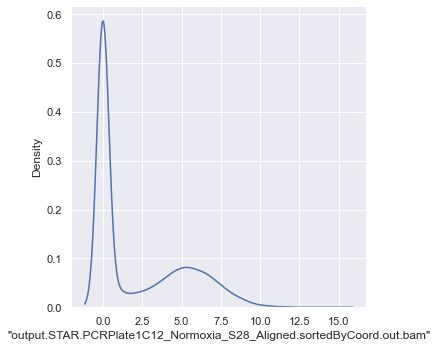

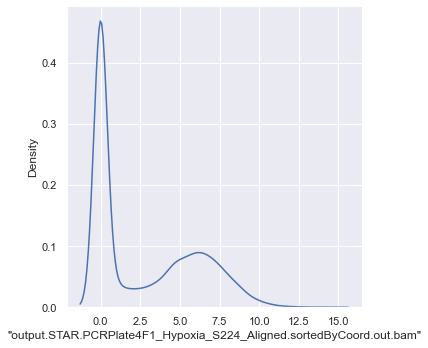

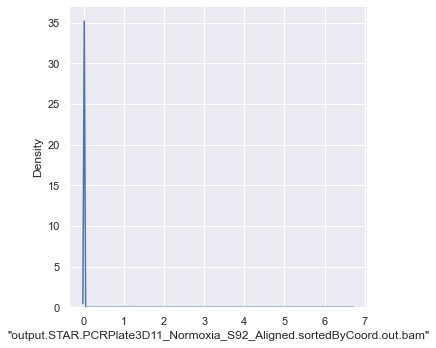

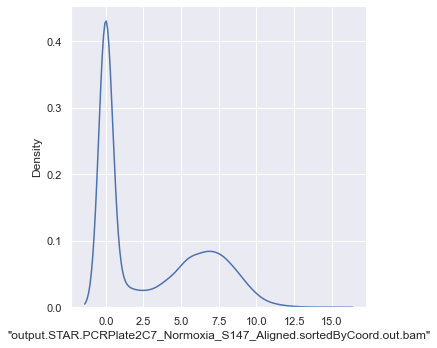

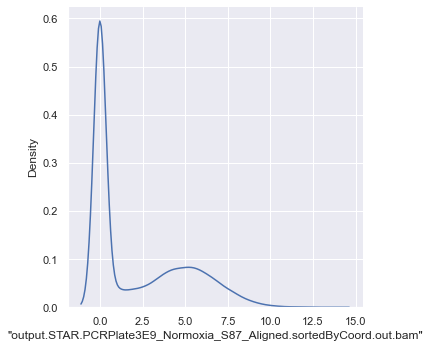

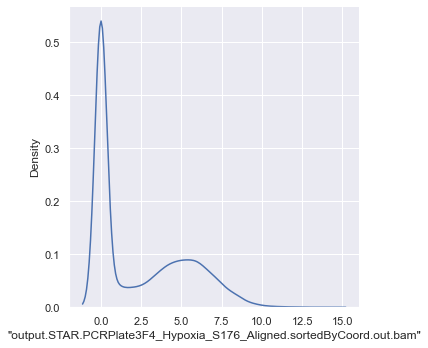

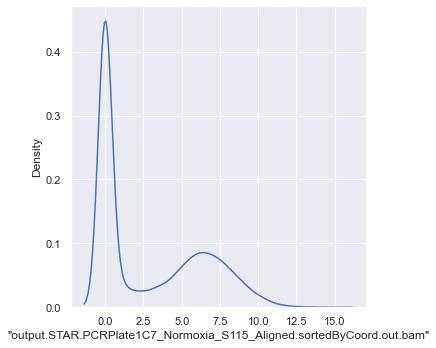

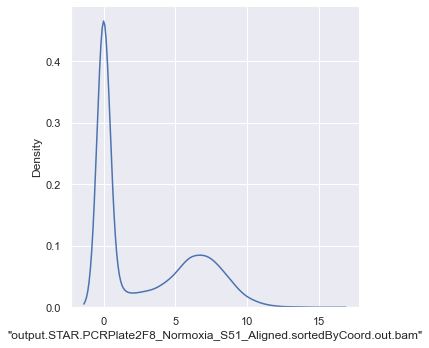

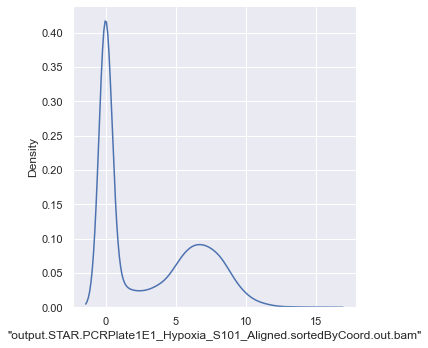

In [110]:
for i in random_variable_indices:
    sns.displot(
        df_HCC1806_allVars_log2,
        x= df_HCC1806_allVars_log2_norm.columns.tolist()[i], 
        kind="kde"
    )

I am loading the filtered and filtered+normalized datasets to make a comparison as requested:

In [111]:
HCC1806_smarts_filtered = pd.read_csv("SmartSeq/HCC1806_SmartS_Filtered_Data.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(HCC1806_smarts_filtered))
print("First column: ", HCC1806_smarts_filtered.iloc[ : , 0])

HCC1806_smarts_filtered_normalized = pd.read_csv("SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(HCC1806_smarts_filtered_normalized))
print("First column: ", HCC1806_smarts_filtered_normalized.iloc[ : , 0])

Dataframe dimensions: (19503, 227)
First column:  "CICP27"         0
"DDX11L17"       0
"WASH9P"         0
"OR4F29"         2
"MTND1P23"     250
              ... 
"MT-TE"         22
"MT-CYB"      4208
"MT-TT"         26
"MT-TP"         66
"MAFIP"          0
Name: "output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam", Length: 19503, dtype: int64
Dataframe dimensions: (3000, 182)
First column:  "DDIT4"          0
"ANGPTL4"       48
"CALML5"         0
"KRT14"        321
"CCNB1"        298
              ... 
"LINC02693"     29
"OR8B9P"         0
"NEAT1"         29
"ZDHHC23"        0
"ODAD2"          0
Name: "output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam", Length: 3000, dtype: int64


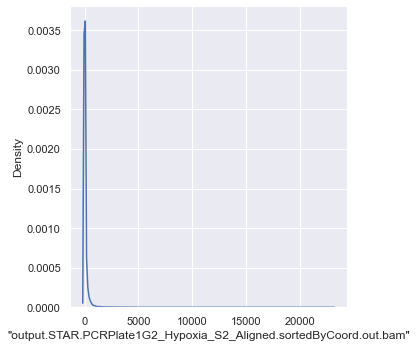

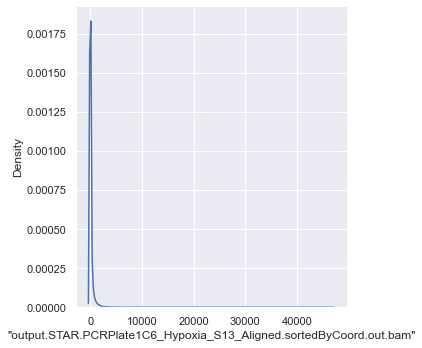

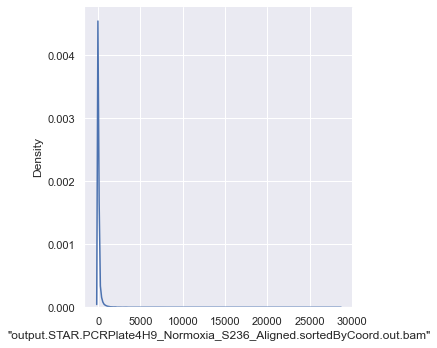

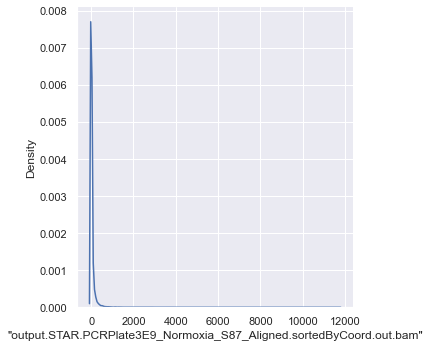

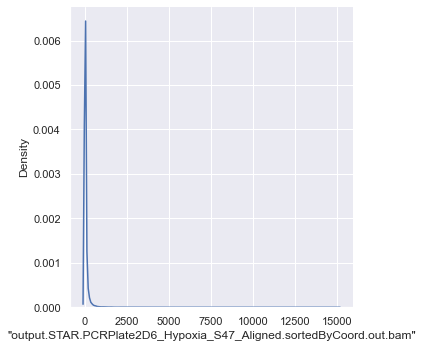

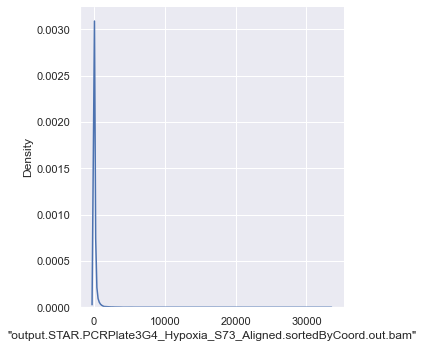

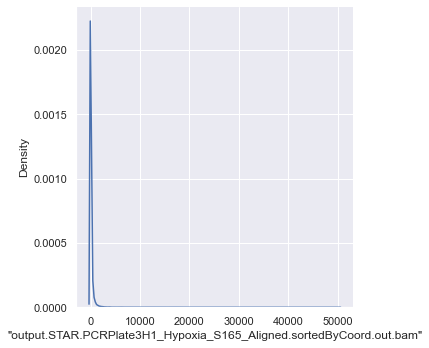

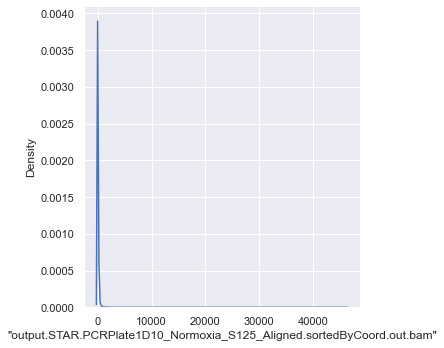

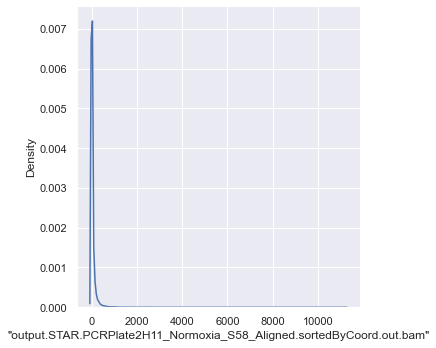

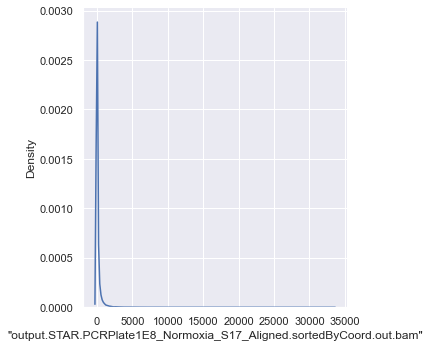

In [112]:
for i in random_variable_indices:
    if i<HCC1806_smarts_filtered.shape[1]:
        sns.displot(
            HCC1806_smarts_filtered ,
            x= HCC1806_smarts_filtered.columns.tolist()[i], 
            kind="kde"
        )

The variables in the filtered dataset seem very much like the ones in the unfiltered dataset before log normalization.

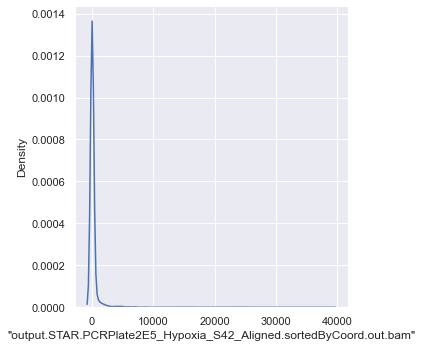

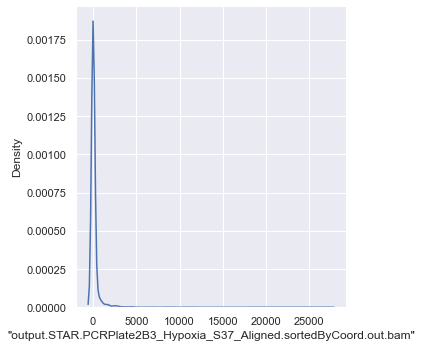

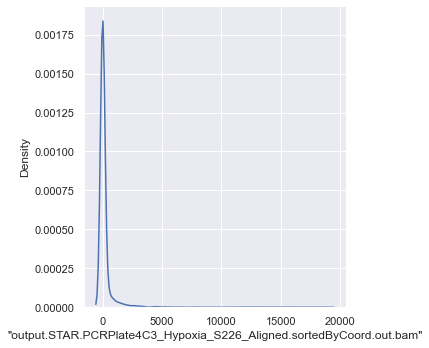

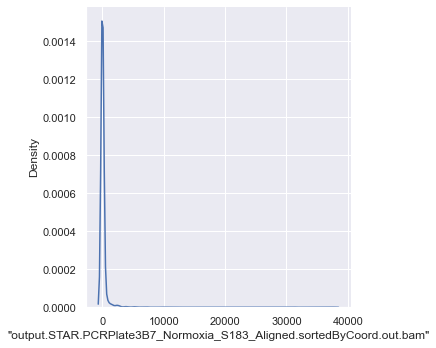

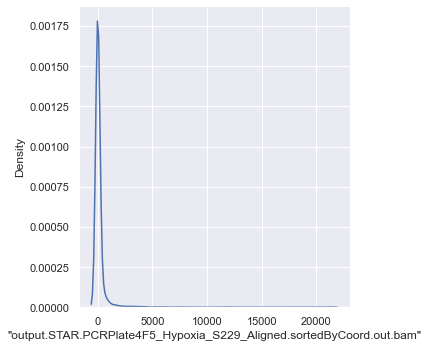

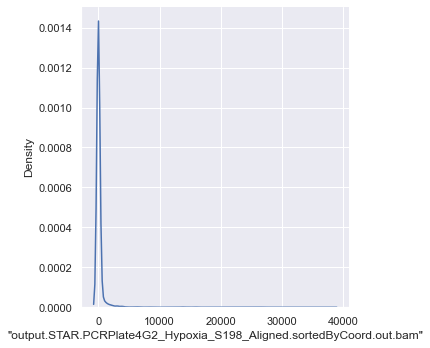

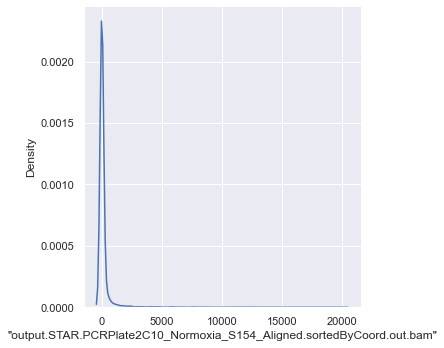

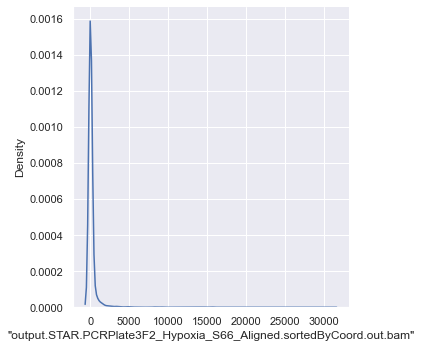

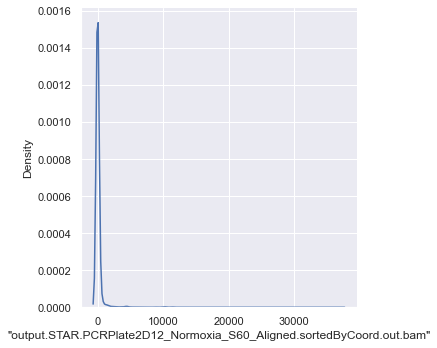

In [113]:
for i in random_variable_indices:
    if i<HCC1806_smarts_filtered_normalized.shape[1]:
        sns.displot(
            HCC1806_smarts_filtered_normalized,
            x= HCC1806_smarts_filtered_normalized.columns.tolist()[i], 
            kind="kde"
        )

Text(0.5, 0, 'Skewness of single cells expression profiles - original df')

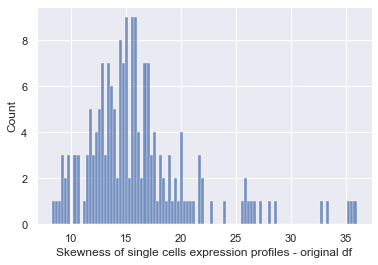

In [114]:
colN2_filtered_normalized = HCC1806_smarts_filtered_normalized.shape[1]
colN2_filtered_normalized
list2_skew_cells_filtered_normalized = []
for i in range(colN2_filtered_normalized) :     
     v_df = HCC1806_smarts_filtered_normalized[HCC1806_smarts_filtered_normalized.columns.tolist()[i]]
     list2_skew_cells_filtered_normalized += [skew(v_df)]   
  #  df_skew_cells += [df[cnames[i]].skew()]
list2_skew_cells_filtered_normalized
sns.histplot(list2_skew_cells_filtered_normalized,bins=100)
plt.xlabel('Skewness of single cells expression profiles - original df')

Text(0.5, 0, 'Skewness of single cells expression profiles - original df')

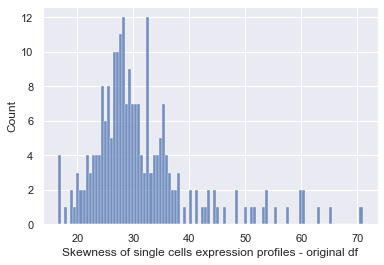

In [115]:
colN2_filtered = HCC1806_smarts_filtered.shape[1]
colN2_filtered
list2_skew_cells_filtered = []
for i in range(colN2_filtered) :     
     v_df = HCC1806_smarts_filtered[HCC1806_smarts_filtered.columns.tolist()[i]]
     list2_skew_cells_filtered += [skew(v_df)]   
  #  df_skew_cells += [df[cnames[i]].skew()]
list2_skew_cells_filtered
sns.histplot(list2_skew_cells_filtered,bins=100)
plt.xlabel('Skewness of single cells expression profiles - original df')

In [116]:
HCC1806_smarts_filtered[['"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam"']].describe().round(2)

"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam"
count                                           19503.00                    
mean                                              162.00                    
std                                               839.37                    
min                                                 0.00                    
25%                                                 0.00                    
50%                                                 6.00                    
75%                                               114.00                    
max                                             58205.00

In [117]:
set(HCC1806_smarts_filtered_normalized.columns.tolist()).intersection(set(HCC1806_smarts_filtered.columns.tolist()))

{'"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.PCRPlate1G7_Normoxia_S118_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.PCRPlate1G8_Normoxia_S19_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.PCRPlate1G9_Normoxia_S121_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.PCRPlate1H1_Hypoxia_S103_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.PCRPlate1H2_Hypoxia_S3_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.PCRPlate1H5_Hypoxia_S10_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.PCRPlate1H6_Hypoxia_S16_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.PCRPlate1H9_Normoxia_S122_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.PCRPlate2A10_Normoxia_S153_Aligned.sorte

In [118]:
HCC1806_smarts_filtered_normalized[['"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam"']].describe().round(2)

"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam"
count                                            3000.00                    
mean                                              149.35                    
std                                              1052.55                    
min                                                 0.00                    
25%                                                 0.00                    
50%                                                 0.00                    
75%                                                 5.25                    
max                                             39148.00

As suggested, we move on with checking for duplicate rows.

In [119]:
duplicate_rows_df_HCC1806_allVars_log2 = df_HCC1806_allVars_log2[df_HCC1806_allVars_log2.duplicated(keep=False)]
print("number of duplicate rows: ", duplicate_rows_df_HCC1806_allVars_log2.shape)
print("number of duplicate rows: ", duplicate_rows_df_HCC1806_allVars_log2)

number of duplicate rows:  (89, 243)
number of duplicate rows:               "output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
"MMP23A"                                                   0.0                        
"LINC01647"                                                0.0                        
"LINC01361"                                                0.0                        
"ITGA10"                                                   0.0                        
"RORC"                                                     0.0                        
...                                                        ...                        
"ENPP7"                                                    0.0                        
"DTNA"                                                     0.0                        
"ALPK2"                                                    0.0                        
"OR7G2"                                                    0.0    

To understand which genes convey the same information, we can check their correlations.

In [120]:
#print("names of duplicate rows: ",duplicate_rows_df.index)
duplicate_rows_df_HCC1806_allVars_log2_t = duplicate_rows_df_HCC1806_allVars_log2.T
duplicate_rows_df_HCC1806_allVars_log2_t
c_dupl = duplicate_rows_df_HCC1806_allVars_log2_t.corr()
c_dupl

"MMP23A"  "LINC01647"  "LINC01361"  "ITGA10"    "RORC"   "GPA33"  \
"MMP23A"     1.000000    -0.008299    -0.008299 -0.008299 -0.008299 -0.008299   
"LINC01647" -0.008299     1.000000     0.495851  0.495851 -0.008299  0.495851   
"LINC01361" -0.008299     0.495851     1.000000  1.000000  0.495851  1.000000   
"ITGA10"    -0.008299     0.495851     1.000000  1.000000  0.495851  1.000000   
"RORC"      -0.008299    -0.008299     0.495851  0.495851  1.000000  0.495851   
...               ...          ...          ...       ...       ...       ...   
"ENPP7"     -0.008299     0.495851     0.495851  0.495851 -0.008299  0.495851   
"DTNA"      -0.008299     0.495851     1.000000  1.000000  0.495851  1.000000   
"ALPK2"     -0.007355     0.886297     0.206954  0.206954 -0.007355  0.206954   
"OR7G2"     -0.008299     0.495851     0.495851  0.495851 -0.008299  0.495851   
"PLVAP"     -0.008299     0.495851     1.000000  1.000000  0.495851  1.000000   

              "OR2M4"  "LINC01247"  "SNORD92"  "LINC01106"  ...  "MSX2P1"  \
"MMP23A"    -0.008299    -0.008299  -0.008299    -0.011157  ... -0.008299   
"LINC01647" -0.008299     0.495851  -0.008299     0.306913  ... -0.008299   
"LINC01361"  0.495851     0.495851  -0.008299    -0.011157  ... -0.008299   
"ITGA10"     0.495851     0.495851  -0.008299    -0.011157  ... -0.008299   
"RORC"       1.000000    -0.008299  -0.008299    -0.011157  ... -0.008299   
...               ...          ...        ...          ...  ...       ...   
"ENPP7"     -0.008299     0.495851  -0.008299    -0.011157  ... -0.008299   
"DTNA"       0.495851     0.495851  -0.008299    -0.011157  ... -0.008299   
"ALPK2"     -0.007355     0.206954  -0.007355     0.418713  ... -0.007355   
"OR7G2"     -0.008299     0.495851  -0.008299    -0.011157  ... -0.008299   
"PLVAP"      0.495851     0.495851  -0.008299    -0.011157  ... -0.008299   

             "MIR548D2"  "MIR548AA2"  "KCNJ16"  "CD300A"   "ENPP7"    "DTNA"  \
"MMP23A"      -0.009833    -0.009833 -0.008299 -0.008299 -0.008299 -0.008299   
"LINC01647"   -0.009833    -0.009833  0.495851  0.495851  0.495851  0.495851   
"LINC01361"   -0.009833    -0.009833  0.495851  1.000000  0.495851  1.000000   
"ITGA10"      -0.009833    -0.009833  0.495851  1.000000  0.495851  1.000000   
"RORC"        -0.009833    -0.009833 -0.008299  0.495851 -0.008299  0.495851   
...                 ...          ...       ...       ...       ...       ...   
"ENPP7"       -0.009833    -0.009833  0.495851  0.495851  1.000000  0.495851   
"DTNA"        -0.009833    -0.009833  0.495851  1.000000  0.495851  1.000000   
"ALPK2"       -0.008715    -0.008715  0.206954  0.206954  0.206954  0.206954   
"OR7G2"       -0.009833    -0.009833  0.495851  0.495851  0.495851  0.495851   
"PLVAP"       -0.009833    -0.009833  0.495851  1.000000  0.495851  1.000000   

              "ALPK2"   "OR7G2"   "PLVAP"  
"MMP23A"    -0.007355 -0.008299 -0.008299  
"LINC01647"  0.886297  0.495851  0.495851  
"LINC01361"  0.206954  0.495851  1.000000  
"ITGA10"     0.206954  0.495851  1.000000  
"RORC"      -0.007355 -0.008299  0.495851  
...               ...       ...       ...  
"ENPP7"      0.206954  0.495851  0.495851  
"DTNA"       0.206954  0.495851  1.000000  
"ALPK2"      1.000000  0.206954  0.206954  
"OR7G2"      0.206954  1.000000  0.495851  
"PLVAP"      0.206954  0.495851  1.000000  

[89 rows x 89 columns]

We create the dataset without duplicates

In [121]:
df_HCC1806_allVars_log2_noDup = df_HCC1806_allVars_log2.drop_duplicates()
#df_noDup

In [122]:
100*(len(df_HCC1806_allVars_log2)- len(df_HCC1806_allVars_log2_noDup))/len(df_HCC1806_allVars_log2)

0.2308086852453411

We removed less than 1% of the dataset

## Data structure after EDA

We are investigating the correlations between the samples: 

Number of cells included:  (243, 243)
Average correlation of expression profiles between cells:  0.5015487484881291
Min. correlation of expression profiles between cells:  0.0030974969762583163


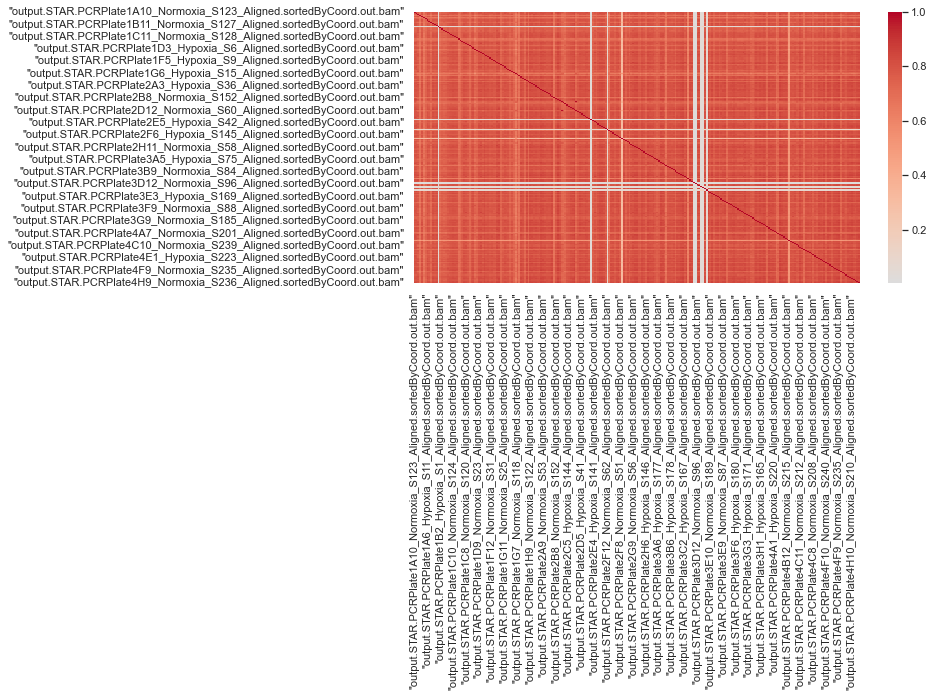

In [123]:
plt.figure(figsize=(10,5))
#df_small = df.iloc[:, :50]
#c= df_small.corr()
c2= df_HCC1806_allVars_log2_noDup.corr()
midpoint2 = (c2.values.max() - c2.values.min()) /2 + c2.values.min()
#sns.heatmap(c,cmap='coolwarm',annot=True, center=midpoint )
sns.heatmap(c2,cmap='coolwarm', center=0 )
print("Number of cells included: ", np.shape(c2))
print("Average correlation of expression profiles between cells: ", midpoint2)
print("Min. correlation of expression profiles between cells: ", c2.values.min())

We see that the correlation matrix of cells contains high values and therefore is mostly red. There are some white striped that indicate the presence of cells that are not correlated with other cells.

For each cell we calculate how many low correlated cells there are. For low correlation we defined the correlation threshold as a range between +/- 0.2:

In [124]:
df_lowCorr_info2 = c2[(c2 < 0.2) & (c2>-0.2)].count().reset_index().rename(columns={'index':'cell', 0:'n_lowCorr_cells'})
df_lowCorr_info2

cell  n_lowCorr_cells
0    "output.STAR.PCRPlate1A10_Normoxia_S123_Aligne...                8
1    "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned...                8
2    "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.s...                8
3    "output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned....                8
4    "output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.so...                8
..                                                 ...              ...
238  "output.STAR.PCRPlate4H10_Normoxia_S210_Aligne...                8
239  "output.STAR.PCRPlate4H11_Normoxia_S214_Aligne...                8
240  "output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned....                8
241  "output.STAR.PCRPlate4H7_Normoxia_S205_Aligned...                8
242  "output.STAR.PCRPlate4H9_Normoxia_S236_Aligned...                8

[243 rows x 2 columns]

Let's define the 'uncorrelated cell group' as the group of cells that have low correlation with at least half of the other cells:

In [125]:
df_lowCorr_info2[df_lowCorr_info2['n_lowCorr_cells']> 0]

cell  n_lowCorr_cells
0    "output.STAR.PCRPlate1A10_Normoxia_S123_Aligne...                8
1    "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned...                8
2    "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.s...                8
3    "output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned....                8
4    "output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.so...                8
..                                                 ...              ...
238  "output.STAR.PCRPlate4H10_Normoxia_S210_Aligne...                8
239  "output.STAR.PCRPlate4H11_Normoxia_S214_Aligne...                8
240  "output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned....                8
241  "output.STAR.PCRPlate4H7_Normoxia_S205_Aligned...                8
242  "output.STAR.PCRPlate4H9_Normoxia_S236_Aligned...                8

[243 rows x 2 columns]

In [126]:
df_lowCorr_info2.groupby(['n_lowCorr_cells']).agg('count')

cell
n_lowCorr_cells      
8                 235
242                 8

In [127]:
half_of_samples = len(df_lowCorr_info2)/2
df_lowCorr_info2[df_lowCorr_info2['n_lowCorr_cells']> half_of_samples]

cell  n_lowCorr_cells
13   "output.STAR.PCRPlate1B1_Hypoxia_S98_Aligned.s...              242
96   "output.STAR.PCRPlate2E12_Normoxia_S61_Aligned...              242
105  "output.STAR.PCRPlate2F12_Normoxia_S62_Aligned...              242
152  "output.STAR.PCRPlate3D10_Normoxia_S188_Aligne...              242
153  "output.STAR.PCRPlate3D11_Normoxia_S92_Aligned...              242
156  "output.STAR.PCRPlate3D2_Hypoxia_S168_Aligned....              242
157  "output.STAR.PCRPlate3D3_Hypoxia_S72_Aligned.s...              242
159  "output.STAR.PCRPlate3D5_Hypoxia_S78_Aligned.s...              242

In [128]:
print(len(df_lowCorr_info2[df_lowCorr_info2['n_lowCorr_cells']> half_of_samples]))

8


8 cells are expressing very different gene profiles (i.e. their correlations with almost all of the cells is between -0.2 and 0.2)

In [129]:
uncorrelated_cells2 = df_lowCorr_info2.cell.tolist()

In [130]:
df_HCC1806_allVars_log2_noDup[uncorrelated_cells2].describe(percentiles=[0.05,0.25,0.5,0.75,0.95]).round(2)

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
count                                           23342.00                        
mean                                                2.67                        
std                                                 3.34                        
min                                                 0.00                        
5%                                                  0.00                        
25%                                                 0.00                        
50%                                                 0.00                        
75%                                                 5.73                        
95%                                                 8.73                        
max                                                15.11                        

       "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"  \
count                                           23342.00                       
mean                                                3.23                       
std                                                 3.85                       
min                                                 0.00                       
5%                                                  0.00                       
25%                                                 0.00                       
50%                                                 0.00                       
75%                                                 6.99                       
95%                                                 9.85                       
max                                                16.08                       

       "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"  \
count                                           23342.00                     
mean                                                1.37                     
std                                                 1.94                     
min                                                 0.00                     
5%                                                  0.00                     
25%                                                 0.00                     
50%                                                 0.00                     
75%                                                 2.58                     
95%                                                 5.32                     
max                                                12.63                     

       "output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"  \
count                                           23342.00                      
mean                                                2.26                      
std                                                 3.62                      
min                                                 0.00                      
5%                                                  0.00                      
25%                                                 0.00                      
50%                                                 0.00                      
75%                                                 5.36                      
95%                                                 9.46                      
max                                                16.10                      

       "output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"  \
count                                           23342.00                    
mean                                                2.11                    
std                                                 2.76                    
min                                                 0.00                    
5%                                                  0.00                    
25%                                        

Low correlated group of cells are having 0 in at least half of their data points with high enough standard deviations. 

We can also look at the cells that are highly correlated with other cells in the same way. We define the high correlation threshold as values greater than 0.75 and less than -0.75:

In [131]:
df_highCorr_info2 = c2[(c2 < -0.75) | (c2> 0.75)].count().reset_index().rename(columns={'index':'cell', 0:'n_highCorr_cells'})
print(len(df_highCorr_info2[df_highCorr_info2['n_highCorr_cells']> half_of_samples]))

197


In [132]:
100*(197/243)

81.06995884773663

81% of the cells are highly correlated with at least half of the other cells. 

In [133]:
df_highCorr_info2

cell  n_highCorr_cells
0    "output.STAR.PCRPlate1A10_Normoxia_S123_Aligne...               199
1    "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned...               197
2    "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.s...               175
3    "output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned....                 1
4    "output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.so...               187
..                                                 ...               ...
238  "output.STAR.PCRPlate4H10_Normoxia_S210_Aligne...               204
239  "output.STAR.PCRPlate4H11_Normoxia_S214_Aligne...               193
240  "output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned....               195
241  "output.STAR.PCRPlate4H7_Normoxia_S205_Aligned...               208
242  "output.STAR.PCRPlate4H9_Normoxia_S236_Aligned...               215

[243 rows x 2 columns]

In [134]:
df_highCorr_info2[df_highCorr_info2['n_highCorr_cells']> half_of_samples]

cell  n_highCorr_cells
0    "output.STAR.PCRPlate1A10_Normoxia_S123_Aligne...               199
1    "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned...               197
2    "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.s...               175
4    "output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.so...               187
7    "output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.s...               197
..                                                 ...               ...
238  "output.STAR.PCRPlate4H10_Normoxia_S210_Aligne...               204
239  "output.STAR.PCRPlate4H11_Normoxia_S214_Aligne...               193
240  "output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned....               195
241  "output.STAR.PCRPlate4H7_Normoxia_S205_Aligned...               208
242  "output.STAR.PCRPlate4H9_Normoxia_S236_Aligned...               215

[197 rows x 2 columns]

These cells above are correlated with more than half of the cells.

In [135]:
c2

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned...                                           1.000000                        
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned....                                           0.802084                        
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.so...                                           0.738143                        
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.s...                                           0.664497                        
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sor...                                           0.771012                        
...                                                                                               ...                        
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned...                                           0.810706                        
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned...                                           0.784340                        
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.s...                                           0.777817                        
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned....                                           0.811515                        
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned....                                           0.839984                        

                                                    "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"  \
"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned...                                           0.802084                       
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned....                                           1.000000                       
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.so...                                           0.753342                       
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.s...                                           0.664647                       
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sor...                                           0.772079                       
...                                                                                               ...                       
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned...                                           0.819417                       
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned...                                           0.790652                       
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.s...                                           0.782426                       
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned....                                           0.807248                       
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned....                                           0.827735                       

                                                    "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"  \
"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned...                                           0.738143                     
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned....                                           0.753342                     
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.so...                                           1.000000                     
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.s...                                           0.684016                     
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sor...                                           0.807379                     
...                                                                                               ...                     
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned...                                           0.797074                     
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned...    

So far we looked at the correlation between different samples (cells) and then we tried to understand if there is a cluster of cells that are different than the rest and if there is a cluster of cells that are very similar to each other using correlation measure.

Now instead let's look at the correlation between two groups of low and high Hypoxia cells:

In [136]:
hypo_cells2 = [elem for elem in df_HCC1806_allVars_log2_noDup.columns.tolist() if 'Hypo' in elem ]
df_corr_hypo_cells2 = c2[c2.index.isin(hypo_cells2)]
df_corr_hypo_cells2 = df_corr_hypo_cells2[hypo_cells2]
midpoint_hypo2 = (df_corr_hypo_cells2.values.max() - df_corr_hypo_cells2.values.min()) /2 + df_corr_hypo_cells2.values.min()
print("Number of cells included: ", np.shape(df_corr_hypo_cells2))
print("Average correlation of expression profiles between hypoxia cells: ", midpoint_hypo2)

Number of cells included:  (126, 126)
Average correlation of expression profiles between hypoxia cells:  0.5138416720932726


In [137]:
lower_matrix = df_corr_hypo_cells2.mask(np.triu(np.ones(df_corr_hypo_cells2.shape, dtype=np.bool_)))
print(np.nanmean(lower_matrix))
print(np.nanstd(lower_matrix))

0.7125203020299994
0.18110061760024687


Let's look at the correlation between Normal cells: 

In [138]:
no_hypo_cells2 = [elem for elem in df_HCC1806_allVars_log2_noDup.columns.tolist() if 'Hypo' not in elem ]
df_corr_nohypo_cells2 = c2[c2.index.isin(no_hypo_cells2)]
df_corr_nohypo_cells2 = df_corr_nohypo_cells2[no_hypo_cells2]
midpoint_nohypo2 = (df_corr_nohypo_cells2.values.max() - df_corr_nohypo_cells2.values.min()) /2 + df_corr_nohypo_cells2.values.min()
print("Number of cells included: ", np.shape(df_corr_nohypo_cells2))
print("Average correlation of expression profiles between hypoxia cells: ", midpoint_nohypo2)

#df_mcf7_allVars_log2_noDup.corr()

Number of cells included:  (117, 117)
Average correlation of expression profiles between hypoxia cells:  0.5025598128723653


In [139]:
lower_matrix_nohypo = df_corr_nohypo_cells2.mask(np.triu(np.ones(df_corr_nohypo_cells2.shape, dtype=np.bool_)))
print(np.nanmean(lower_matrix_nohypo))
print(np.nanstd(lower_matrix_nohypo))

0.7391483781373038
0.20123353337970712


The average correlation within the two cell groups (low oxygen condition cells and high oxygen condition) is similar. 

That means high oxygen cells are not more similar to each other than how much similar low oxygen cells to each other.

We choose 5 random cells from high oxygen condition and then 5 random cells from low oxygen condition and look at their distributions:


In [140]:
len(df_corr_nohypo_cells2)

117

Text(0.5, 0, 'Correlation between cells expression profiles')

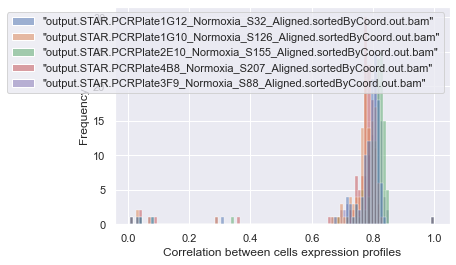

In [141]:
random.seed(1111)
random_vars = [randint(0,len(df_corr_nohypo_cells2)) for i in range(0,5)]
sns.histplot(df_corr_nohypo_cells2.iloc[:,random_vars],bins=100)
plt.ylabel('Frequency')
plt.xlabel('Correlation between cells expression profiles')

Text(0.5, 0, 'Correlation between cells expression profiles')

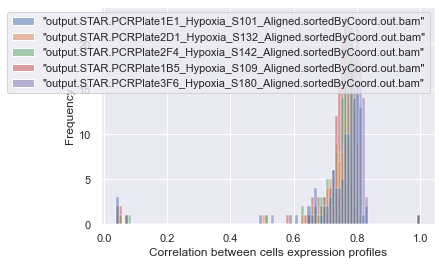

In [142]:
random_vars = [randint(0,len(df_corr_hypo_cells2)) for i in range(0,5)]
sns.histplot(df_corr_hypo_cells2.iloc[:,random_vars],bins=100)
plt.ylabel('Frequency')
plt.xlabel('Correlation between cells expression profiles')

Both for no hypoxia and hypoxia conditions, we chose 4 random cells. The cells visualized how high correlations with other cells as visualized.

We also check the correlations between the features (i.e. the expressions of different genes) as requested.
It take too long to check all the features, therefore we use only 5% of the features for this exercise:

In [143]:
df_HCC1806_allVars_log2_noDup.iloc[:,0:20].T

"WASH7P"  "CICP27"  \
"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned...       0.0       0.0   
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned....       0.0       0.0   
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.so...       0.0       0.0   
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.s...       0.0       0.0   
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sor...       0.0       0.0   
"output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sor...       0.0       0.0   
"output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.s...       0.0       0.0   
"output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.so...       0.0       0.0   
"output.STAR.PCRPlate1A7_Normoxia_S113_Aligned....       0.0       0.0   
"output.STAR.PCRPlate1A8_Normoxia_S119_Aligned....       0.0       0.0   
"output.STAR.PCRPlate1A9_Normoxia_S20_Aligned.s...       0.0       0.0   
"output.STAR.PCRPlate1B11_Normoxia_S127_Aligned...       0.0       0.0   
"output.STAR.PCRPlate1B12_Normoxia_S27_Aligned....       1.0       0.0   
"output.STAR.PCRPlate1B1_Hypoxia_S98_Aligned.so...       0.0       0.0   
"output.STAR.PCRPlate1B2_Hypoxia_S1_Aligned.sor...       0.0       0.0   
"output.STAR.PCRPlate1B3_Hypoxia_S5_Aligned.sor...       0.0       0.0   
"output.STAR.PCRPlate1B4_Hypoxia_S105_Aligned.s...       0.0       0.0   
"output.STAR.PCRPlate1B5_Hypoxia_S109_Aligned.s...       0.0       0.0   
"output.STAR.PCRPlate1B6_Hypoxia_S12_Aligned.so...       0.0       0.0   
"output.STAR.PCRPlate1B7_Normoxia_S114_Aligned....       0.0       0.0   

                                                    "DDX11L17"  "WASH9P"  \
"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned...    0.000000       0.0   
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned....    0.000000       0.0   
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.so...    0.000000       0.0   
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.s...    0.000000       0.0   
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sor...    0.000000       0.0   
"output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sor...    1.000000       0.0   
"output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.s...    0.000000       0.0   
"output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.so...    0.000000       0.0   
"output.STAR.PCRPlate1A7_Normoxia_S113_Aligned....    0.000000       1.0   
"output.STAR.PCRPlate1A8_Normoxia_S119_Aligned....    0.000000       0.0   
"output.STAR.PCRPlate1A9_Normoxia_S20_Aligned.s...    1.000000       0.0   
"output.STAR.PCRPlate1B11_Normoxia_S127_Aligned...    1.000000       0.0   
"output.STAR.PCRPlate1B12_Normoxia_S27_Aligned....    0.000000       0.0   
"output.STAR.PCRPlate1B1_Hypoxia_S98_Aligned.so...    0.000000       0.0   
"output.STAR.PCRPlate1B2_Hypoxia_S1_Aligned.sor...    3.169925       0.0   
"output.STAR.PCRPlate1B3_Hypoxia_S5_Aligned.sor...    1.584963       0.0   
"output.STAR.PCRPlate1B4_Hypoxia_S105_Aligned.s...    0.000000       0.0   
"output.STAR.PCRPlate1B5_Hypoxia_S109_Aligned.s...    0.000000       0.0   
"output.STAR.PCRPlate1B6_Hypoxia_S12_Aligned.so...    0.000000       0.0   
"output.STAR.PCRPlate1B7_Normoxia_S114_Aligned....    0.000000       1.0   

                                                    "OR4F29"  "MTND1P23"  \
"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned...  1.584963    7.971544   
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned....  0.000000    8.731319   
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.so...  0.000000    3.584963   
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.s...  0.000000    6.000000   
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sor...  0.000000    4.807355   
"output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sor...  0.000000    6.357552   
"output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.s...  1.000000    8.257388   
"output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.so...  0.000000    6.375039   
"output.STAR.PCRPlate1A7_Normoxia_S113_Aligned....  0.000000    5.554589   
"output.STAR.PCRPlate1A8_Normoxia_S119_Aligned....  0.000000    7.475733   
"output.STAR.PCRPlate1A9_Normoxia_S20_Aligned.s...  0.000000    

<AxesSubplot:>

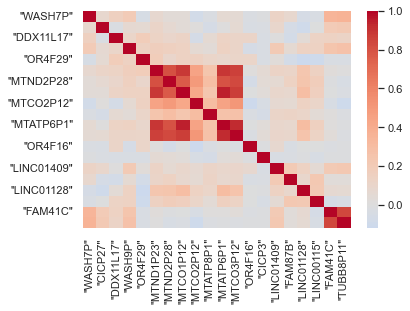

In [144]:
corr_features_HCC1806 = df_HCC1806_allVars_log2_noDup.iloc[0:20].T.corr()
sns.heatmap(corr_features_HCC1806,cmap='coolwarm', center=0)

Just looking at the first 20 features, we notice on the correlation matrix red areas that indicate high positive correlations. We also notice some negative correlations (but not that high).
Features with high correlations can be problematic for some machine learning algorithms. This problem is known as multicollinearity. In order to solve it, among a highly correlated pair of features, one should not be used in the model.

-------------- Memory Cleaning Start -------------- 

In [145]:
alldfs = [var for var in dir() if isinstance(eval(var), pd.core.frame.DataFrame)]

print(alldfs) # df1, df2
for elem in alldfs:
    exec('del ' + elem)
    
gc.collect()

['HCC1806_smarts_filtered', 'HCC1806_smarts_filtered_normalized', 'HCC1806_smarts_metadata', 'HCC1806_smarts_unfiltered', 'HCC1806_smarts_unfiltered_info_sparsity_th90', 'HCC1806_smarts_unfiltered_info_sparsity_th95', 'HCC1806_smarts_unfiltered_noOut', '_100', '_107', '_109', '_116', '_118', '_120', '_124', '_125', '_126', '_127', '_130', '_133', '_134', '_135', '_143', '_73', '_77', '_81', '_90', '__', 'c2', 'c_dupl', 'corr_features_HCC1806', 'df_HCC1806_50vars_log2', 'df_HCC1806_allVars_log2', 'df_HCC1806_allVars_log2_noDup', 'df_HCC1806_allVars_log2_norm', 'df_HCC1806_allVars_log2_small', 'df_corr_hypo_cells2', 'df_corr_nohypo_cells2', 'df_highCorr_info2', 'df_lowCorr_info2', 'duplicate_rows_df_HCC1806_allVars_log2', 'duplicate_rows_df_HCC1806_allVars_log2_t', 'lower_matrix', 'lower_matrix_nohypo']


45062

-------------- Memory Cleaning End -------------- 

## Unsupervised learning 

### UL1: MCF7 Cell line

I am loading the train set with 3000 features:

In [146]:
mcf7_train = pd.read_csv("SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(mcf7_train)) # 3000 expressions of different genes, 250 cells
print("First column: ", mcf7_train.iloc[ : , 0])

Dataframe dimensions: (3000, 250)
First column:  "CYP1B1"        343
"CYP1B1-AS1"    140
"CYP1A1"          0
"NDRG1"           0
"DDIT4"         386
               ... 
"GRIK5"           0
"SLC25A27"        0
"DENND5A"        51
"CDK5R1"          0
"FAM13A-AS1"      0
Name: "output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam", Length: 3000, dtype: int64


In [147]:
mcf7_train.describe()

"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam"  \
count                                        3000.000000           
mean                                           74.140333           
std                                           345.005307           
min                                             0.000000           
25%                                             0.000000           
50%                                             0.000000           
75%                                            24.000000           
max                                          8222.000000           

       "output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam"  \
count                                        3000.000000           
mean                                           90.907000           
std                                           409.560228           
min                                             0.000000           
25%                                             0.000000           
50%                                             0.000000           
75%                                            37.000000           
max                                         10167.000000           

       "output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam"  \
count                                        3000.000000           
mean                                           99.089000           
std                                           442.980702           
min                                             0.000000           
25%                                             0.000000           
50%                                             0.000000           
75%                                            33.000000           
max                                         11446.000000           

       "output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam"  \
count                                        3000.000000           
mean                                           88.137000           
std                                           425.804372           
min                                             0.000000           
25%                                             0.000000           
50%                                             0.000000           
75%                                            34.000000           
max                                         10312.000000           

       "output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam"  \
count                                        3000.000000           
mean                                          110.395667           
std                                           822.178446           
min                                             0.000000           
25%                                             0.000000           
50%                                             0.000000           
75%                                            38.250000           
max                                         30586.000000           

       "output.STAR.2_B9_Hypo_S81_Aligned.sortedByCoord.out.bam"  \
count                                        3000.000000           
mean                                          148.849000           
std                                          1710.088769           
min                                             0.000000           
25%                                             0.000000           
50%                                             0.000000           
75%                                            24.000000           
max                                         65037.000000           

       "output.STAR.2_C10_Hypo_S130_Aligned.sortedByCoord.out.bam"  \
count                                        3000.000000             
mean                                          126.422667             
std                                          1351.567001             
min                                             0

We want single cells to be our observations, and the gene expressions to be the features. So we transpose the dataset:

In [148]:
mcf7_train_T = mcf7_train.T

In [149]:
mcf7_train_T.describe()

"CYP1B1"  "CYP1B1-AS1"      "CYP1A1"      "NDRG1"       "DDIT4"  \
count    250.000000    250.000000    250.000000   250.000000    250.000000   
mean    5454.536000   2258.572000   1604.580000   606.380000   2487.000000   
std     8282.337795   3453.650882   5657.397449   766.718881   3422.213185   
min        0.000000      0.000000      0.000000     0.000000      0.000000   
25%      200.750000     85.000000      0.000000     1.000000     96.000000   
50%      795.000000    321.500000      0.000000   222.500000   1198.500000   
75%     8180.500000   3348.500000    284.500000  1077.500000   3720.000000   
max    44406.000000  17673.000000  58717.000000  3884.000000  21994.000000   

           "PFKFB3"         "HK2"       "AREG"      "MYBL2"        "ADM"  ...  \
count    250.000000    250.000000   250.000000   250.000000   250.000000  ...   
mean    1495.920000    868.424000   308.984000   394.988000   183.096000  ...   
std     2109.376474   1837.399974   592.950034   564.259514   470.374582  ...   
min        0.000000      0.000000     0.000000     0.000000     0.000000  ...   
25%       71.000000      8.250000     0.000000     0.000000     0.000000  ...   
50%      369.500000    139.500000    18.000000   123.500000     0.000000  ...   
75%     2180.750000   1008.000000   371.000000   629.000000    74.500000  ...   
max    12078.000000  16625.000000  3496.000000  3108.000000  3586.000000  ...   

       "CD27-AS1"     "DNAI7"      "MAFG"     "LZTR1"      "BCO2"     "GRIK5"  \
count  250.000000  250.000000  250.000000  250.000000  250.000000  250.000000   
mean    22.036000    0.192000   50.884000   23.308000    0.192000    0.256000   
std     43.250493    2.000787   69.729761   36.415015    1.309195    2.001622   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   13.250000    0.000000    0.000000    0.000000   
50%      8.000000    0.000000   37.000000    1.000000    0.000000    0.000000   
75%     30.000000    0.000000   63.000000   41.000000    0.000000    0.000000   
max    509.000000   28.000000  816.000000  196.000000   14.000000   26.000000   

       "SLC25A27"   "DENND5A"    "CDK5R1"  "FAM13A-AS1"  
count  250.000000  250.000000  250.000000    250.000000  
mean     0.160000   60.536000    2.860000      5.952000  
std      1.167842   75.647093    8.839056     21.649028  
min      0.000000    0.000000    0.000000      0.000000  
25%      0.000000   11.250000    0.000000      0.000000  
50%      0.000000   38.500000    0.000000      0.000000  
75%      0.000000   77.000000    0.000000      0.000000  
max     11.000000  639.000000   62.000000    288.000000  

[8 rows x 3000 columns]

In [150]:
mcf7_train_T.head(1)

"CYP1B1"  "CYP1B1-AS1"  \
"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoor...       343           140   

                                                    "CYP1A1"  "NDRG1"  \
"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoor...         0        0   

                                                    "DDIT4"  "PFKFB3"  "HK2"  \
"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoor...      386        75      0   

                                                    "AREG"  "MYBL2"  "ADM"  \
"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoor...       0      476      0   

                                                    ...  "CD27-AS1"  "DNAI7"  \
"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoor...  ...          63        0   

                                                    "MAFG"  "LZTR1"  "BCO2"  \
"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoor...      17       59       0   

                                                    "GRIK5"  "SLC25A27"  \
"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoor...        0           0   

                                                    "DENND5A"  "CDK5R1"  \
"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoor...         51         0   

                                                    "FAM13A-AS1"  
"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoor...             0  

[1 rows x 3000 columns]

[2064, 767, 382, 2457, 1385, 2697, 2798, 436, 1796, 605]


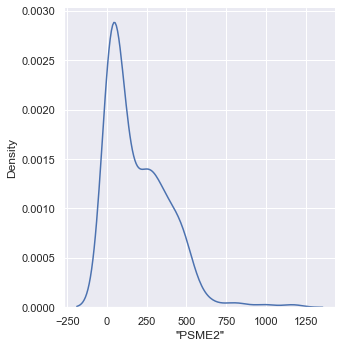

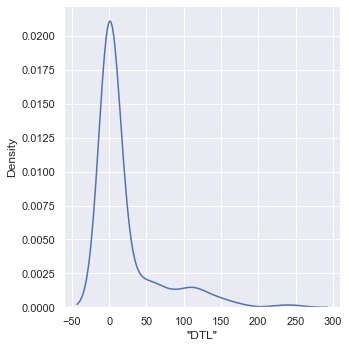

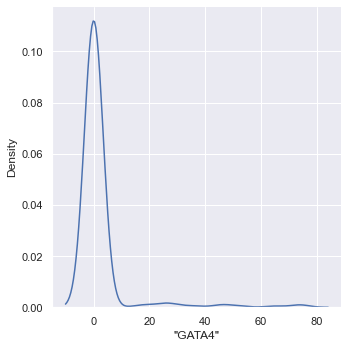

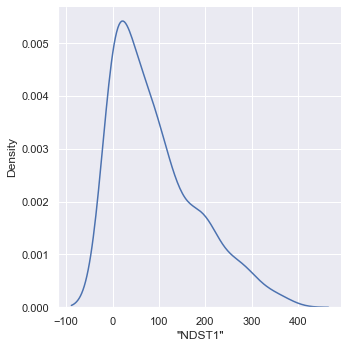

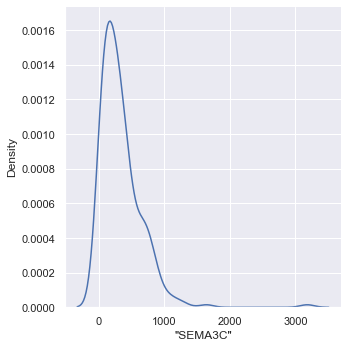

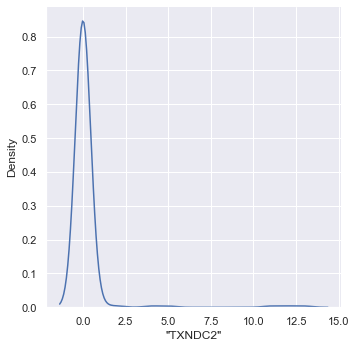

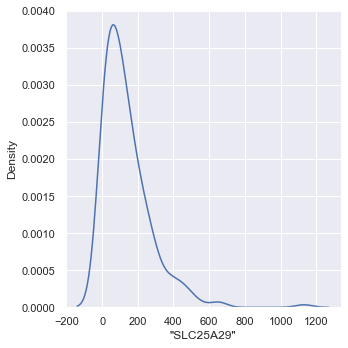

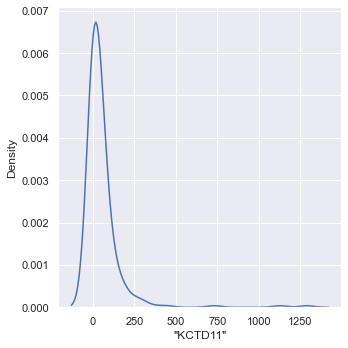

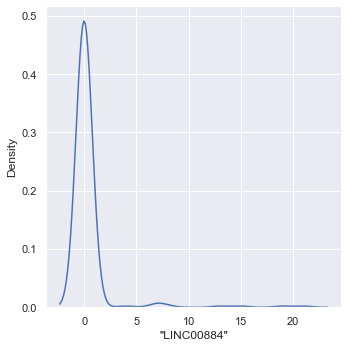

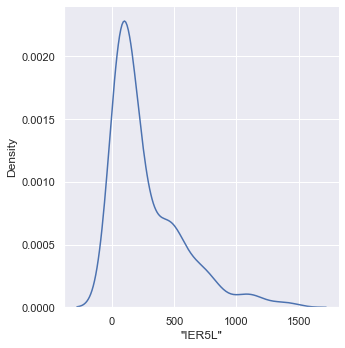

In [151]:
random_variable_indices = [randint(0, (mcf7_train_T.shape[1]-1)) for i in range(0,10)]
print(random_variable_indices)
for i in random_variable_indices:
    sns.displot(
        mcf7_train_T,
        x= mcf7_train_T.columns.tolist()[i], 
        kind="kde"
    )

I am loading the test set and transposing it: 

In [152]:
mcf7_test = pd.read_csv("SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(mcf7_test)) # 3000 expressions of different genes, 250 cells
print("First column: ", mcf7_test.iloc[ : , 0])

Dataframe dimensions: (3000, 63)
First column:  "CYP1B1"         492
"CYP1B1-AS1"     253
"CYP1A1"           0
"NDRG1"         1157
"DDIT4"         6805
                ... 
"GRIK5"            0
"SLC25A27"         0
"DENND5A"        285
"CDK5R1"           0
"FAM13A-AS1"       1
Name: "1", Length: 3000, dtype: int64


In [153]:
mcf7_test.head()

"1"    "2"  "3"  "4"  "5"  "6"  "7"    "8"   "9"  "10"  ...  \
"CYP1B1"       492   7199   12  373   31  245  258  20634  6804   570  ...   
"CYP1B1-AS1"   253   3245   11  187   13  109  106   8769  2911   246  ...   
"CYP1A1"         0   7181    1    0    0    0    0   4813    72     1  ...   
"NDRG1"       1157   1857    5    0    0   10    3   1196  1168     2  ...   
"DDIT4"       6805  20731  147   43    0   25  646  11080  2988     9  ...   

              "54"  "55"  "56"  "57"   "58"   "59"   "60"   "61"  "62"  "63"  
"CYP1B1"       202   120   340  7919   2015    287  15220  21998    39   195  
"CYP1B1-AS1"    89    57   151  3515    929    126   6316   8898    17    81  
"CYP1A1"         0     0     0     0     75    666   1991  21329     1     0  
"NDRG1"          9     0     0   503    237   3270    750   1498    29     6  
"DDIT4"          1     0     4  5323  16733  25776  12176   5144    20    93  

[5 rows x 63 columns]

In [154]:
mcf7_test_T = mcf7_test.T

### UL1/Dimensionality Reduction: MCF7 Cell line -- 1. PCA 

First unsupervised learning technique we will use to find the hidden patterns in the data is PCA. 

PCA is a dimensionality reduction technique which projects the data into a different vector space in the direction of the maximum variance: 

We standardize each feature as usually applied for PCA analysis:

In [155]:
standardizer = StandardScaler()
mcf7_train_T_S = standardizer.fit_transform(mcf7_train_T)

In [156]:
mcf7_train_T_S.shape

(250, 3000)

In [157]:
pd.DataFrame(mcf7_train_T_S, columns=mcf7_train_T.columns.tolist()).describe().round(2)

"CYP1B1"  "CYP1B1-AS1"  "CYP1A1"  "NDRG1"  "DDIT4"  "PFKFB3"   "HK2"  \
count    250.00        250.00    250.00   250.00   250.00    250.00  250.00   
mean      -0.00         -0.00      0.00    -0.00     0.00     -0.00    0.00   
std        1.00          1.00      1.00     1.00     1.00      1.00    1.00   
min       -0.66         -0.66     -0.28    -0.79    -0.73     -0.71   -0.47   
25%       -0.64         -0.63     -0.28    -0.79    -0.70     -0.68   -0.47   
50%       -0.56         -0.56     -0.28    -0.50    -0.38     -0.54   -0.40   
75%        0.33          0.32     -0.23     0.62     0.36      0.33    0.08   
max        4.71          4.47     10.12     4.28     5.71      5.03    8.59   

       "AREG"  "MYBL2"   "ADM"  ...  "CD27-AS1"  "DNAI7"  "MAFG"  "LZTR1"  \
count  250.00   250.00  250.00  ...      250.00   250.00  250.00   250.00   
mean     0.00    -0.00    0.00  ...       -0.00    -0.00   -0.00     0.00   
std      1.00     1.00    1.00  ...        1.00     1.00    1.00     1.00   
min     -0.52    -0.70   -0.39  ...       -0.51    -0.10   -0.73    -0.64   
25%     -0.52    -0.70   -0.39  ...       -0.51    -0.10   -0.54    -0.64   
50%     -0.49    -0.48   -0.39  ...       -0.33    -0.10   -0.20    -0.61   
75%      0.10     0.42   -0.23  ...        0.18    -0.10    0.17     0.49   
max      5.39     4.82    7.25  ...       11.28    13.93   10.99     4.75   

       "BCO2"  "GRIK5"  "SLC25A27"  "DENND5A"  "CDK5R1"  "FAM13A-AS1"  
count  250.00   250.00      250.00     250.00    250.00        250.00  
mean    -0.00    -0.00       -0.00      -0.00      0.00         -0.00  
std      1.00     1.00        1.00       1.00      1.00          1.00  
min     -0.15    -0.13       -0.14      -0.80     -0.32         -0.28  
25%     -0.15    -0.13       -0.14      -0.65     -0.32         -0.28  
50%     -0.15    -0.13       -0.14      -0.29     -0.32         -0.28  
75%     -0.15    -0.13       -0.14       0.22     -0.32         -0.28  
max     10.57    12.89        9.30       7.66      6.70         13.05  

[8 rows x 3000 columns]

Now that our data set 0 mean and unit variance, we can apply PCA transformation. 

We are not indicating the number of components, according to the documentation, since the max number of samples is less than the number of features, the PCA algorithm of sklearn will give us components as many as the number of samples. 

We will do analyses later on to understand the relationship between the information in the dataset and the optimal number of components to use:

In [158]:
pca_mcf7 = PCA(random_state=101)
mcf7_train_T_S_PCA = pca_mcf7.fit_transform(mcf7_train_T_S)
explained_variance_mcf7 = pca_mcf7.explained_variance_ratio_
cumulative_sum_variance = np.cumsum(explained_variance_mcf7)

We plot the cumulative variance of the first then principal components:

Text(0, 0.5, 'cumulative variance')

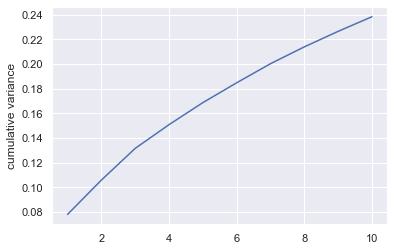

In [159]:
plt.plot(np.arange(1,11,1), cumulative_sum_variance[0:10])
plt.ylabel('cumulative variance')

The first ten principal components explain 24% of variance of the dataset. If we use only the first two principal components, alone they are able to reflect the 10% of the total variance. Including the third component brings only 3% more information.

Text(0, 0.5, 'cumulative variance')

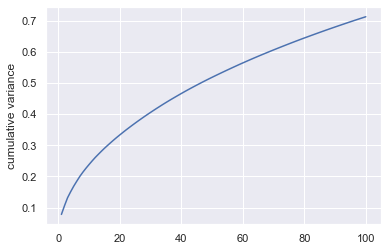

In [160]:
plt.plot(np.arange(1,101,1), cumulative_sum_variance[0:100])
plt.ylabel('cumulative variance')

We need to use 100 components to account for 70% of the variance in the data. 
Given that we have 3000 features initally, it can be a good comparison to use only one third of the features. 

For this exercise, we can plot Hypoxia cells and no hypoxia cells using the two principal components:

In [161]:
Y_train = mcf7_train_T.reset_index()['index'].apply(lambda x_str: 1 if 'Hypo' in x_str else 0)

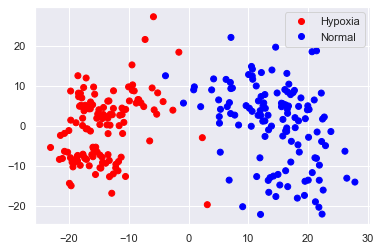

In [162]:
plt.figure()
plot = plt.scatter(mcf7_train_T_S_PCA[:,0], mcf7_train_T_S_PCA[:,1], c=Y_train, cmap="bwr_r")
plt.legend(handles=plot.legend_elements()[0], labels=["Hypoxia","Normal"])
plt.show()

We apply the PCA transformer to the test set: 

C:\Users\anili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


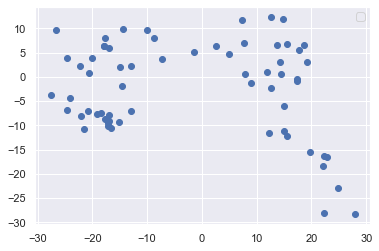

In [163]:
mcf7_test_T_S = standardizer.transform(mcf7_test_T)
mcf7_test_T_S_PCA = pca_mcf7.transform(mcf7_test_T_S)

plt.figure()
plot = plt.scatter(mcf7_test_T_S_PCA[:,0], mcf7_test_T_S_PCA[:,1])
plt.legend(handles=plot.legend_elements()[0])
plt.show()

We do not have the Hypoxia condition of the cells in the test set, we cannot see the separation by condition as we did with the train set. But we would expect the cells on the left of 0 and on the right of 0 to represent the two conditions. 

### UL1/Dimensionality Reduction: MCF7 Cell line -- 2. Isomap 

Isomap is short for Isometric Mapping. Isomap is a non-linear way of reducing dimentionality while preserving local structures. It's actually a combination of different algorithms: k-nearest neighbors (KNN), a shortest path algorithm (which could be the Dijkstra’s algorithm, for example), and Multidimensional Scaling (MDS). 
Isomap is distinguished from MDS by the preservation of geodesic distances, which results in the preservation of manifold structures in the resulting embedding. The goal of this mapping is to maintain a geodesic distance between two points. Geodesic is more formally defined as the shortest path on the surface itself. 
???????

In [164]:
isomap = Isomap()
mcf7_train_T_S_isomap = isomap.fit_transform(mcf7_train_T_S)


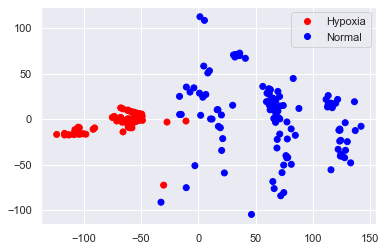

In [165]:
plt.figure()
plot = plt.scatter(mcf7_train_T_S_isomap[:,0], mcf7_train_T_S_isomap[:,1], c=Y_train, cmap="bwr_r")
plt.legend(handles=plot.legend_elements()[0], labels=["Hypoxia","Normal"])
plt.show()

In [166]:
mcf7_train_T_S_isomap.shape

(250, 2)

Isomap distinguishes two cases. With only one dimension (dim1=-50) we can differentiate Hypoxia and Normal cells with small error for theobservations between -50 and 0. 

### UL1/Dimensionality Reduction: MCF7 Cell line -- 3. T SNE (T-distributed Stochastic Neighbor Embedding)

As a third dimensionality reduction method, we will try T-SNE algorithm. T-SNE works well on sets with non-linear variance. It tries to maximize the distance between the probability distributions of similar and dissimilar observations. 

In [167]:
tsne_mcf7 = TSNE(random_state=101)
mcf7_train_T_S_tsne = tsne_mcf7.fit_transform(mcf7_train_T_S)

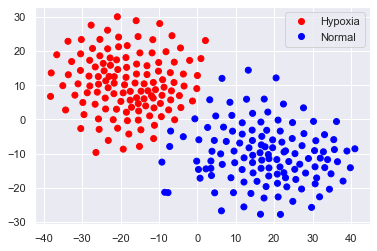

In [168]:
plt.figure()
plot = plt.scatter(mcf7_train_T_S_tsne[:,0], mcf7_train_T_S_tsne[:,1], c=Y_train, cmap="bwr_r")
plt.legend(handles=plot.legend_elements()[0], labels=["Hypoxia","Normal"])
plt.show()

TSNE implementation in sklearn does not have transform method so we cannot apply it to the train set to see if there will be well separated clusters.

#### Comparison of the dimension reduction methods:

- TSNE gives us good enough separated clusters of Hypoxia and Normal cells using 2 dimensions
- PCA and Isomap methods distinguishes two conditions using only one dimension with some error

### UL1/Clustering: MCF7 Cell line -- Kmeans

We can use our pca or tsne transformed dataset to find the clusters with Kmeans algorithm. We used these trasformed dataset to help the algorithm, otherwise we can use the not transformed dataset as well and we tried that way too. 

- Kmeans initalizes random n centroids.
- Assigns the nearest observations to that cluster. 
- Calculates the new cluster centroids and iteratively repeats the procedure until some metric is minimized. 

The metric that is minimized usually is called inertia: it is the sum of squared distance of samples to their closest cluster centroid. 

#### A. Kmeans on PCA transformed data: 

We choose the use 3 components in PCA to transform the data (there is little difference between 2 and 3 as we explained above):

In [169]:
pca_mcf7_final = PCA(n_components=3, random_state=101)
mcf7_train_T_S_PCA3 = pca_mcf7_final.fit_transform(mcf7_train_T_S)

pca_mcf7_final2 = PCA(n_components=2, random_state=101)
mcf7_train_T_S_PCA2 = pca_mcf7_final.fit_transform(mcf7_train_T_S)


We calculate intertia for Kmeans from 1 to 10 clusters: 

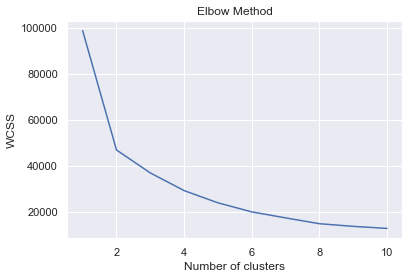

In [170]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(mcf7_train_T_S_PCA3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

There is a break point when the number of clusters equal to 2, so we decide to obtain 2 groups. We visualize the samples and their cluster centoid. 

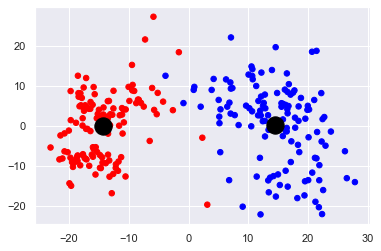

In [171]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(mcf7_train_T_S_PCA3)
plt.scatter(mcf7_train_T_S_PCA3[:,0], mcf7_train_T_S_PCA3[:,1],c=Y_train, cmap="bwr_r", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black')
plt.show()

Performing Kmeans on PCA transformed dataset fo the MCF cell line works well. We found two clusters of Hypoxia and Normal Conditions. In red and in blue we display Hypoxia and Normal conditions (the truth of the dataset) and in black we represent the found cluster centoids which match with the truth of the dataset.

#### B. Kmeans on T SNE transformed data: 

We apply the same to the TSNE transformed data:

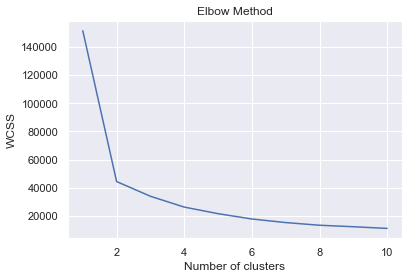

In [172]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(mcf7_train_T_S_tsne)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


2 clusters minimize inertia a lot:

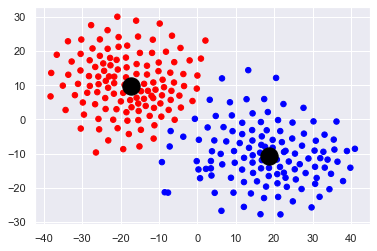

In [173]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(mcf7_train_T_S_tsne)
plt.scatter(mcf7_train_T_S_tsne[:,0], mcf7_train_T_S_tsne[:,1], c=Y_train, cmap="bwr_r", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black')
plt.show()

Kmeans on TSNE trasnformed data worked even bettter than PCA. 
We identify the centers of the two condition groups very well. In red and in blue we display Hypoxia and Normal conditions (the truth of the dataset) and in black we represent the found cluster centoids which match with the truth of the dataset.

#### C. Kmeans on the original data: 

We apply the same to the original data that is not standardized and not PCA transformed:

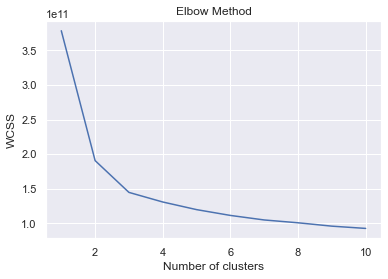

In [174]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(mcf7_train_T)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

For the original data, there is a second elbow at x=3:

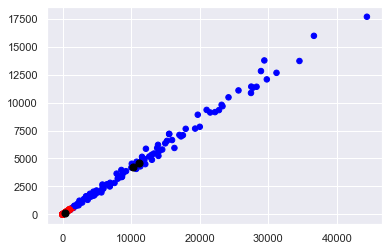

In [175]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(mcf7_train_T)
#ax = plt.figure(figsize=(9,9)).add_subplot(projection='3d')
plt.scatter(mcf7_train_T.to_numpy()[:,0], mcf7_train_T.to_numpy()[:,1], c=Y_train, cmap="bwr_r", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=50)
plt.show()


Three clusters do not work well. What about 2 clusters?

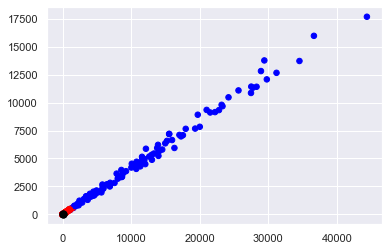

In [176]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(mcf7_train_T_S)
plt.scatter(mcf7_train_T.to_numpy()[:,0], mcf7_train_T.to_numpy()[:,1], c=Y_train, cmap="bwr_r", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=50)
plt.show()

We obtained bad results with the origial dataset. 
It is better to use standardization and dimension reduction, and do clustering on the dataset that is projected on the essential dimensions found. 

Finally we apply the Kmeans to the test set that is PCA transformed with three components to explore:

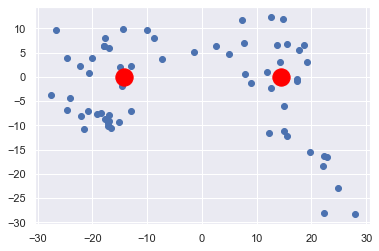

In [177]:
mcf7_test_T_S_PCA3 = pca_mcf7_final.transform(mcf7_test_T_S)

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(mcf7_train_T_S_PCA3)

plt.scatter(mcf7_test_T_S_PCA3[:,0], mcf7_test_T_S_PCA3[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

It looks very much like the figure of Kmeans applied on the PCA transformed traning set.

----- Memory Cleaning Start ----- 

In [178]:
alldfs = [var for var in dir() if isinstance(eval(var), pd.core.frame.DataFrame)]

print(alldfs) # df1, df2

for df_elem in alldfs:
    if df_elem not in ['mcf7_train_T', 'mcf7_train_T_S', 'Y_train']:
        exec('del ' + df_elem)
    
gc.collect()

['_147', '_149', '_150', '_153', '_157', 'mcf7_test', 'mcf7_test_T', 'mcf7_train', 'mcf7_train_T']


18725

In [179]:
#lower_matrix # check to see if lower_matrix is deleted: gives error -> ok worked 

----- Memory Cleaning End ----- 

### UL2: HCC1806 Cell line

I am loading the train set with 3000 features:

In [180]:
HCC1806_train = pd.read_csv("SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(HCC1806_train)) # 3000 expressions of different genes, 250 cells
print("First column: ", HCC1806_train.iloc[ : , 0])

Dataframe dimensions: (3000, 182)
First column:  "DDIT4"          0
"ANGPTL4"       48
"CALML5"         0
"KRT14"        321
"CCNB1"        298
              ... 
"LINC02693"     29
"OR8B9P"         0
"NEAT1"         29
"ZDHHC23"        0
"ODAD2"          0
Name: "output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam", Length: 3000, dtype: int64


In [181]:
HCC1806_train.describe()

"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam"  \
count                                        3000.000000                       
mean                                          149.353000                       
std                                          1052.553246                       
min                                             0.000000                       
25%                                             0.000000                       
50%                                             0.000000                       
75%                                             5.250000                       
max                                         39148.000000                       

       "output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam"  \
count                                        3000.000000                      
mean                                          182.303000                      
std                                           871.447201                      
min                                             0.000000                      
25%                                             0.000000                      
50%                                             0.000000                      
75%                                            33.000000                      
max                                         22572.000000                      

       "output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam"  \
count                                        3000.000000                    
mean                                          178.945667                    
std                                           965.087457                    
min                                             0.000000                    
25%                                             0.000000                    
50%                                             0.000000                    
75%                                             0.000000                    
max                                         21430.000000                    

       "output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam"  \
count                                        3000.000000                    
mean                                          168.183333                    
std                                           918.214156                    
min                                             0.000000                    
25%                                             0.000000                    
50%                                             0.000000                    
75%                                            30.000000                    
max                                         24033.000000                    

       "output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam"  \
count                                        3000.000000                      
mean                                          184.400000                      
std                                          1267.698452                      
min                                             0.000000                      
25%                                             0.000000                      
50%                                             0.000000                      
75%                                             0.000000                      
max                                         32768.000000                      

       "output.STAR.PCRPlate1G7_Normoxia_S118_Aligned.sortedByCoord.out.bam"  \
count                                         3000.00000                       
mean                                           168.87200                       
std                                           1607.97906                       
min                                              0.00000                       
25%                                              0.00000                  

We want single cells to be our observations, and the gene expressions to be the features. So we transpose the dataset:

In [182]:
HCC1806_train_T = HCC1806_train.T

In [183]:
HCC1806_train_T.describe()

"DDIT4"     "ANGPTL4"     "CALML5"       "KRT14"      "CCNB1"  \
count    182.000000    182.000000   182.000000    182.000000   182.000000   
mean    4038.736264   1227.164835   398.175824    921.307692   867.087912   
std     4165.241080   1949.430648   886.985647   2387.091444  1268.359981   
min        0.000000      0.000000     0.000000      0.000000     0.000000   
25%      295.000000      4.250000     0.000000     13.750000    61.250000   
50%     2729.500000    290.000000     0.000000    320.500000   299.500000   
75%     6933.500000   1857.750000   465.750000   1029.000000   988.500000   
max    16700.000000  14032.000000  5482.000000  28680.000000  6914.000000   

          "IGFBP3"      "AKR1C2"       "KRT6A"      "NDRG1"       "KRT4"  ...  \
count    182.00000    182.000000    182.000000   182.000000   182.000000  ...   
mean    1271.28022   1407.873626   1729.543956   457.895604   396.637363  ...   
std     2810.10746   2582.400094   3709.250440   627.115448  1541.330938  ...   
min        0.00000      0.000000      0.000000     0.000000     0.000000  ...   
25%       83.00000    140.250000    313.500000     4.000000     0.000000  ...   
50%      270.50000    484.000000    737.000000   143.500000     0.000000  ...   
75%     1163.50000   1472.000000   1774.000000   688.750000     0.000000  ...   
max    21554.00000  20195.000000  41946.000000  3356.000000  9902.000000  ...   

          "MST1R"    "ZYG11A"      "NRG1"     "RBMS3"     "VCPIP1"  \
count  182.000000  182.000000  182.000000  182.000000   182.000000   
mean   123.302198    4.291209  138.868132    7.192308    56.675824   
std    119.297816   11.790896  147.116950   21.864761   123.906663   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%     27.500000    0.000000   36.250000    0.000000     0.000000   
50%     98.500000    0.000000   97.000000    0.000000    36.000000   
75%    185.750000    0.000000  191.000000    6.000000    74.250000   
max    751.000000   68.000000  852.000000  246.000000  1545.000000   

       "LINC02693"    "OR8B9P"     "NEAT1"   "ZDHHC23"     "ODAD2"  
count   182.000000  182.000000  182.000000  182.000000  182.000000  
mean     57.098901    0.153846  102.076923   12.236264    2.175824  
std      86.519829    1.060835  140.866555   28.353222    8.754596  
min       0.000000    0.000000    1.000000    0.000000    0.000000  
25%       0.250000    0.000000   25.000000    0.000000    0.000000  
50%      34.000000    0.000000   57.000000    0.000000    0.000000  
75%      68.000000    0.000000  117.500000   11.500000    0.000000  
max     615.000000   11.000000  966.000000  222.000000   67.000000  

[8 rows x 3000 columns]

In [184]:
HCC1806_train_T.head(1)

"DDIT4"  "ANGPTL4"  \
"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned....        0         48   

                                                    "CALML5"  "KRT14"  \
"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned....         0      321   

                                                    "CCNB1"  "IGFBP3"  \
"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned....      298        82   

                                                    "AKR1C2"  "KRT6A"  \
"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned....      6250      634   

                                                    "NDRG1"  "KRT4"  ...  \
"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned....        0       0  ...   

                                                    "MST1R"  "ZYG11A"  "NRG1"  \
"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned....       78        10     136   

                                                    "RBMS3"  "VCPIP1"  \
"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned....        0         0   

                                                    "LINC02693"  "OR8B9P"  \
"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned....           29         0   

                                                    "NEAT1"  "ZDHHC23"  \
"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned....       29          0   

                                                    "ODAD2"  
"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned....        0  

[1 rows x 3000 columns]

[2587, 2312, 725, 1118, 171, 1520, 1961, 1175, 1423, 1276]


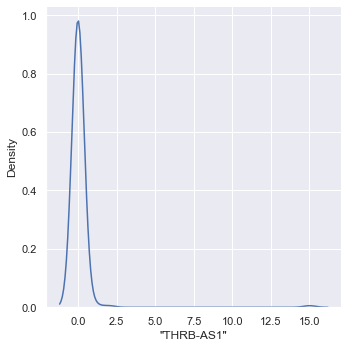

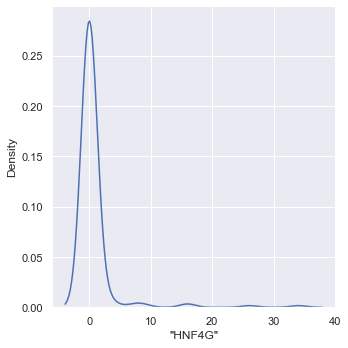

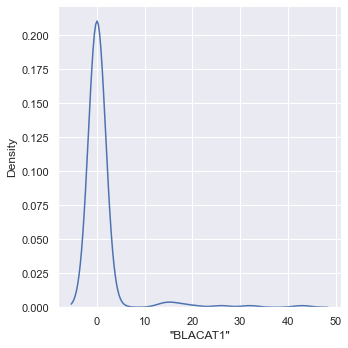

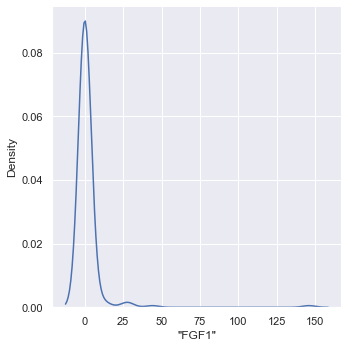

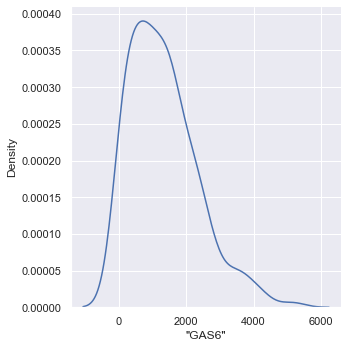

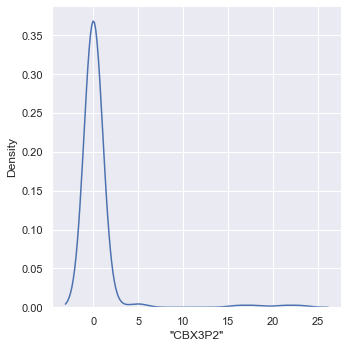

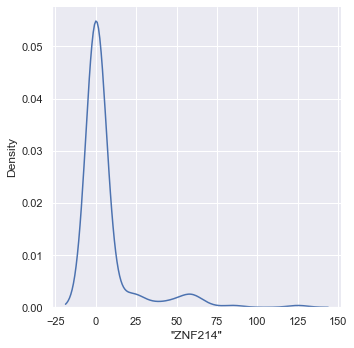

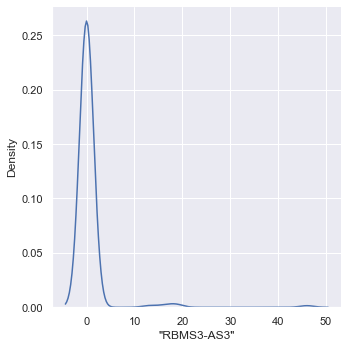

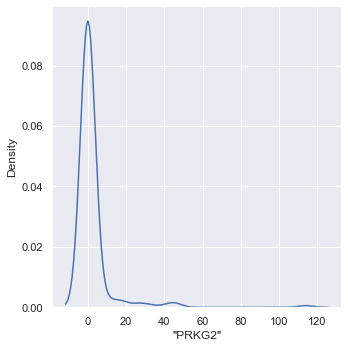

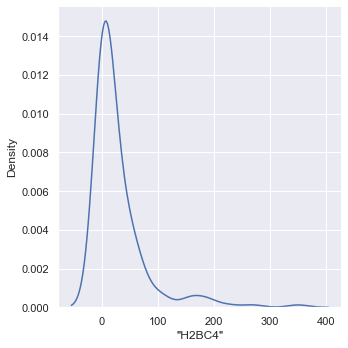

In [185]:
random_variable_indices = [randint(0, (HCC1806_train_T.shape[1]-1)) for i in range(0,10)]
print(random_variable_indices)
for i in random_variable_indices:
    sns.displot(
        HCC1806_train_T,
        x= HCC1806_train_T.columns.tolist()[i], 
        kind="kde"
    )

I am loading the test set and transposing it:

In [186]:
HCC1806_test = pd.read_csv("SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(HCC1806_test)) # 3000 expressions of different genes, 250 cells
print("First column: ", HCC1806_test.iloc[ : , 0])

Dataframe dimensions: (3000, 45)
First column:  "DDIT4"          0
"ANGPTL4"        0
"CALML5"         0
"KRT14"        169
"CCNB1"        233
              ... 
"LINC02693"     48
"OR8B9P"         0
"NEAT1"        118
"ZDHHC23"        6
"ODAD2"          0
Name: "1", Length: 3000, dtype: int64


In [187]:
HCC1806_test.head()

"1"   "2"   "3"   "4"    "5"   "6"    "7"  "8"   "9"  "10"  ...  \
"DDIT4"      0  2475  9088  6909  13655  7684  13038  640     3   542  ...   
"ANGPTL4"    0     0  2143  3086   2196  1619   1917    1     1    81  ...   
"CALML5"     0     0     0     0      0     6      0    0     0     0  ...   
"KRT14"    169     0     0   909      1    74    108    1  1794    99  ...   
"CCNB1"    233  3537   124    78      1     0    991  128   256   180  ...   

           "36"  "37"  "38"  "39"  "40"  "41"  "42"   "43"  "44"  "45"  
"DDIT4"    4968   301  2264   122  1845  3654   437  10496  1506  1035  
"ANGPTL4"  1634   153   127    47   643  1807     2      0   374     0  
"CALML5"    797     0     0     0     0     0  1526      1   635     0  
"KRT14"      53   745     0  1917     1     0  3143    643   349   998  
"CCNB1"      81  1647   732   380  3309   973    82      0    26  5161  

[5 rows x 45 columns]

In [188]:
HCC1806_test_T = HCC1806_test.T

### UL2/Dimensionality Reduction: HCC1806 Cell line -- 1. PCA 

First unsupervised learning technique we will use to find the hidden patterns in the data is PCA.

PCA is a dimensionality reduction technique which projects the data into a different vector space in the direction of the maximum variance:


We standardize each feature as usually applied for PCA analysis:

In [189]:
standardizer = StandardScaler()
HCC1806_train_T_S = standardizer.fit_transform(HCC1806_train_T)

In [190]:
HCC1806_train_T_S.shape

(182, 3000)

In [191]:
pd.DataFrame(HCC1806_train_T_S, columns=HCC1806_train_T.columns.tolist()).describe().round(2)

"DDIT4"  "ANGPTL4"  "CALML5"  "KRT14"  "CCNB1"  "IGFBP3"  "AKR1C2"  \
count   182.00     182.00    182.00   182.00   182.00    182.00    182.00   
mean     -0.00      -0.00      0.00     0.00     0.00      0.00     -0.00   
std       1.00       1.00      1.00     1.00     1.00      1.00      1.00   
min      -0.97      -0.63     -0.45    -0.39    -0.69     -0.45     -0.55   
25%      -0.90      -0.63     -0.45    -0.38    -0.64     -0.42     -0.49   
50%      -0.32      -0.48     -0.45    -0.25    -0.45     -0.36     -0.36   
75%       0.70       0.32      0.08     0.05     0.10     -0.04      0.02   
max       3.05       6.59      5.75    11.66     4.78      7.24      7.30   

       "KRT6A"  "NDRG1"  "KRT4"  ...  "MST1R"  "ZYG11A"  "NRG1"  "RBMS3"  \
count   182.00   182.00  182.00  ...   182.00    182.00  182.00   182.00   
mean     -0.00     0.00    0.00  ...     0.00     -0.00    0.00    -0.00   
std       1.00     1.00    1.00  ...     1.00      1.00    1.00     1.00   
min      -0.47    -0.73   -0.26  ...    -1.04     -0.36   -0.95    -0.33   
25%      -0.38    -0.73   -0.26  ...    -0.81     -0.36   -0.70    -0.33   
50%      -0.27    -0.50   -0.26  ...    -0.21     -0.36   -0.29    -0.33   
75%       0.01     0.37   -0.26  ...     0.52     -0.36    0.36    -0.05   
max      10.87     4.63    6.18  ...     5.28      5.42    4.86    10.95   

       "VCPIP1"  "LINC02693"  "OR8B9P"  "NEAT1"  "ZDHHC23"  "ODAD2"  
count    182.00       182.00    182.00   182.00     182.00   182.00  
mean       0.00        -0.00      0.00     0.00       0.00     0.00  
std        1.00         1.00      1.00     1.00       1.00     1.00  
min       -0.46        -0.66     -0.15    -0.72      -0.43    -0.25  
25%       -0.46        -0.66     -0.15    -0.55      -0.43    -0.25  
50%       -0.17        -0.27     -0.15    -0.32      -0.43    -0.25  
75%        0.14         0.13     -0.15     0.11      -0.03    -0.25  
max       12.04         6.47     10.25     6.15       7.42     7.43  

[8 rows x 3000 columns]

Now that our data set 0 mean and unit variance, we can apply PCA transformation.

We are not indicating the number of components, according to the documentation, since the max number of samples is less than the number of features, the PCA algorithm of sklearn will give us components as many as the number of samples.

We will do analyses later on to understand the relationship between the information in the dataset and the optimal number of components to use:

In [192]:
pca_HCC1806 = PCA(random_state=101)
HCC1806_train_T_S_PCA = pca_HCC1806.fit_transform(HCC1806_train_T_S)
explained_variance_HCC1806 = pca_HCC1806.explained_variance_ratio_
cumulative_sum_variance2 = np.cumsum(explained_variance_HCC1806)

We plot the cumulative variance of the first then principal components:

Text(0, 0.5, 'cumulative variance')

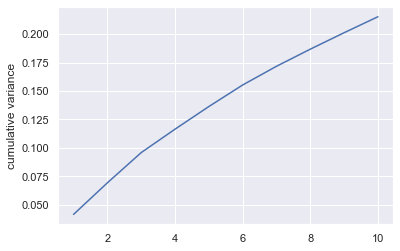

In [193]:
plt.plot(np.arange(1,11,1), cumulative_sum_variance2[0:10])
plt.ylabel('cumulative variance')

The first ten principal components explain 24% of variance of the dataset. If we use only the first two principal components, alone they are able to reflect less than 7% of the total variance. Including the third component brings only 3% more information.

Text(0, 0.5, 'cumulative variance')

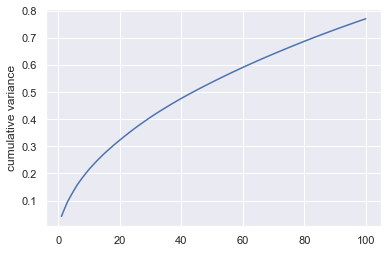

In [194]:
plt.plot(np.arange(1,101,1), cumulative_sum_variance2[0:100])
plt.ylabel('cumulative variance')

We need to use 100 components to account for 80% of the variance in the data. Given that we have 3000 features initally, it can be a good comparison to use only one third of the features.

For this exercise, we can plot Hypoxia cells and No Hypoxia cells using the two principal components:

In [195]:
Y_train2 = HCC1806_train_T.reset_index()['index'].apply(lambda x_str: 1 if 'Hypo' in x_str else 0)

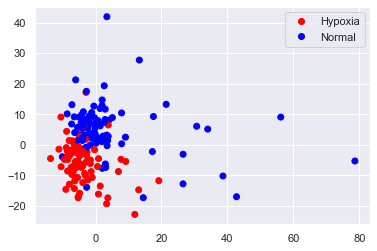

In [196]:
plt.figure()
plot = plt.scatter(HCC1806_train_T_S_PCA[:,0], HCC1806_train_T_S_PCA[:,1], c=Y_train2, cmap="bwr_r")
plt.legend(handles=plot.legend_elements()[0], labels=["Hypoxia","Normal"])
plt.show()

PCA with two components do not separate the data well enough, worse than its performance with the data of the other cell line.

We apply the PCA transformer to the test set:

C:\Users\anili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


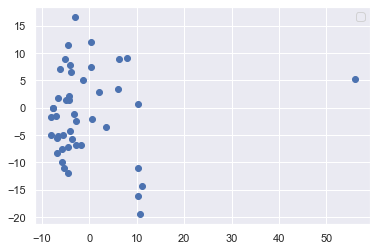

In [197]:
HCC1806_test_T_S = standardizer.transform(HCC1806_test_T)
HCC1806_test_T_S_PCA = pca_HCC1806.transform(HCC1806_test_T_S)

plt.figure()
plot = plt.scatter(HCC1806_test_T_S_PCA[:,0], HCC1806_test_T_S_PCA[:,1])
plt.legend(handles=plot.legend_elements()[0])
plt.show()

There are no well defined clusters observed in the test data. 

Let's try again with reducing the train data into three components: 

In [198]:
pca_HCC1806 = PCA(n_components=3)
principalComponents = pca_HCC1806.fit_transform(HCC1806_train_T_S)

<Figure size 432x288 with 0 Axes>

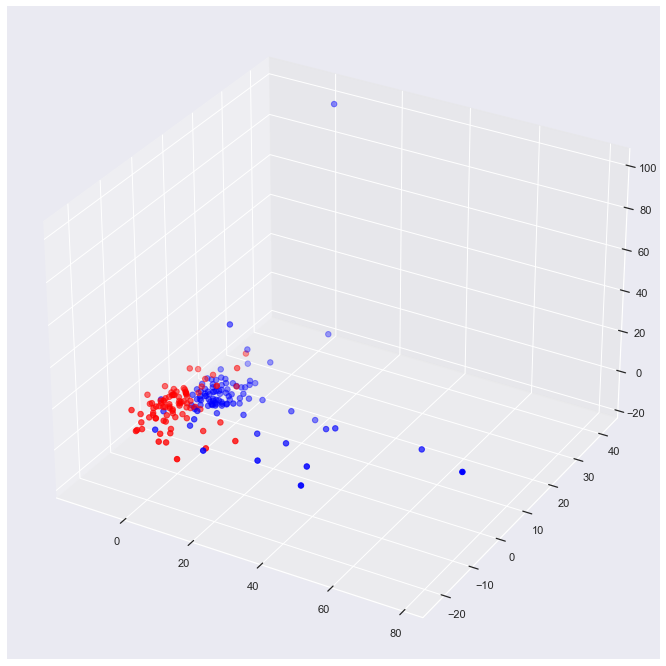

In [199]:
plt.figure()
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(principalComponents[:,0],principalComponents[:,1], principalComponents[:,2], c =Y_train2, cmap="bwr_r", s = 30)
plt.show()

Also with tree components, it is still not enough for us to be able to indentify two different clusters. The third dimension did not add much information. 

### UL2/Dimensionality Reduction: HCC1806 Cell line -- 2. T SNE (T-distributed Stochastic Neighbor Embedding)

As a second dimensionality reduction method, we will try T-SNE algorithm. T-SNE works well on sets with non-linear variance. It tries to maximize the distance between the probability distributions of similar and dissimilar observations.

In [200]:
tsne_HCC1806 = TSNE(random_state=101)
HCC1806_train_T_S_tsne = tsne_HCC1806.fit_transform(HCC1806_train_T_S)

In [201]:
HCC1806_train_T_S_tsne.shape

(182, 2)

We obtain only 2 components. 

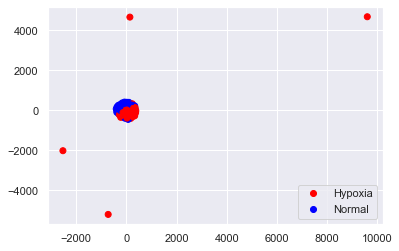

In [202]:
plt.figure()
plot = plt.scatter(HCC1806_train_T_S_tsne[:,0], HCC1806_train_T_S_tsne[:,1], c=Y_train2, cmap="bwr_r")
plt.legend(handles=plot.legend_elements()[0], labels=["Hypoxia","Normal"])
plt.show()

The conditions are not separable from each other with TSNE solution. We try with three components:

In [203]:
tsne_HCC1806 = TSNE(n_components=3)
principalComponents = tsne_HCC1806.fit_transform(HCC1806_train_T_S)

In [204]:
principalComponents.shape

(182, 3)

<Figure size 432x288 with 0 Axes>

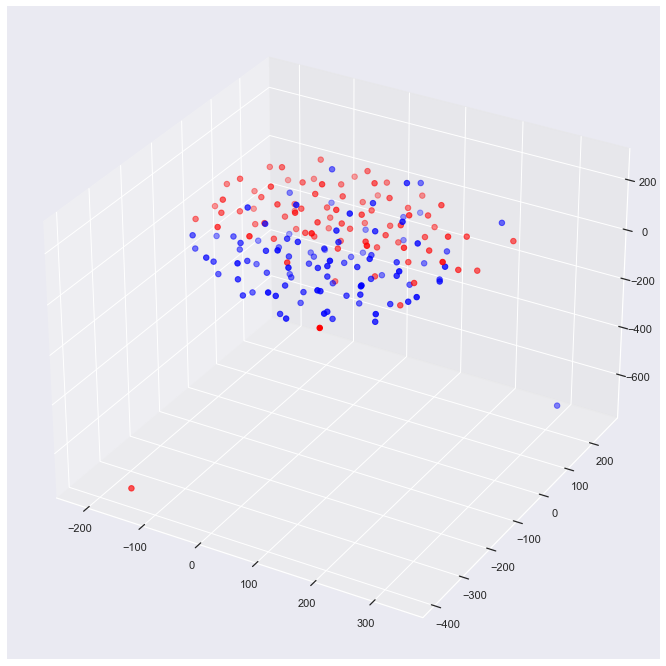

In [205]:
plt.figure()
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(principalComponents[:,0],principalComponents[:,1], principalComponents[:,2], c=Y_train2, cmap="bwr_r", s=30)
plt.show()

Neither the solution in 3d works well. 

#### Comparison betweeen dimensionality reduction methods

If we compare the two methods, TSNE works less well for HCC1806 data. 

### UL2/Clustering: HCC1806 Cell line -- Kmeans

We can use our pca or tsne transformed dataset to find the clusters with Kmeans algorithm. We used these trasformed dataset to help the algorithm, otherwise we can use the not transformed dataset as well and we tried that way too. 

- Kmeans initalizes random n centroids.
- Assigns the nearest observations to that cluster. 
- Calculates the new cluster centroids and iteratively repeats the procedure until some metric is minimized. 

The metric that is minimized usually is called inertia: it is the sum of squared distance of samples to their closest cluster centroid. 

#### A. Kmeans on PCA transformed data: 

We choose the use 3 components in PCA to transform the data (there is little difference between 2 and 3 as we explained above):

In [206]:
pca_HCC1806_final = PCA(n_components=3, random_state=101)
HCC1806_train_T_S_PCA3 = pca_HCC1806_final.fit_transform(HCC1806_train_T_S)

pca_HCC1806_final2 = PCA(n_components=2, random_state=101)
HCC1806_train_T_S_PCA2 = pca_HCC1806_final2.fit_transform(HCC1806_train_T_S)

We calculate intertia for Kmeans from 1 to 10 clusters:

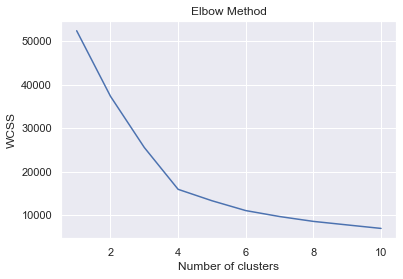

In [207]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(HCC1806_train_T_S_PCA3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

There is a break point when the number of clusters equal to 4. 

We train a Kmeans algorithm to obtain 4 clusters. Then we visualize in 2D the clusters centers with different components of the data to explore if a there is good separation indicated in one of them:

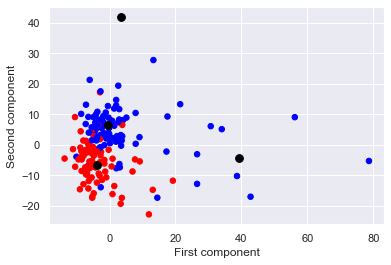

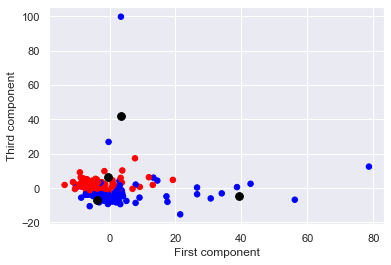

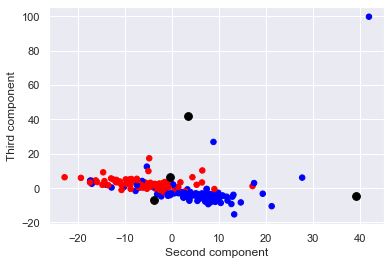

In [208]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(HCC1806_train_T_S_PCA3)

#ax = plt.figure(figsize=(9,9)).add_subplot(projection='3d')
plt.scatter(HCC1806_train_T_S_PCA3[:,0], HCC1806_train_T_S_PCA3[:,1], c=Y_train2, cmap="bwr_r", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, c='black')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.show()


plt.scatter(HCC1806_train_T_S_PCA3[:,0], HCC1806_train_T_S_PCA3[:,2], c=Y_train2, cmap="bwr_r", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, c='black')
plt.xlabel('First component')
plt.ylabel('Third component')
plt.show()

plt.scatter(HCC1806_train_T_S_PCA3[:,1], HCC1806_train_T_S_PCA3[:,2], c=Y_train2, cmap="bwr_r", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, c='black')
plt.xlabel('Second component')
plt.ylabel('Third component')
plt.show()




With standardized and PCA transformed dataset of cell type HCC1806, kmeans does not give good result. 

#### B. Kmeans on TSNE transformed data: 

We apply the same to the TSNE transformed data:

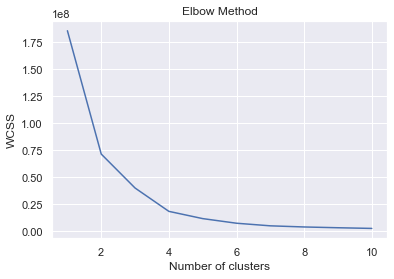

In [209]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(HCC1806_train_T_S_tsne)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



2 clusters minimize inertia a lot as there is an inital bend. We try the solution with 2 clusters:

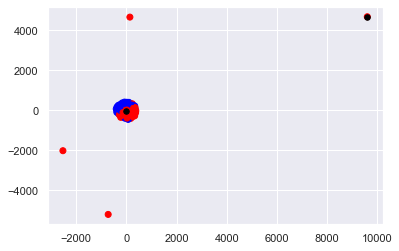

In [210]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(HCC1806_train_T_S_tsne)
plt.scatter(HCC1806_train_T_S_tsne[:,0], HCC1806_train_T_S_tsne[:,1], c=Y_train2, cmap="bwr_r")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c='black')
plt.show()

This solution is not able to cluster the data into separate groups of oxygen condition. In red and in blue we display Hypoxia and Normal conditions (the truth of the dataset) and in black we represent the found cluster centoids which DO NOT match with the truth of the dataset.

#### C. Kmeans on the original data: 

We apply the same to the standardized original dataset:

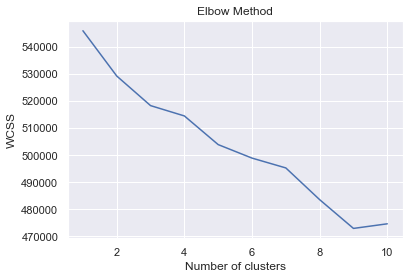

In [211]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(HCC1806_train_T_S)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We try a solution with 2 clusters. We tried a bunch of pair of features to visualize:

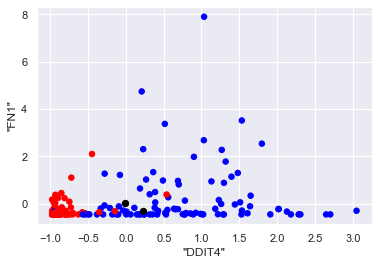

In [212]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(HCC1806_train_T_S)
#ax = plt.figure(figsize=(9,9)).add_subplot(projection='3d')
plt.scatter(HCC1806_train_T_S[:,0], HCC1806_train_T_S[:,10],c=Y_train2, cmap="bwr_r", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=40, c='black')
plt.xlabel(HCC1806_train_T.columns.tolist()[0])
plt.ylabel(HCC1806_train_T.columns.tolist()[10])
plt.show()

2 clusters solution do not work well. We try with 3 dimensions:

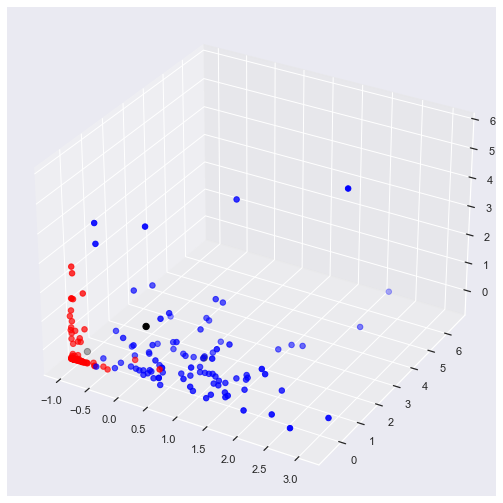

In [213]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(HCC1806_train_T_S)
ax = plt.figure(figsize=(9,9)).add_subplot(projection='3d')
ax.scatter(HCC1806_train_T_S[:,0], HCC1806_train_T_S[:,1], HCC1806_train_T_S[:,2], c=Y_train2, cmap="bwr_r", s=30)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=40, c='black')
plt.show()

As these do not work well, we try with the original data not standardized. 
We plot the first and third features. The cluster centers are too close to each other: 

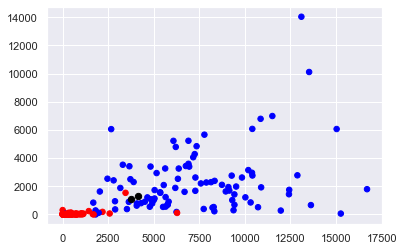

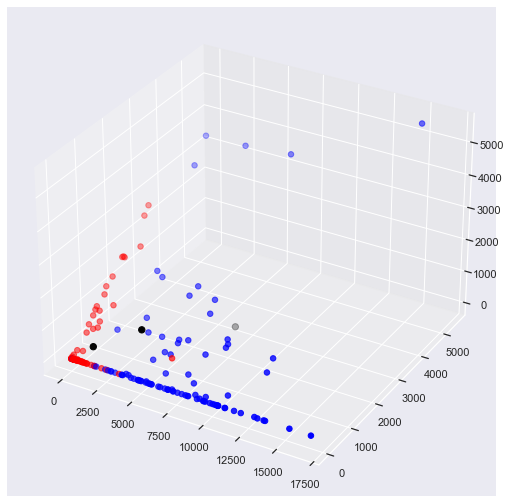

In [214]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(HCC1806_train_T)
plt.scatter(HCC1806_train_T.to_numpy()[:,0], HCC1806_train_T.to_numpy()[:,1], c=Y_train2, cmap="bwr_r", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=40)
plt.show()

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(HCC1806_train_T)
ax = plt.figure(figsize=(9,9)).add_subplot(projection='3d')
ax.scatter(HCC1806_train_T.to_numpy()[:,0], HCC1806_train_T.to_numpy()[:,2], HCC1806_train_T.to_numpy()[:,2], c=Y_train2, cmap="bwr_r", s=30)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='black', s=40)
plt.show()


We obtained bad results with the origial dataset 


It is better to use standardization and dimension reduction, and do clustering on the dataset that is projected on the essential dimensions found.

#### Conclusion: 

Unlike the dataset of MCF1806, for the dataset HC1806 PCA worked better than the kmeans and TSNE techniques to separate the data into two clusters according to Hypnoxia conditions. 

--------- Memory Cleaning Start ---------

In [215]:
alldfs = [var for var in dir() if isinstance(eval(var), pd.core.frame.DataFrame)]

print(alldfs) # df1, df2

for df_elem in alldfs:
    if df_elem not in ['mcf7_train_T', 'mcf7_train_T_S', 'Y_train', 'HCC1806_train_T', 'HCC1806_train_T_S', 'Y_train']:
        exec('del ' + df_elem)
    
gc.collect()

['HCC1806_test', 'HCC1806_test_T', 'HCC1806_train', 'HCC1806_train_T', '_181', '_183', '_184', '_187', '_191', 'mcf7_train_T']


26297

--------- Memory Cleaning End ---------

## Supervised learning: SmartSeq for MCF7 & HCC1806 lines 

We will answer the questionsasked on the report template:
- The first task could be to develop a classifier in each cell type using one or more ML appraoches: 
For each cell type, we will build 3 different classfiers: Logistics Regression, Random Forest and Perceptron.

- We will use PCA reduced data. As we explained above 100 components were enough to cover 70%-80% of the whole set. Using 3000 features may not be optimal as we only have 250 observations in one dataset and 182 in the other one. More features require more data. 

- Could you apply some feature selection? How will you apply it?: We apply feature selection by considering the first 100 principal components. 

In [216]:
print(HCC1806_train_T.shape)
print(Y_train2.shape)
print('Hypoxia condition percentage in HCC1806:', Y_train2[Y_train2 == 1].sum()/len(Y_train2))

(182, 3000)
(182,)
Hypoxia condition percentage in HCC1806: 0.532967032967033


In [217]:
print(mcf7_train_T.shape)
print(Y_train.shape)
print('Hypoxia condition percentage in MCF7:', Y_train[Y_train == 1].sum()/len(Y_train))

(250, 3000)
(250,)
Hypoxia condition percentage in MCF7: 0.496


#### Feature Selection: PCA transformation

In [218]:
pca_mcf7 = PCA(random_state=101, n_components=100)
mcf7_train_T_S_PCA100 = pca_mcf7.fit_transform(mcf7_train_T_S)

pca_hcc1806 = PCA(random_state=101, n_components=100)
hcc1806_train_T_S_PCA100 = pca_hcc1806.fit_transform(HCC1806_train_T_S)                                            

### Supervised Learning Preparation:

In [219]:
print(hcc1806_train_T_S_PCA100.shape)
print(Y_train2.shape)

print(mcf7_train_T_S_PCA100.shape)
print(Y_train.shape)

(182, 100)
(182,)
(250, 100)
(250,)


### SL1: Random Forest

For both cell lines, we fit a Random Forest model. We find the best Random Forest model to fit using cross validation scores of the grid search. 

For each combination of values defined in the parameter dictionary, the best model is the one that performs better on average across 3 folds. We do not do more than 3 folds becase we do not have a lot of samples in the dataset. 

In [220]:
from sklearn.ensemble import RandomForestClassifier

model_RF=RandomForestClassifier(random_state=42)
dict_params_RF = {
    "n_estimators" : [1,2],
    "criterion" :("gini", "entropy"),
    "max_depth": [2,3],
    "min_samples_split" : [5,],
    "max_features": ("sqrt", "log2")
    
}

### RF model MCF7 ###
grid_RF_mcf7=GridSearchCV(model_RF, dict_params_RF)
grid_RF_mcf7.fit(mcf7_train_T_S_PCA100, Y_train)

cv_scores_RF_mcf7 = cross_val_score(grid_RF_mcf7, mcf7_train_T_S_PCA100, Y_train, cv=3, scoring='accuracy')

### RF model HCC1806 ###
grid_RF_hcc1806=GridSearchCV(model_RF, dict_params_RF)
grid_RF_hcc1806.fit(hcc1806_train_T_S_PCA100, Y_train2)
cv_scores_RF_hcc1806 = cross_val_score(grid_RF_hcc1806, hcc1806_train_T_S_PCA100, Y_train2, cv=3, scoring='accuracy')

In [221]:
print('Results Random Forest Model MCF7 cell')
print('*'*30)
print(cv_scores_RF_mcf7)
print('Average Performance:', cv_scores_RF_mcf7.mean())
print(cv_scores_RF_mcf7.std())
print('-'*30)
print('Results Random Forest Model HCC1806 cell')
print('*'*30)
print(cv_scores_RF_hcc1806)
print('Average Performance:', cv_scores_RF_hcc1806.mean())
print(cv_scores_RF_hcc1806.std())

Results Random Forest Model MCF7 cell
******************************
[0.89285714 0.81927711 0.56626506]
Average Performance: 0.7594664371772805
0.1398775283453446
------------------------------
Results Random Forest Model HCC1806 cell
******************************
[0.81967213 0.73770492 0.76666667]
Average Performance: 0.7746812386156648
0.033939466005366375


Random Forest  model has better auracy for HCC1806 (77%) than for MCF7 (76%). The cross-validation scores have less std for HCC1806 (a more stable performance across folds for this cell type). 

In [222]:
print('Best  Random Forest Model obtained for MCF7 cell')
print('*'*30)
print(grid_RF_mcf7.best_params_)
print('-'*30)
print('Best  Random Forest Model obtained for MCF7 cell')
print('*'*30)
print(grid_RF_hcc1806.best_params_)


Best  Random Forest Model obtained for MCF7 cell
******************************
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 2}
------------------------------
Best  Random Forest Model obtained for MCF7 cell
******************************
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 2}


The best models obtained have the same hyperparameters for both cell types. We fit this model:

In [223]:
model_RF_best =RandomForestClassifier(
    random_state=42,
    criterion=grid_RF_mcf7.best_params_['criterion'],
    max_depth=grid_RF_mcf7.best_params_['max_depth'],
    max_features=grid_RF_mcf7.best_params_['max_features'],
    min_samples_split=grid_RF_mcf7.best_params_['min_samples_split'],
    n_estimators=grid_RF_mcf7.best_params_['n_estimators'],   
)

model_RF_best_mcf7 = model_RF_best.fit(mcf7_train_T_S_PCA100, Y_train)
model_RF_best_hcc1806 = model_RF_best.fit(hcc1806_train_T_S_PCA100, Y_train2)

### SL2: LR

For both cell lines, we fit a Logistic Regression model. We find the best Logistic Regression model to fit using cross validation scores of the grid search.
For each combination of values defined in the parameter dictionary, the best model is the one that performs better on average across 3 folds. We do not do more than 3 folds becase we do not have a lot of samples in the dataset.

In [224]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression(random_state=42)
dict_params_LR = {
    "C" : [0.5, 1, 2, 5, 10],
    "solver" :("newton-cg", "lbfgs", "liblinear"),
    "multi_class": ("auto", "ovr"),

}

### LR model MCF7 ###
grid_LR_mcf7 = GridSearchCV(model_LR, dict_params_LR)
grid_LR_mcf7.fit(mcf7_train_T_S_PCA100, Y_train)
cv_scores_LR_mcf7 = cross_val_score(grid_LR_mcf7, mcf7_train_T_S_PCA100, Y_train, cv=3, scoring='accuracy')

### LR model HCC1806 ###
grid_LR_hcc1806=GridSearchCV(model_LR, dict_params_LR)
grid_LR_hcc1806.fit(hcc1806_train_T_S_PCA100, Y_train2)
cv_scores_LR_hcc1806 = cross_val_score(grid_LR_hcc1806, hcc1806_train_T_S_PCA100, Y_train2, cv=3, scoring='accuracy')


In [225]:
print('Results Logistic Regression Model MCF7 cell')
print('*'*30)
print(cv_scores_LR_mcf7)
print('Average Performance:', cv_scores_LR_mcf7.mean())
print(cv_scores_LR_mcf7.std())
print('-'*30)
print('Results Logistic Regression Model HCC1806 cell')
print('*'*30)
print(cv_scores_LR_hcc1806)
print('Average Performance:', cv_scores_LR_hcc1806.mean())
print(cv_scores_LR_hcc1806.std())

Results Logistic Regression Model MCF7 cell
******************************
[1. 1. 1.]
Average Performance: 1.0
0.0
------------------------------
Results Logistic Regression Model HCC1806 cell
******************************
[0.95081967 0.95081967 0.96666667]
Average Performance: 0.9561020036429873
0.007470344864994521


Logistic Regression model predicts Hypoxia condition better for MCF7 cell line than for HCC1802 (100% of accuracy vs 95% and 0 std of performance vs 0.01 std of performance). Logistic regression worked better than Random Forest models for both of the cell lines.

In [226]:
print('Best Logistic Regression Model obtained for MCF7 cell')
print('*'*30)
print(grid_LR_mcf7.best_params_)
print('-'*30)
print('Best Logistic Regression Model obtained for HCC1806 cell')
print('*'*30)
print(grid_LR_hcc1806.best_params_)

Best Logistic Regression Model obtained for MCF7 cell
******************************
{'C': 0.5, 'multi_class': 'auto', 'solver': 'newton-cg'}
------------------------------
Best Logistic Regression Model obtained for HCC1806 cell
******************************
{'C': 0.5, 'multi_class': 'auto', 'solver': 'newton-cg'}


Again, the best models obtained have the same hyperparameters for both cell types. We fit this model:

In [227]:
model_LR_best_mcf7 =LogisticRegression(
    random_state=42,
    C=grid_LR_mcf7.best_params_['C'],
    multi_class=grid_LR_mcf7.best_params_['multi_class'],
    solver=grid_LR_mcf7.best_params_['solver'],   
)

model_LR_best_hcc1806 =LogisticRegression(
    random_state=42,
    C=grid_LR_hcc1806.best_params_['C'],
    multi_class=grid_LR_hcc1806.best_params_['multi_class'],
    solver=grid_LR_hcc1806.best_params_['solver'],   
)

model_LR_best_mcf7 = model_LR_best_mcf7.fit(mcf7_train_T_S_PCA100, Y_train)
model_LR_best_hcc1806 = model_LR_best_hcc1806.fit(hcc1806_train_T_S_PCA100, Y_train2)

### SL3: Perceptron

For both cell lines, we fit a Perceptron model. We find the best Perceptron model to fit using cross validation scores of the grid search.
For each combination of values defined in the parameter dictionary, the best model is the one that performs better on average across 3 folds. We do not do more than 3 folds becase we do not have a lot of samples in the dataset.

In [228]:
from sklearn.linear_model import Perceptron
model_P=Perceptron(random_state=42)
dict_params_P= {
    "penalty" : ("l2", "l1", "elasticnet", "None"),
    "alpha" :[0.0001, 0.001, 0.01],
    "eta0": [0.5, 1, 2, 5],
}

### P model MCF7 ###
grid_P_mcf7 = GridSearchCV(model_P, dict_params_P)
grid_P_mcf7.fit(mcf7_train_T_S_PCA100, Y_train)
cv_scores_P_mcf7 = cross_val_score(grid_P_mcf7, mcf7_train_T_S_PCA100, Y_train, cv=3, scoring='accuracy')

###P model HCC1806 ###
grid_P_hcc1806=GridSearchCV(model_P, dict_params_P)
grid_P_hcc1806.fit(hcc1806_train_T_S_PCA100, Y_train2)
cv_scores_P_hcc1806 = cross_val_score(grid_P_hcc1806, hcc1806_train_T_S_PCA100, Y_train2, cv=3, scoring='accuracy')


In [229]:
print('Results Perceptron Model MCF7 cell')
print('*'*30)
print(cv_scores_P_mcf7)
print('Average Performance:', cv_scores_P_mcf7.mean())
print(cv_scores_P_mcf7.std())
print('-'*30)
print('Results Perceptron Model HCC1806 cell')
print('*'*30)
print(cv_scores_P_hcc1806)
print('Average Performance:', cv_scores_P_hcc1806.mean())
print(cv_scores_P_hcc1806.std())

Results Perceptron Model MCF7 cell
******************************
[0.98809524 0.97590361 0.98795181]
Average Performance: 0.9839835532606617
0.005713679573121927
------------------------------
Results Perceptron Model HCC1806 cell
******************************
[0.8852459  0.93442623 0.93333333]
Average Performance: 0.9176684881602913
0.022930571922559168


Perceptron model predicts Hypoxia condition much better for MCF7 cell line than for HCC1806 (98% of accuracy vs 92% and 0.005 std of performance vs 0.02 std of performance). 

Perceptron worked better than Random Forest models, but worked worse than Logistic Regression for both MCF7 and HCC1802 cell lines.

In [230]:
print('Best Perceptron Model obtained for MCF7 cell')
print('*'*30)
print(grid_P_mcf7.best_params_)
print('-'*30)
print('Best Perceptron Model obtained for HCC1806 cell')
print('*'*30)
print(grid_P_hcc1806.best_params_)

Best Perceptron Model obtained for MCF7 cell
******************************
{'alpha': 0.0001, 'eta0': 0.5, 'penalty': 'l2'}
------------------------------
Best Perceptron Model obtained for HCC1806 cell
******************************
{'alpha': 0.01, 'eta0': 0.5, 'penalty': 'l1'}


Again, the best models obtained have the same hyperparameters for both cell types. We fit this model:

In [231]:
model_P_best_m =Perceptron(
    random_state=42,
    alpha=grid_P_mcf7.best_params_['alpha'],
    eta0=grid_P_mcf7.best_params_['eta0'],
    penalty=grid_P_mcf7.best_params_['penalty'],   
)

model_P_best_mcf7 = model_P_best_m.fit(mcf7_train_T_S_PCA100, Y_train)


model_P_best_h =Perceptron(
    random_state=42,
    alpha=grid_P_hcc1806.best_params_['alpha'],
    eta0=grid_P_hcc1806.best_params_['eta0'],
    penalty=grid_P_hcc1806.best_params_['penalty'],   
)

model_P_best_hcc1806 = model_P_best_h.fit(hcc1806_train_T_S_PCA100, Y_train2)

### Comparison of SL models for the data collected with SmartSeq

If we consider the cross validation scores, the best model for both cell types is Logistic Regression:

In [232]:
perf_cv_summary =[{
    'Cell': 'hcc1806',
    'Perceptron_mean_perf':cv_scores_P_hcc1806.mean(),
    'LR_mean_perf':cv_scores_LR_hcc1806.mean(),
    'RF_mean_perf':cv_scores_RF_hcc1806.mean(),
    'Perceptron_std_perf':cv_scores_P_hcc1806.std(),
    'LR_std_perf':cv_scores_LR_hcc1806.std(),
    'RF_std_perf':cv_scores_RF_hcc1806.std()
},{
    'Cell': 'mcf7',
    'Perceptron_mean_perf':cv_scores_P_mcf7.mean(),
    'LR_mean_perf':cv_scores_LR_mcf7.mean(),
    'RF_mean_perf':cv_scores_RF_mcf7.mean(),
    'Perceptron_std_perf':cv_scores_P_mcf7.std(),
    'LR_std_perf':cv_scores_LR_mcf7.std(),
    'RF_std_perf':cv_scores_RF_mcf7.std()
}
]


In [233]:
pd.DataFrame.from_dict(perf_cv_summary)
#pd.DataFrame.from_records(perf_cv_summary)

Cell  Perceptron_mean_perf  LR_mean_perf  RF_mean_perf  \
0  hcc1806              0.917668      0.956102      0.774681   
1     mcf7              0.983984      1.000000      0.759466   

   Perceptron_std_perf  LR_std_perf  RF_std_perf  
0             0.022931      0.00747     0.033939  
1             0.005714      0.00000     0.139878

--------- Memory Cleaning ------- START 

In [234]:
alldfs = [var for var in dir() if isinstance(eval(var), pd.core.frame.DataFrame)]

print(alldfs) # df1, df2

['HCC1806_train_T', '_', '_233', 'mcf7_train_T']


--------- Memory Cleaning ------- END

You could test the classifier as predictor in a cell type where it was not developed. Does it predict well?
As asked in the report template, we  predict the oxygen condition in one dataset using the model built for the other dataset: 


In [235]:
print('Score on mcf7 using the model for hcc1806:', model_LR_best_hcc1806.score(mcf7_train_T_S_PCA100, Y_train))

Score on mcf7 using the model for hcc1806: 0.764


In [236]:
print('Score on hcc1806 using the model for mcf7:', model_LR_best_mcf7.score(hcc1806_train_T_S_PCA100, Y_train2))

Score on hcc1806 using the model for mcf7: 0.5934065934065934


The model built for MCF7 works better than a random model on HCC1806 data (accuracy is more than 0.5), but the opposite is not true!

### Test Set Predictions 

In [237]:
mcf7_test = pd.read_csv("SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(mcf7_test)) # 3000 expressions of different genes, 250 cells
print("First column: ", mcf7_test.iloc[ : , 0])

HCC1806_test = pd.read_csv("SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(HCC1806_test)) # 3000 expressions of different genes, 250 cells
print("First column: ", HCC1806_test.iloc[ : , 0])

Dataframe dimensions: (3000, 63)
First column:  "CYP1B1"         492
"CYP1B1-AS1"     253
"CYP1A1"           0
"NDRG1"         1157
"DDIT4"         6805
                ... 
"GRIK5"            0
"SLC25A27"         0
"DENND5A"        285
"CDK5R1"           0
"FAM13A-AS1"       1
Name: "1", Length: 3000, dtype: int64
Dataframe dimensions: (3000, 45)
First column:  "DDIT4"          0
"ANGPTL4"        0
"CALML5"         0
"KRT14"        169
"CCNB1"        233
              ... 
"LINC02693"     48
"OR8B9P"         0
"NEAT1"        118
"ZDHHC23"        6
"ODAD2"          0
Name: "1", Length: 3000, dtype: int64


In [238]:
standardizer = StandardScaler()
standardizer.fit_transform(mcf7_train_T)
mcf7_test_T_S = standardizer.transform(mcf7_test.T)
mcf7_test_T_S_PCA100 = pca_mcf7.transform(mcf7_test_T_S)

standardizer = StandardScaler()
standardizer.fit_transform(HCC1806_train_T)
hcc1806_test_T_S = standardizer.transform(HCC1806_test.T)
hcc1806_test_T_S_PCA100 = pca_hcc1806.transform(hcc1806_test_T_S) 

In [239]:
standardizer = StandardScaler()
standardizer.fit_transform(mcf7_train_T)
mcf7_test_T_S = standardizer.transform(mcf7_test.T)
mcf7_test_T_S_PCA100 = pca_mcf7.transform(mcf7_test_T_S)

standardizer = StandardScaler()
standardizer.fit_transform(HCC1806_train_T)
hcc1806_test_T_S = standardizer.transform(HCC1806_test.T)
hcc1806_test_T_S_PCA100 = pca_hcc1806.transform(hcc1806_test_T_S)    

In [240]:
prediction_mcf7 = model_LR_best_mcf7.predict(mcf7_test_T_S_PCA100)
prediction_hcc1806 = model_LR_best_hcc1806.predict(hcc1806_test_T_S_PCA100)

In [241]:
mcf7_test_T = mcf7_test.T
mcf7_test_T['prediction'] = prediction_mcf7 


In [242]:
hcc1806_test_T = HCC1806_test.T
hcc1806_test_T['prediction'] = prediction_hcc1806

We save our predictions into separate files as requested. The precitions are under the prediction column: 

In [243]:
hcc1806_test_T[['prediction']].to_csv('hcc1806_test_T_SmartSeq.csv', sep ='\t')

In [244]:
mcf7_test_T[['prediction']].to_csv('mcf7_test_T_SmartSeq.csv', sep ='\t')

### One single model for both cell types

We build one model by concatenating the datasets of two cell types. 
We apply the same stepsof standardization and PCA transformation to the entire set.

In [245]:
smartSeq_entireSet_T = np.concatenate([mcf7_train_T, HCC1806_train_T])
standardizer = StandardScaler()
smartSeq_entireSet_T_S = standardizer.fit_transform(smartSeq_entireSet_T)

pca_all = PCA(random_state=101, n_components=100)
all_PCA100 = pca_all.fit_transform(smartSeq_entireSet_T_S)

In [246]:
smartSeq_Y = np.concatenate([Y_train, Y_train2])

In [247]:
from sklearn.ensemble import RandomForestClassifier

model_RF=RandomForestClassifier(random_state=42)
dict_params_RF = {
    "n_estimators" : [1,2],
    "criterion" :("gini", "entropy"),
    "max_depth": [2,3],
    "min_samples_split" : [5,],
    "max_features": ("sqrt", "log2")
    
}

### RF model ###
grid_RF_all=GridSearchCV(model_RF, dict_params_RF)
grid_RF_all.fit(smartSeq_entireSet_T_S, smartSeq_Y)
cv_scores_RF_all = cross_val_score(grid_RF_all, smartSeq_entireSet_T_S, smartSeq_Y, cv=3, scoring='accuracy')

print('Best RF Model obtained for both MCF7 and HCC1806')
print('*'*30)
print(grid_RF_all.best_params_)


print('Results RF Model obtained for both MCF7 and HCC1806')
print('*'*30)
print(cv_scores_RF_all)
print('Average Performance:', cv_scores_RF_all.mean())
print('Std of Performance:', cv_scores_RF_all.std())


Best RF Model obtained for both MCF7 and HCC1806
******************************
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 2}
Results RF Model obtained for both MCF7 and HCC1806
******************************
[0.79861111 0.90277778 0.50694444]
Average Performance: 0.736111111111111
Std of Performance: 0.16753247335853916


RF model obtained for all the cells together has average performance of 0.73. This is lower than RF models of individual cell types.

In [248]:
from sklearn.linear_model import LogisticRegression

model_LR=LogisticRegression(random_state=42)
dict_params_LR = {
    "C" : [0.5, 1, 2, 5, 10],
    "solver" :("newton-cg", "lbfgs", "liblinear"),
    "multi_class": ("auto", "ovr"),    
}

### LR model ###
grid_LR_all=GridSearchCV(model_LR, dict_params_LR)
grid_LR_all.fit(smartSeq_entireSet_T_S, smartSeq_Y)
cv_scores_LR_all = cross_val_score(grid_LR_all, smartSeq_entireSet_T_S, smartSeq_Y, cv=3, scoring='accuracy')

print('Best LR Model obtained for both MCF7 and HCC1806')
print('*'*30)
print(grid_LR_all.best_params_)


print('Results LR Model obtained for both MCF7 and HCC1806')
print('*'*30)
print(cv_scores_LR_all)
print('Average Performance:', cv_scores_LR_all.mean())
print('Std of Performance:', cv_scores_LR_all.std())

Best LR Model obtained for both MCF7 and HCC1806
******************************
{'C': 0.5, 'multi_class': 'auto', 'solver': 'newton-cg'}
Results LR Model obtained for both MCF7 and HCC1806
******************************
[1.         0.98611111 0.95138889]
Average Performance: 0.9791666666666666
Std of Performance: 0.02044389089427745


LR model obtained for all the cells together has average performance of 0.98. This is the best model among our all models.

In [249]:
from sklearn.linear_model import Perceptron

model_P=Perceptron(random_state=42)
dict_params_P= {
    "penalty" : ("l2", "l1", "elasticnet", "None"),
    "alpha" :[0.0001, 0.001, 0.01],
    "eta0": [0.5, 1, 2, 5],
}


### P model ###
grid_P_all=GridSearchCV(model_P, dict_params_P)
grid_P_all.fit(smartSeq_entireSet_T_S, smartSeq_Y)
cv_scores_P_all = cross_val_score(grid_P_all, smartSeq_entireSet_T_S, smartSeq_Y, cv=3, scoring='accuracy')

print('Best P Model obtained for both MCF7 and HCC1806')
print('*'*30)
print(grid_P_all.best_params_)


print('Results P Model obtained for both MCF7 and HCC1806')
print('*'*30)
print(cv_scores_P_all)
print('Average Performance:', cv_scores_P_all.mean())
print('Std of Performance:', cv_scores_P_all.std())


Best P Model obtained for both MCF7 and HCC1806
******************************
{'alpha': 0.0001, 'eta0': 5, 'penalty': 'l2'}
Results P Model obtained for both MCF7 and HCC1806
******************************
[0.96527778 0.98611111 0.74305556]
Average Performance: 0.8981481481481483
Std of Performance: 0.10999633676404373


Perceptron model obtained for all the cells together has average performance of 0.89. This is lower than Perceptron models of individual cell types.

### One single model for DropSeq Technique

We build one model by concatenating the datasets of two cell types also for DropSeq. We apply the same steps of standardization and PCA transformation to the entire set.

In [250]:
mcf7_train_DropSeq = pd.read_csv("DropSeq/MCF7_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(mcf7_train_DropSeq)) # 3000 expressions of different genes, 250 cells
print("First column: ", mcf7_train_DropSeq.iloc[ : , 0])

HCC1806_train_DropSeq = pd.read_csv("DropSeq/HCC1806_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(HCC1806_train_DropSeq)) # 3000 expressions of different genes, 250 cells
print("First column: ", HCC1806_train_DropSeq.iloc[ : , 0])

Dataframe dimensions: (3000, 21626)
First column:  "MALAT1"       1
"MT-RNR2"      0
"NEAT1"        0
"H1-5"         0
"TFF1"         4
              ..
"BRWD1-AS2"    0
"RPS19BP1"     0
"AUNIP"        0
"TNK2"         0
"SUDS3"        0
Name: "AAAAACCTATCG_Normoxia", Length: 3000, dtype: int64
Dataframe dimensions: (3000, 14682)
First column:  "H1-5"       2
"MALAT1"     3
"MT-RNR2"    0
"ARVCF"      0
"BCYRN1"     0
            ..
"SCCPDH"     0
"NTAN1"      0
"CLIP2"      0
"DUSP23"     0
"ZNF682"     0
Name: "AAAAAACCCGGC_Normoxia", Length: 3000, dtype: int64


In [251]:
mcf7_train_T_DropSeq = mcf7_train_DropSeq.T
HCC1806_train_T_DropSeq = HCC1806_train_DropSeq.T

In [252]:
DropSeq_entireSet_T = np.concatenate([mcf7_train_T_DropSeq, HCC1806_train_T_DropSeq])
standardizer = StandardScaler()
DropSeq_entireSet_T_S = standardizer.fit_transform(DropSeq_entireSet_T)

pca_all_DropSeq = PCA(random_state=101, n_components=100)
all_PCA100_DropSeq = pca_all.fit_transform(DropSeq_entireSet_T_S)

In [253]:
Y_train_DropSeq = mcf7_train_T_DropSeq.reset_index()['index'].apply(lambda x_str: 1 if 'Hypo' in x_str else 0)
Y_train2_DropSeq = HCC1806_train_T_DropSeq.reset_index()['index'].apply(lambda x_str: 1 if 'Hypo' in x_str else 0)

In [254]:
DropSeq_Y = np.concatenate([Y_train_DropSeq, Y_train2_DropSeq])

In [255]:
from sklearn.ensemble import RandomForestClassifier

model_RF=RandomForestClassifier(random_state=42)
dict_params_RF = {
    "n_estimators" : [1,2],
    "criterion" :("gini", "entropy"),
    
    "max_depth": [2,3],
    "min_samples_split" : [5,],
    "max_features": ("sqrt", "log2")
    
}

### RF model ###
grid_RF_all_DropSeq=GridSearchCV(model_RF, dict_params_RF)
grid_RF_all_DropSeq.fit(all_PCA100_DropSeq, DropSeq_Y)
cv_scores_RF_all_DropSeq = cross_val_score(grid_RF_all_DropSeq, all_PCA100_DropSeq, DropSeq_Y, cv=3, scoring='accuracy')

print('Best RF Model obtained for both MCF7 and HCC1806 for DropSeq ')
print('*'*30)
print(grid_RF_all_DropSeq.best_params_)


print('Results RF Model obtained for both MCF7 and HCC1806 for DropSeq')
print('*'*30)
print(cv_scores_RF_all_DropSeq)
print('Average Performance:', cv_scores_RF_all_DropSeq.mean())
print('Std of Performance:', cv_scores_RF_all_DropSeq.std())



Best RF Model obtained for both MCF7 and HCC1806 for DropSeq 
******************************
{'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 2}
Results RF Model obtained for both MCF7 and HCC1806 for DropSeq
******************************
[0.55515162 0.72387011 0.46529499]
Average Performance: 0.5814389075709209
Std of Performance: 0.10718687658233535


In [256]:
from sklearn.linear_model import LogisticRegression

model_LR=LogisticRegression(random_state=42, max_iter=1000)
dict_params_LR = {
    "C" : [0.5, 1],
    "solver" :("newton-cg", "lbfgs", "liblinear"),
    "multi_class": ("auto", "ovr"),    
}

### LR model ###
grid_LR_all_DropSeq=GridSearchCV(model_LR, dict_params_LR)
grid_LR_all_DropSeq.fit(all_PCA100_DropSeq, DropSeq_Y)
cv_scores_LR_all_DropSeq = cross_val_score(grid_LR_all_DropSeq, all_PCA100_DropSeq, DropSeq_Y, cv=3, scoring='accuracy')


print('Best LR Model obtained for both MCF7 and HCC1806')
print('*'*30)
print(grid_LR_all_DropSeq.best_params_)


print('Results LR Model obtained for both MCF7 and HCC1806')
print('*'*30)
print(cv_scores_LR_all_DropSeq)
print('Average Performance:', cv_scores_LR_all_DropSeq.mean())
print('Std of Performance:', cv_scores_LR_all_DropSeq.std())

Best LR Model obtained for both MCF7 and HCC1806
******************************
{'C': 0.5, 'multi_class': 'auto', 'solver': 'newton-cg'}
Results LR Model obtained for both MCF7 and HCC1806
******************************
[0.96058828 0.9586053  0.5245414 ]
Average Performance: 0.8145783288275116
Std of Performance: 0.20508867827399468


In [257]:
from sklearn.linear_model import Perceptron
model_P=Perceptron(random_state=42)
dict_params_P= {
    "penalty" : ("l2", "l1", "elasticnet", "None"),
    "alpha" :[0.0001, 0.001, 0.01],
    "eta0": [0.5, 1, 2, 5],
}

### RF model ###
grid_P_all_DropSeq=GridSearchCV(model_P, dict_params_P)
grid_P_all_DropSeq.fit(all_PCA100_DropSeq, DropSeq_Y)
cv_scores_P_all_DropSeq = cross_val_score(grid_P_all_DropSeq, all_PCA100_DropSeq, DropSeq_Y, cv=3, scoring='accuracy')

print('Best Perceptron Model obtained for both MCF7 and HCC1806 for DropSeq ')
print('*'*30)
print(grid_P_all_DropSeq.best_params_)


print('Results Perceptron Model obtained for both MCF7 and HCC1806 for DropSeq')
print('*'*30)
print(cv_scores_P_all_DropSeq)
print('Average Performance:', cv_scores_P_all_DropSeq.mean())
print('Std of Performance:', cv_scores_P_all_DropSeq.std())

Best Perceptron Model obtained for both MCF7 and HCC1806 for DropSeq 
******************************
{'alpha': 0.001, 'eta0': 0.5, 'penalty': 'l1'}
Results Perceptron Model obtained for both MCF7 and HCC1806 for DropSeq
******************************
[0.92249855 0.93728828 0.5221451 ]
Average Performance: 0.7939773098983718
Std of Performance: 0.19230920714020885


The ranking of the models are still the same: the most efficient is Logistic Regression, then  Perceptron and as the least effecient one we have Random Forest. 
When we compare the models' efficiency among SmartSeq and DropSeq, we got better results at SmartSeq.

In [ ]:
drop_seq_table_hcc1806 = pd.read_csv("")